In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes = True)
sns.set_palette(palette = 'mako', n_colors = 8)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("trainsongmodel.csv")
df=data.copy()
df

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [ ]:
df.shape

(736, 33)

In [ ]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(736, 33)

Types
Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap] 

In [ ]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


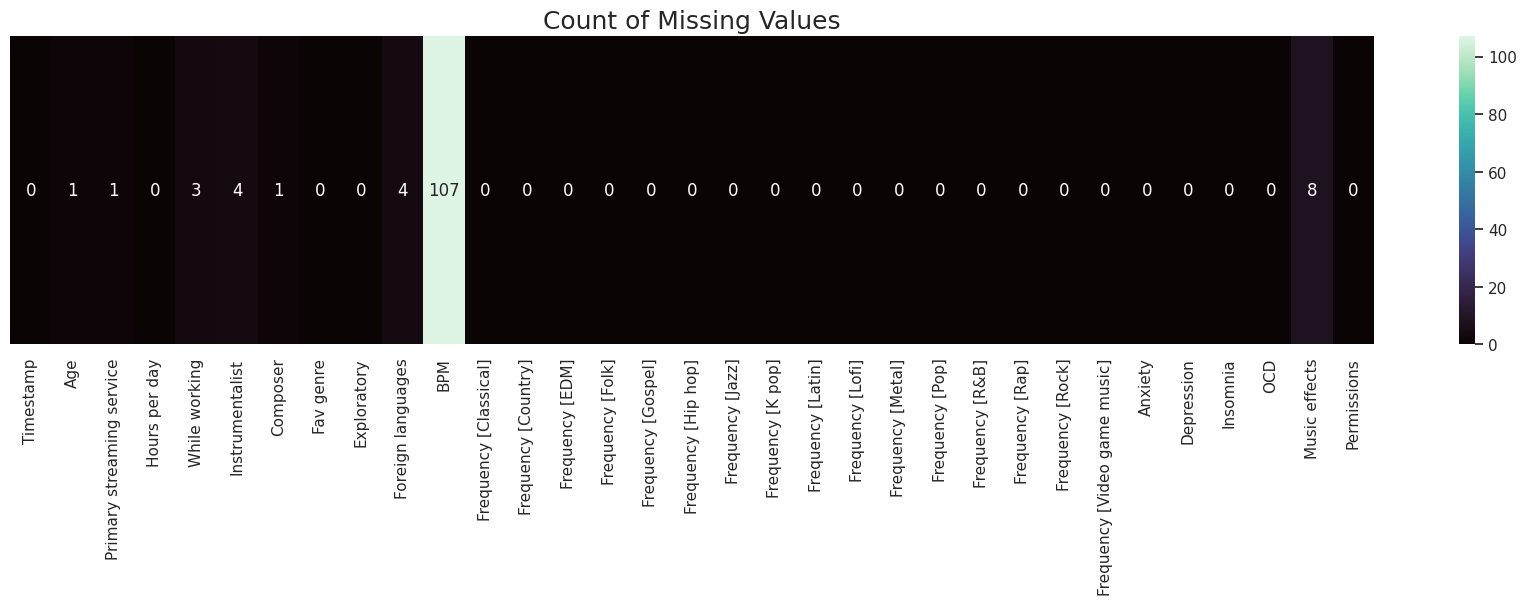

In [ ]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='mako', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

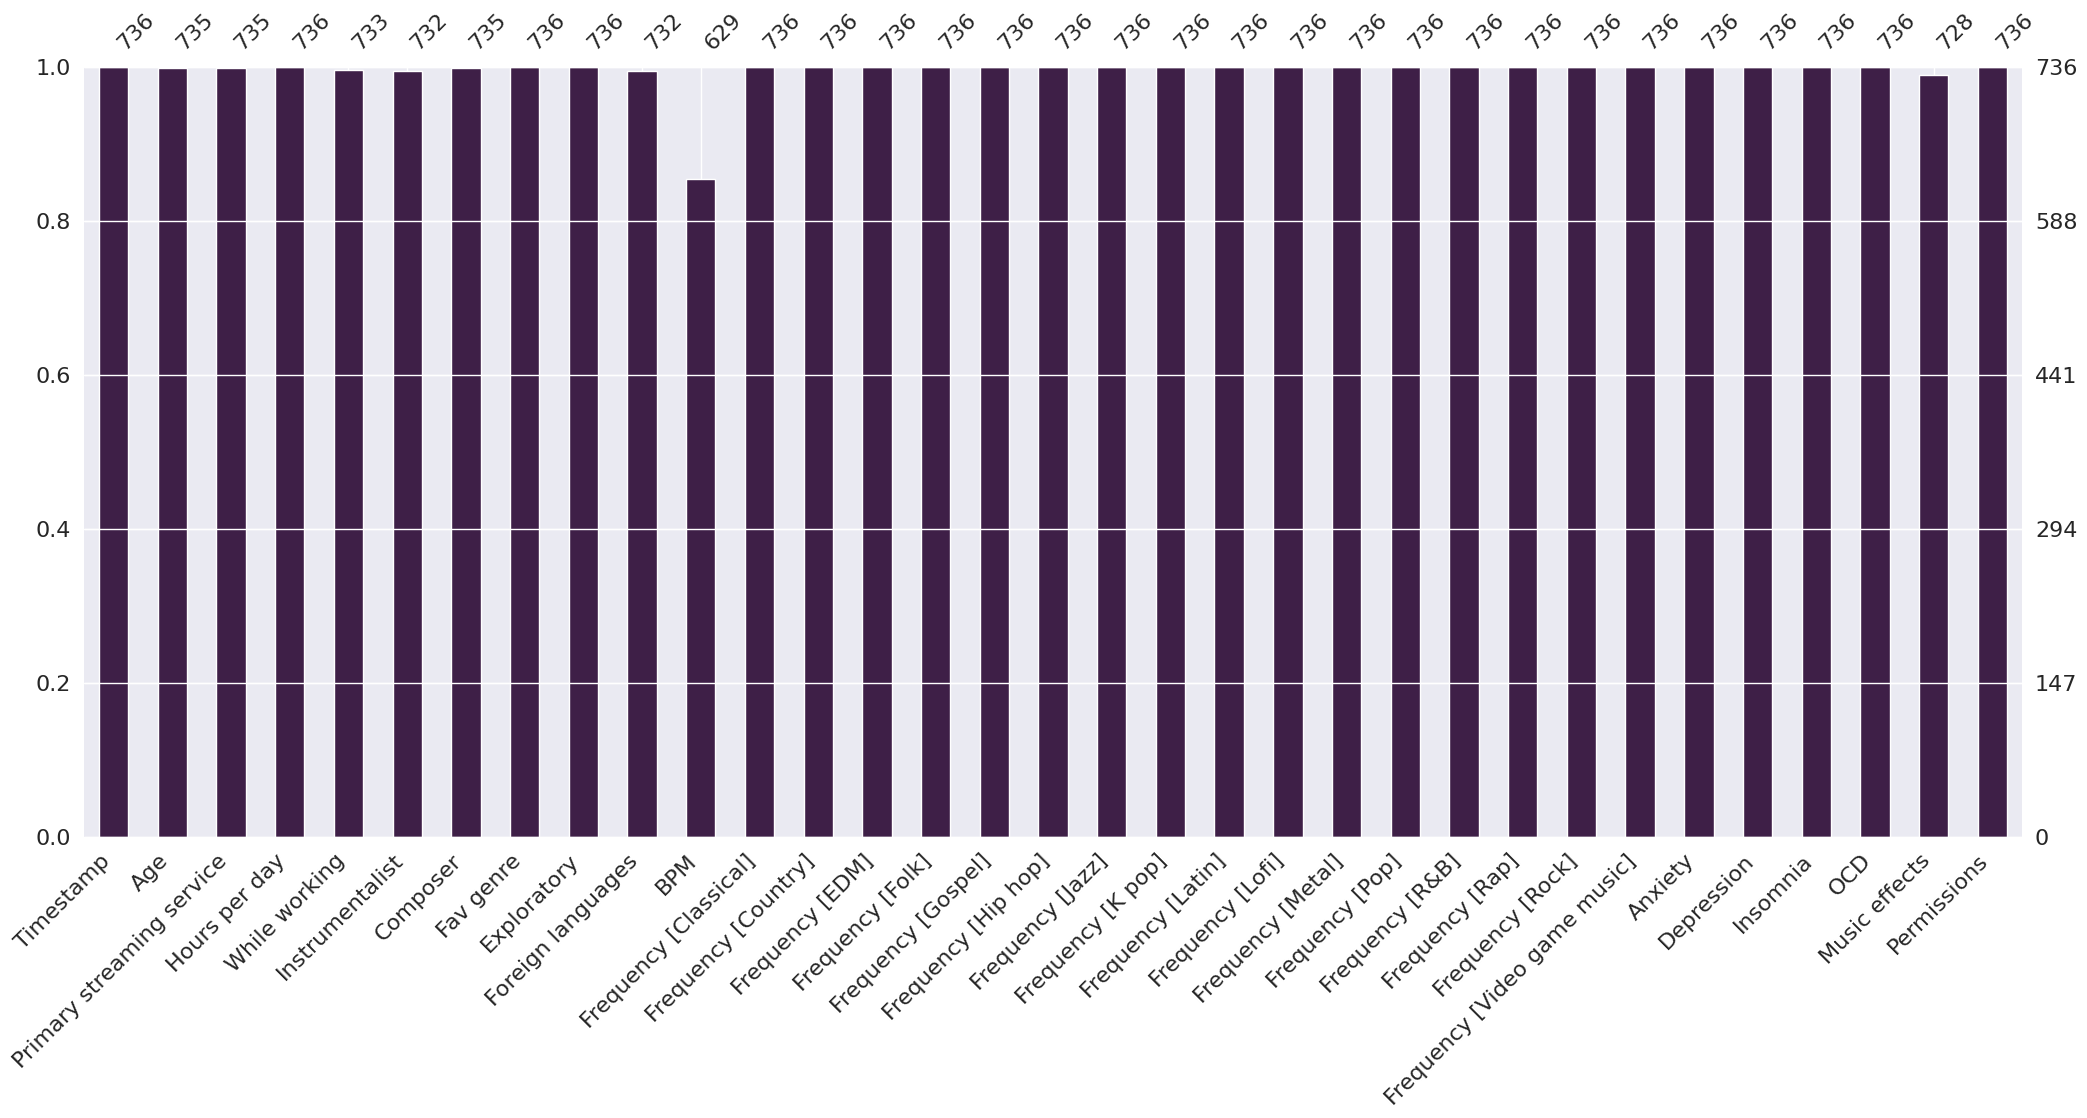

In [ ]:
import missingno as msno
msno.bar(df, color='#3E1F47')
plt.show()

In [ ]:
df[df['Age'].isnull()]

Timestamp  Age Primary streaming service  Hours per day  \
12  8/27/2022 23:04:00  NaN                   Spotify            3.0   

   While working Instrumentalist Composer Fav genre Exploratory  \
12           Yes              No       No   Hip hop         Yes   

   Foreign languages  ...  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
12               Yes  ...        Sometimes          Rarely           Rarely   

   Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
12                        Never     9.0        3.0      2.0  7.0   

   Music effects    Permissions  
12       Improve  I understand.  

[1 rows x 33 columns]

In [ ]:
df[df['Primary streaming service'].isnull()]

Timestamp   Age Primary streaming service  Hours per day  \
197  8/28/2022 20:50:37  21.0                       NaN            5.0   

    While working Instrumentalist Composer Fav genre Exploratory  \
197           Yes              No       No   Country         Yes   

    Foreign languages  ...  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
197                No  ...            Never          Rarely  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
197                        Never     9.0        8.0      9.0  7.0   

    Music effects    Permissions  
197       Improve  I understand.  

[1 rows x 33 columns]

In [ ]:
df[df['Instrumentalist'].isnull()]

Timestamp   Age Primary streaming service  Hours per day  \
223  8/28/2022 22:06:46  18.0             YouTube Music           12.0   
408  8/29/2022 23:36:14  13.0             YouTube Music            3.0   
561    9/4/2022 5:22:34  21.0                   Spotify            1.0   
572   9/4/2022 21:29:06  18.0                   Spotify            3.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
223           Yes             NaN       No             K pop         Yes   
408           Yes             NaN      Yes         Classical          No   
561           NaN             NaN      NaN             K pop         Yes   
572           Yes             NaN       No  Video game music         Yes   

    Foreign languages  ...  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
223               Yes  ...        Sometimes       Sometimes           Rarely   
408                No  ...            Never           Never            Never   
561               NaN  ...        Sometimes       Sometimes  Very frequently   
572               Yes  ...        Sometimes           Never            Never   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
223                        Never     3.0        7.0      5.0  2.0   
408                        Never     8.0        7.0      9.0  2.0   
561                       Rarely     4.0        5.0      2.0  5.0   
572              Very frequently     7.0        0.0      3.0  1.0   

    Music effects    Permissions  
223       Improve  I understand.  
408       Improve  I understand.  
561           NaN  I understand.  
572     No effect  I understand.  

[4 rows x 33 columns]

In [ ]:
df[df['Composer'].isnull()]

Timestamp   Age Primary streaming service  Hours per day  \
561  9/4/2022 5:22:34  21.0                   Spotify            1.0   

    While working Instrumentalist Composer Fav genre Exploratory  \
561           NaN             NaN      NaN     K pop         Yes   

    Foreign languages  ...  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
561               NaN  ...        Sometimes       Sometimes  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
561                       Rarely     4.0        5.0      2.0  5.0   

    Music effects    Permissions  
561           NaN  I understand.  

[1 rows x 33 columns]

In [ ]:
df[df['Foreign languages'].isnull()]

Timestamp   Age Primary streaming service  Hours per day  \
235  8/28/2022 22:39:58  31.0                   Spotify            2.0   
396  8/29/2022 20:03:04  14.0             YouTube Music            1.5   
561    9/4/2022 5:22:34  21.0                   Spotify            1.0   
666   9/15/2022 0:33:58  15.0                   Spotify            3.0   

    While working Instrumentalist Composer  Fav genre Exploratory  \
235            No             Yes       No      Metal         Yes   
396            No             Yes       No  Classical         Yes   
561           NaN             NaN      NaN      K pop         Yes   
666           Yes             Yes       No       Rock          No   

    Foreign languages  ...  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
235               NaN  ...           Rarely       Sometimes  Very frequently   
396               NaN  ...            Never           Never           Rarely   
561               NaN  ...        Sometimes       Sometimes  Very frequently   
666               NaN  ...            Never           Never  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
235                    Sometimes     7.0        6.0      6.0  5.0   
396                    Sometimes     1.0        2.0      4.0  3.0   
561                       Rarely     4.0        5.0      2.0  5.0   
666                       Rarely     4.0        3.0      5.0  0.0   

    Music effects    Permissions  
235       Improve  I understand.  
396       Improve  I understand.  
561           NaN  I understand.  
666     No effect  I understand.  

[4 rows x 33 columns]

In [ ]:
df[df['BPM'].isnull()]

Timestamp   Age          Primary streaming service  \
10   8/27/2022 22:51:15  18.0                            Spotify   
12   8/27/2022 23:04:00   NaN                            Spotify   
15   8/27/2022 23:19:52  17.0                            Spotify   
30   8/28/2022 10:30:22  20.0                        Apple Music   
32   8/28/2022 10:54:30  19.0                            Spotify   
..                  ...   ...                                ...   
688   9/24/2022 0:42:39  18.0                            Spotify   
700  10/3/2022 10:00:01  20.0                      YouTube Music   
706  10/3/2022 15:38:19  23.0                            Spotify   
712   10/4/2022 8:53:39  23.0  I do not use a streaming service.   
717  10/5/2022 12:30:23  23.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
10             3.0           Yes             Yes       No   Country   
12             3.0           Yes              No       No   Hip hop   
15             2.0            No              No       No       Pop   
30             5.0           Yes             Yes       No      Rock   
32             6.0           Yes             Yes       No     Metal   
..             ...           ...             ...      ...       ...   
688            4.0           Yes              No       No       R&B   
700            1.0           Yes              No       No       Pop   
706            1.0           Yes             Yes       No      Rock   
712            3.0           Yes              No       No      Rock   
717            2.0            No              No       No      Rock   

    Exploratory Foreign languages  ...  Frequency [R&B] Frequency [Rap]  \
10          Yes                No  ...           Rarely           Never   
12          Yes               Yes  ...        Sometimes          Rarely   
15          Yes               Yes  ...           Rarely       Sometimes   
30          Yes               Yes  ...        Sometimes       Sometimes   
32          Yes               Yes  ...            Never           Never   
..          ...               ...  ...              ...             ...   
688          No                No  ...  Very frequently       Sometimes   
700          No               Yes  ...           Rarely       Sometimes   
706         Yes               Yes  ...        Sometimes       Sometimes   
712          No                No  ...           Rarely           Never   
717         Yes               Yes  ...        Sometimes       Sometimes   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
10            Rarely                        Never     7.0        7.0      4.0   
12            Rarely                        Never     9.0        3.0      2.0   
15         Sometimes                       Rarely     7.0        5.0      4.0   
30   Very frequently                       Rarely     7.0        7.0      2.0   
32         Sometimes                    Sometimes     9.0        8.0      2.0   
..               ...                          ...     ...        ...      ...   
688            Never                        Never     8.0        0.0      0.0   
700           Rarely              Very frequently     8.0        9.0      6.0   
706  Very frequently              Very frequently     8.0        6.0      1.0   
712  Very frequently                        Never    10.0        5.0      2.0   
717  Very frequently                        Never     5.0        7.0     10.0   

     OCD Music effects    Permissions  
10   7.0     No effect  I understand.  
12   7.0       Improve  I understand.  
15   1.0        Worsen  I understand.  
30   0.0       Improve  I understand.  
32   3.0       Improve  I understand.  
..   ...           ...            ...  
688  2.0     No effect  I understand.  
700  5.0        Worsen  I understand.  
706  4.0       Improve  I understand.  
712  0.0       Improve  I understand.  
717  2.0     No effect  I unde

In [ ]:
df[df['While working'].isnull()]

Timestamp   Age          Primary streaming service  \
57   8/28/2022 13:08:24  42.0  I do not use a streaming service.   
426  8/30/2022 16:47:39  30.0                            Spotify   
561    9/4/2022 5:22:34  21.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
57             0.0           NaN              No       No      Rock   
426           13.0           NaN              No       No     K pop   
561            1.0           NaN             NaN      NaN     K pop   

    Exploratory Foreign languages  ...  Frequency [R&B] Frequency [Rap]  \
57           No               Yes  ...           Rarely           Never   
426         Yes               Yes  ...  Very frequently       Sometimes   
561         Yes               NaN  ...        Sometimes       Sometimes   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
57         Sometimes                    Sometimes     9.0        0.0     10.0   
426  Very frequently                    Sometimes    10.0       10.0     10.0   
561  Very frequently                       Rarely     4.0        5.0      2.0   

     OCD Music effects    Permissions  
57   0.0     No effect  I understand.  
426  7.0       Improve  I understand.  
561  5.0           NaN  I understand.  

[3 rows x 33 columns]

In [ ]:
df[df['Music effects'].isnull()]

Timestamp   Age          Primary streaming service  \
0    8/27/2022 19:29:02  18.0                            Spotify   
1    8/27/2022 19:57:31  63.0                            Pandora   
161  8/28/2022 18:59:40  18.0            Other streaming service   
168  8/28/2022 19:16:43  19.0                            Spotify   
338   8/29/2022 8:28:46  21.0                      YouTube Music   
441  8/31/2022 18:56:31  21.0                        Apple Music   
532   9/2/2022 19:20:33  67.0  I do not use a streaming service.   
561    9/4/2022 5:22:34  21.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
0              3.0           Yes             Yes      Yes     Latin   
1              1.5           Yes              No       No      Rock   
161            2.0           Yes              No       No     K pop   
168            3.0           Yes             Yes       No     K pop   
338            2.0           Yes              No       No       EDM   
441            1.5           Yes             Yes       No      Folk   
532            1.0            No              No       No      Rock   
561            1.0           NaN             NaN      NaN     K pop   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
0           Yes               Yes  ...        Sometimes  Very frequently   
1           Yes                No  ...        Sometimes           Rarely   
161          No               Yes  ...        Sometimes            Never   
168         Yes               Yes  ...        Sometimes           Rarely   
338          No               Yes  ...           Rarely           Rarely   
441          No                No  ...            Never            Never   
532          No                No  ...        Sometimes        Sometimes   
561         Yes               NaN  ...        Sometimes        Sometimes   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
0              Never                    Sometimes     3.0        0.0      1.0   
1    Very frequently                       Rarely     7.0        2.0      2.0   
161            Never                        Never     0.0        2.0      0.0   
168        Sometimes                    Sometimes     8.0        9.0      6.0   
338        Sometimes              Very frequently    10.0       10.0      5.0   
441        Sometimes                        Never     3.0        3.0      1.0   
532        Sometimes                        Never     3.0        2.0      2.0   
561  Very frequently                       Rarely     4.0        5.0      2.0   

     OCD Music effects    Permissions  
0    0.0           NaN  I understand.  
1    1.0           NaN  I understand.  
161  0.0           NaN  I understand.  
168  0.0           NaN  I understand.  
338  7.0           NaN  I understand.  
441  0.0           NaN  I understand.  
532  2.0           NaN  I understand.  
561  5.0           NaN  I understand.  

[8 rows x 33 columns]

In [ ]:
# Remove columns whose null values are less than 10
df.dropna(subset=['Age','Primary streaming service','While working','Instrumentalist','Composer','Foreign languages','Music effects'],inplace=True)

In [ ]:
# Since BPM has a lot of null values, we can replace them with the median value
df[df.columns[df.isnull().any()]].isnull().sum()

BPM    102
dtype: int64

In [ ]:
df['BPM']=df['BPM'].fillna(df['BPM'].median())

In [ ]:
df.describe()[1:].T.style.background_gradient(cmap='mako', axis=1)

In [ ]:
# finding unique data
df.apply(lambda x: len(x.unique()))

Timestamp                       717
Age                              61
Primary streaming service         6
Hours per day                    26
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
BPM                             135
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Anxiety                          12
Depression                       12
Insomnia                         12
OCD                              13
Music effects                     3
Permissions                       1
dtype: int64

In [ ]:
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values  \
Age                                                61   
Anxiety                                            12   
BPM                                               135   
Composer                                            2   
Depression                                         12   
Exploratory                                         2   
Fav genre                                          16   
Foreign languages                                   2   
Frequency [Classical]                               4   
Frequency [Country]                                 4   
Frequency [EDM]                                     4   
Frequency [Folk]                                    4   
Frequency [Gospel]                                  4   
Frequency [Hip hop]                                 4   
Frequency [Jazz]                                    4   
Frequency [K pop]                                   4   
Frequency [Latin]                                   4   
Frequency [Lofi]                                    4   
Frequency [Metal]                                   4   
Frequency [Pop]                                     4   
Frequency [R&B]                                     4   
Frequency [Rap]                                     4   
Frequency [Rock]                                    4   
Frequency [Video game music]                        4   
Hours per day                                      26   
Insomnia                                           12   
Instrumentalist                                     2   
Music effects                                       3   
OCD                                                13   
Permissions                                         1   
Primary streaming service                           6   
Timestamp                                         717   
While working                                       2   

                                                                  Unique Values  
Age                           [18.0, 61.0, 21.0, 19.0, 17.0, 16.0, 15.0, 14....  
Anxiety                       [7.0, 9.0, 8.0, 4.0, 5.0, 2.0, 1.0, 6.0, 10.0,...  
BPM                           [132.0, 84.0, 107.0, 86.0, 66.0, 95.0, 94.0, 1...  
Composer                                                              [No, Yes]  
Depression                    [7.0, 2.0, 8.0, 3.0, 0.0, 1.0, 4.0, 5.0, 9.0, ...  
Exploratory                                                           [No, Yes]  
Fav genre                     [Video game music, Jazz, R&B, K pop, Rock, Cou...  
Foreign languages                                                     [Yes, No]  
Frequency [Classical]               [Never, Sometimes, Rarely, Very frequently]  
Frequency [Country]                 [Never, Sometimes, Very frequently, Rarely]  
Frequency [EDM]                     [Very frequently, Never, Rarely, Sometimes]  
Frequency [Folk]                    [Never, Rarely, Sometimes, Very frequently]  
Frequency [Gospel]                  [Never, Sometimes, Rarely, Very frequently]  
Frequency [Hip hop]                 [Rarely, Never, Very frequently, Sometimes]  
Frequency [Jazz]                    [Rarely, Very frequently, Never, Sometimes]  
Frequency [K pop]                   [Very frequently, Sometimes, Never, Rarely]  
Frequency [Latin]                   [Never, Very frequently, Sometimes, Rarely]  
Frequency [Lofi]                    [Sometimes, Very frequently, Rarely, Never]  
Frequency [Metal]                   [Sometimes, Never, Rarely, Very frequently]  
Frequency [Pop]                     [Rarely, Sometimes, Very frequently, Never]  
Frequency [R&B]                     [Never, Sometimes, Very frequently, Rarely]  
Frequency [Rap]                     [Rarely, Never, Very frequently, Sometimes]  
Frequency [Rock]                    [Rarely, Never, Very frequently, Sometimes]  
Frequency [Video game music]        [Very frequently, Never, Rarely, Sometimes]  
Hours per day                 [4.0, 2.5, 

In [ ]:
df1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']

In [ ]:
df[df1].corr().T.style.background_gradient(cmap='mako', axis=1)

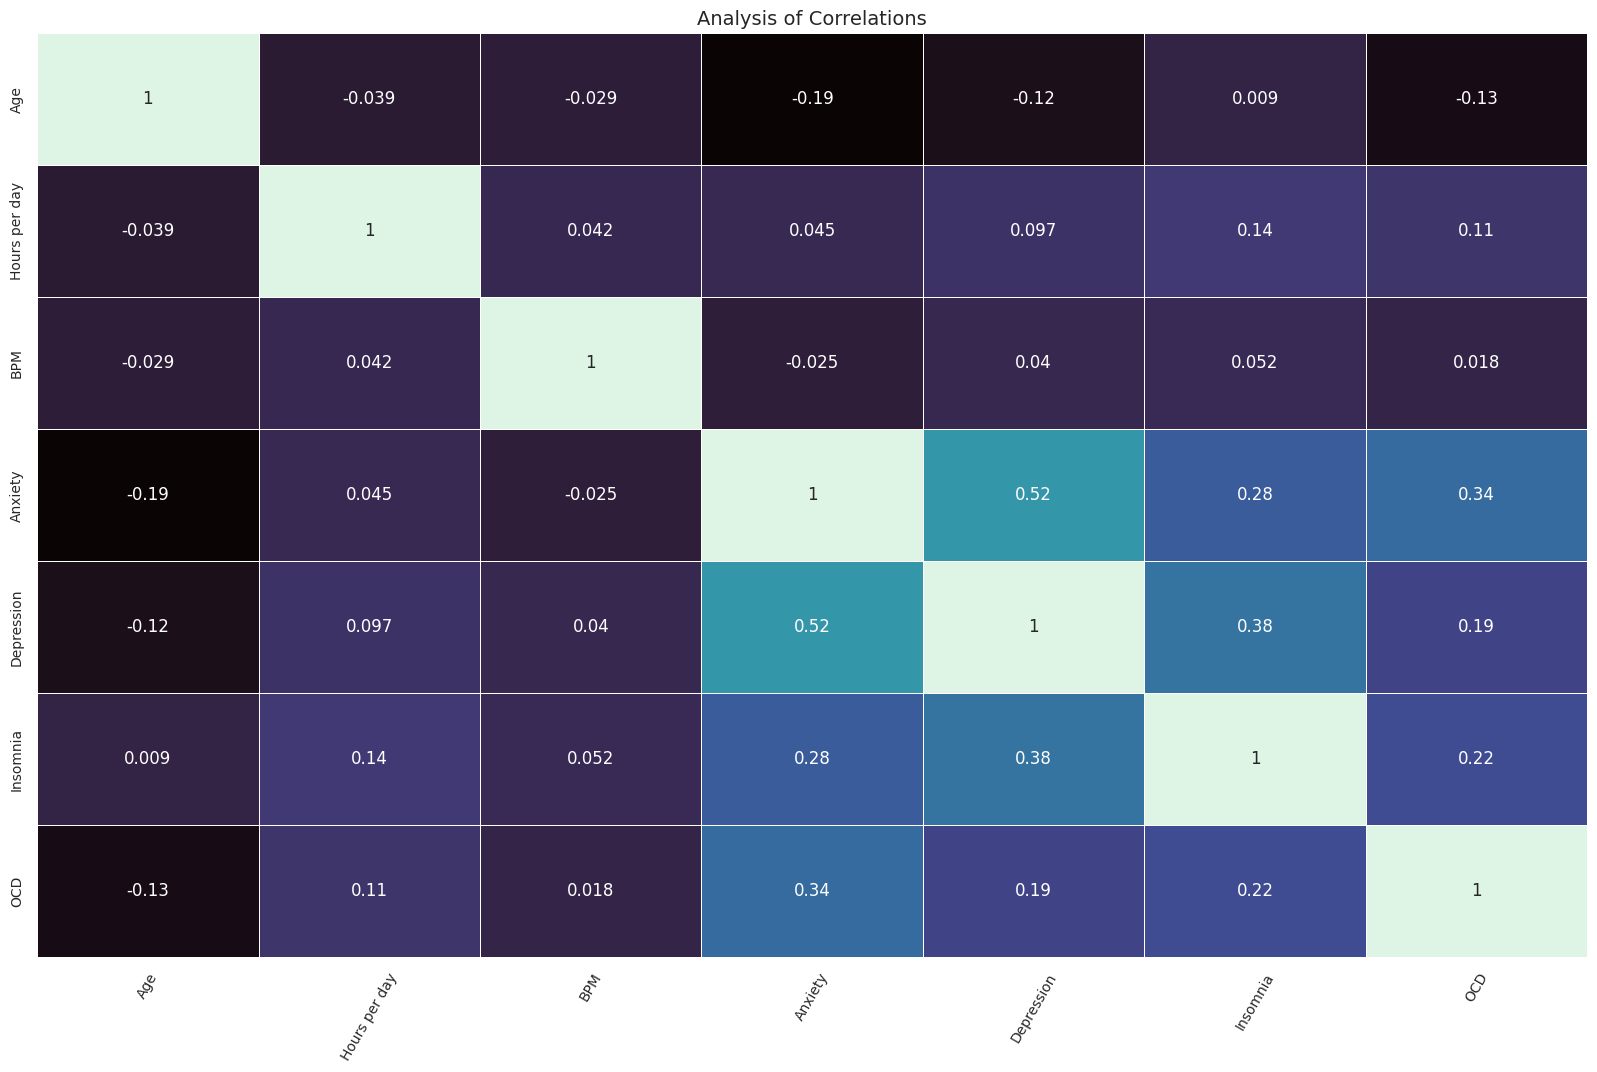

In [ ]:
def correlated_map(dataframe, plot=False):
    corr = df[df1].corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="mako", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(df, plot=True)

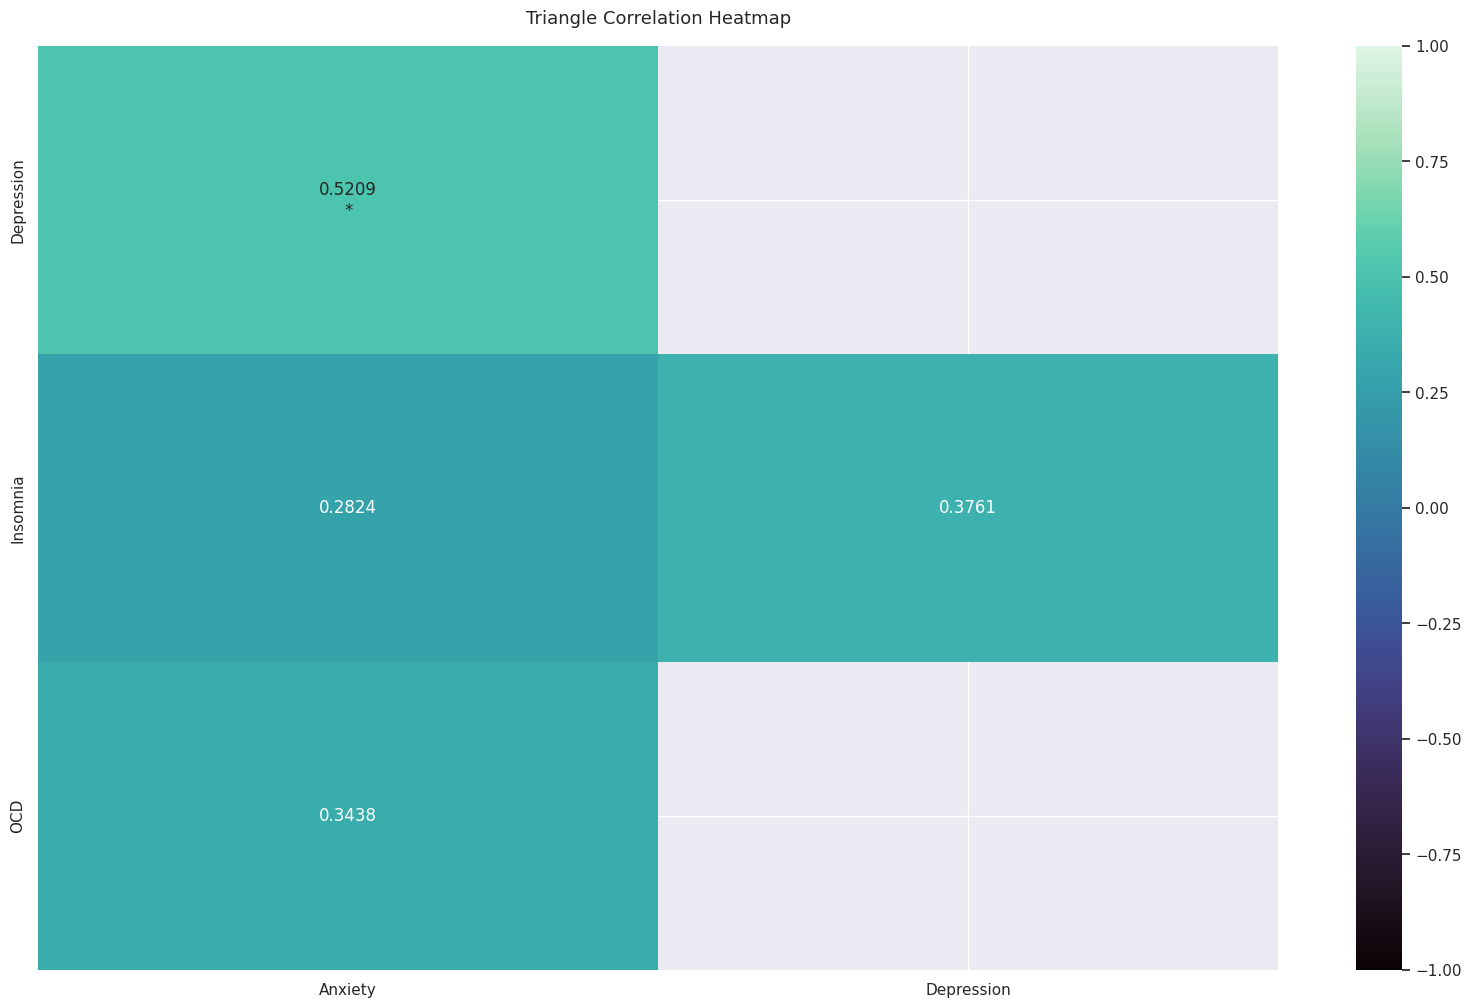

In [ ]:
corr = df[df1].corr()
f, ax = plt.subplots(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='mako')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 13}, pad=16)
plt.show()

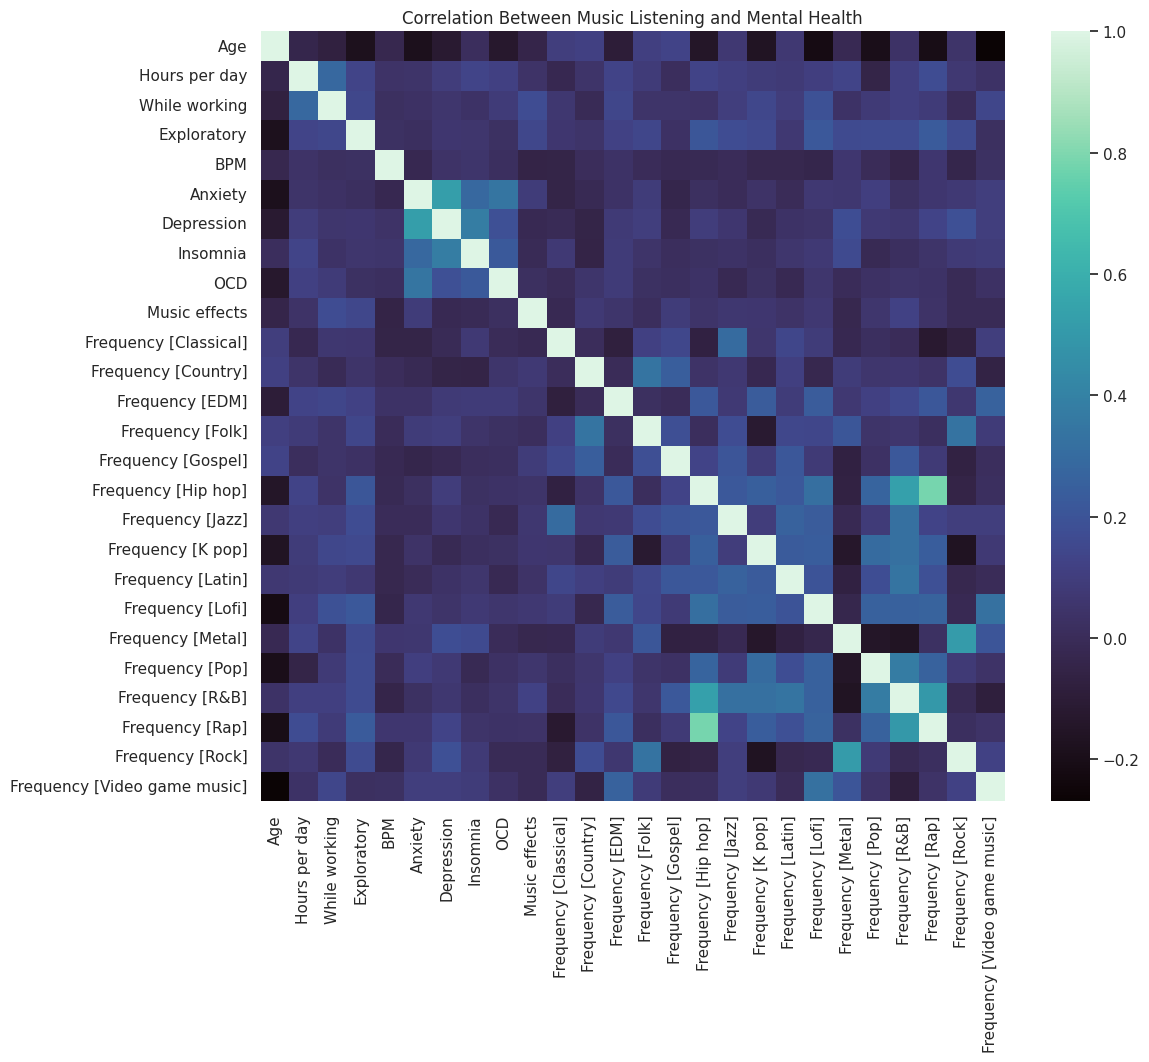

In [ ]:
sel = ['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM','Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']
freq = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
df_genre = df[[col for col in df.columns if col.startswith('Frequency')]]
df_genre.replace(freq, inplace=True)
df_sel = pd.concat([df[sel], df_genre], axis=1)
df_sel['While working'] = df_sel['While working'].map({'Yes': 1, 'No': 0})
df_sel['Exploratory'] = df_sel['Exploratory'].map({'Yes': 1, 'No': 0})
df_sel['Music effects'] = df_sel['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})
plt.figure(figsize=(12, 10))
sns.heatmap(df_sel.corr(), annot=False, cmap='mako')
plt.title('Correlation Between Music Listening and Mental Health')
plt.show()

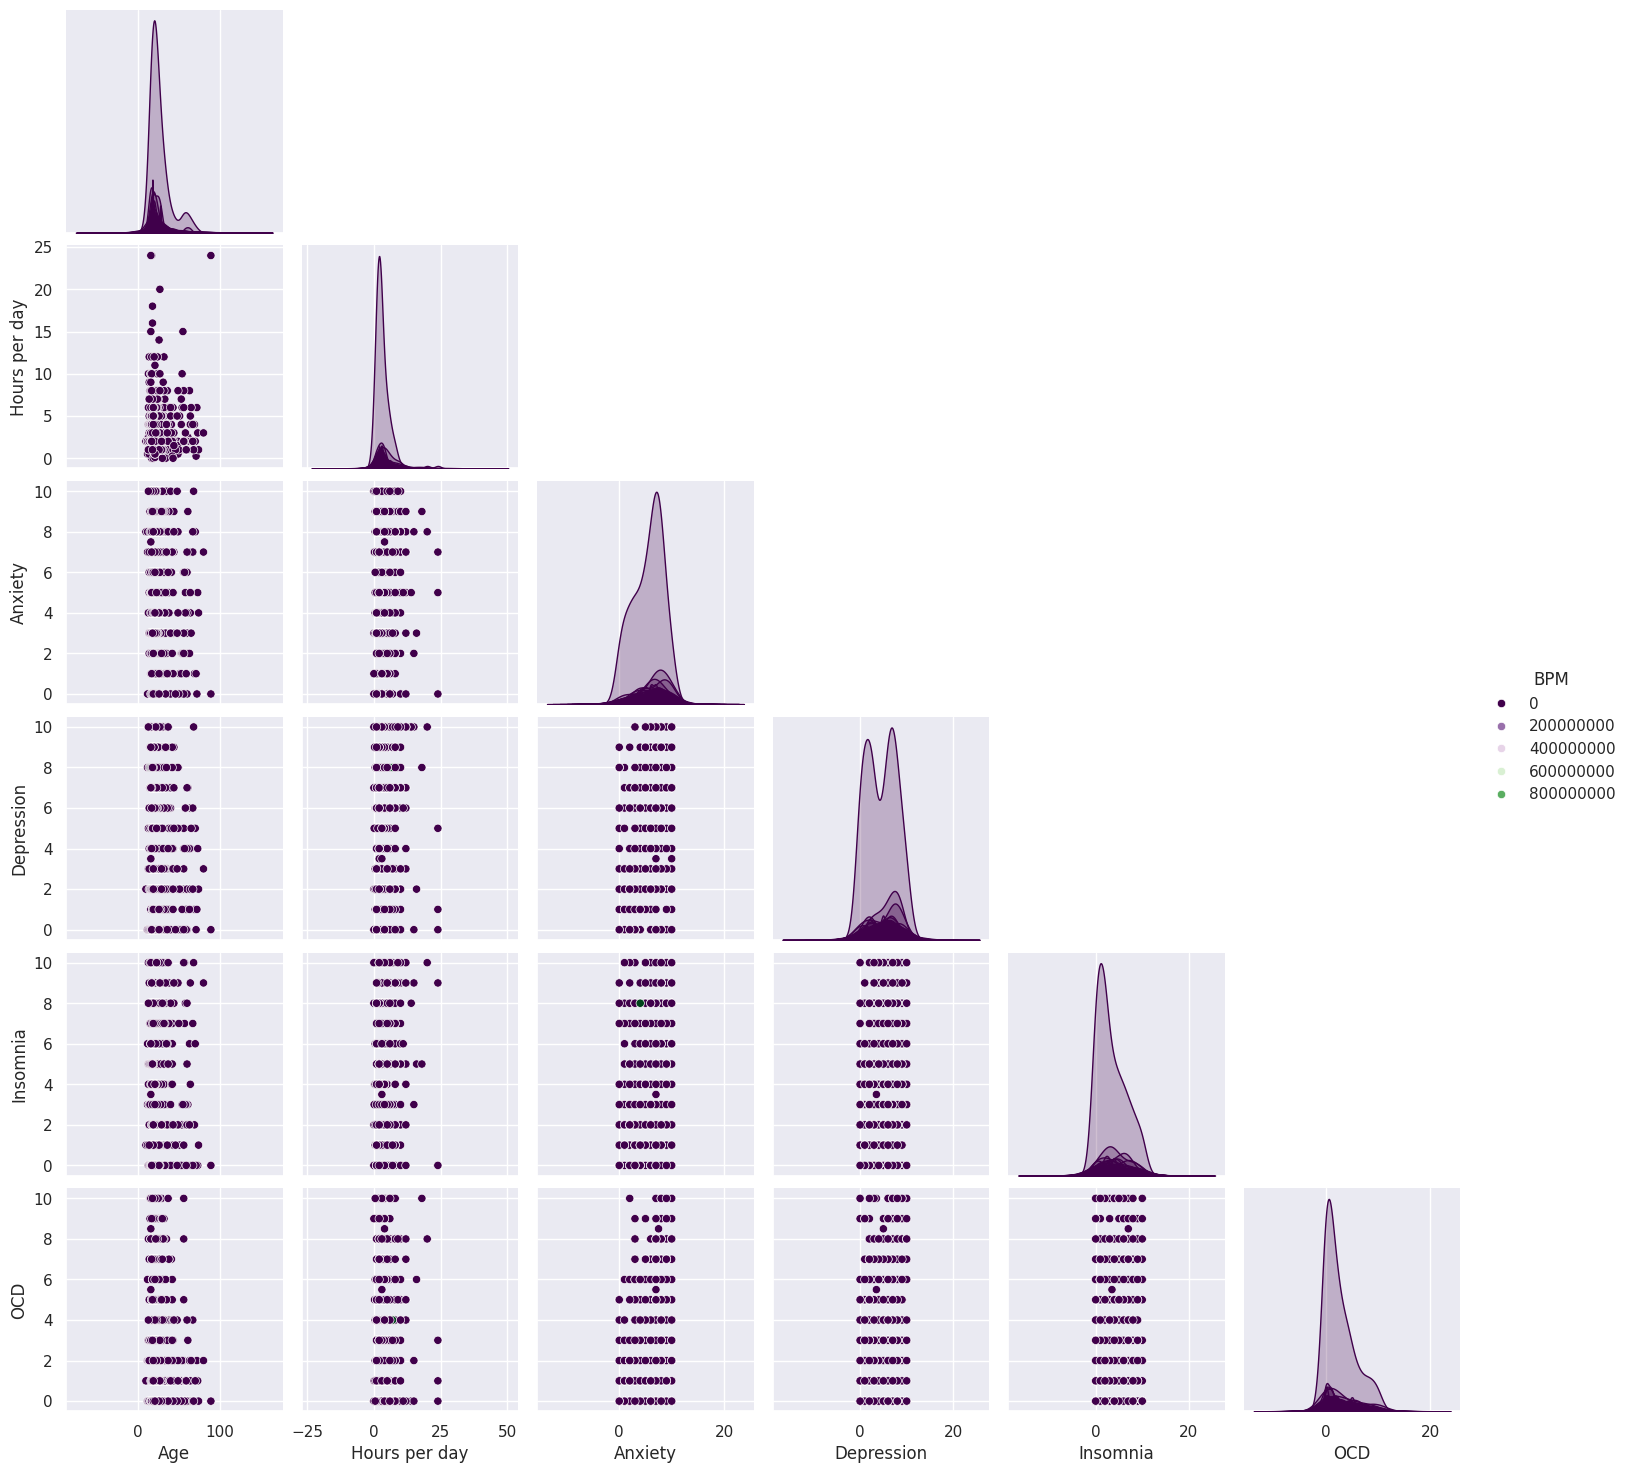

In [ ]:
sns.pairplot(data=df[df1], diag_kind='kde',hue="BPM",palette='PRGn',corner=True)
plt.show()

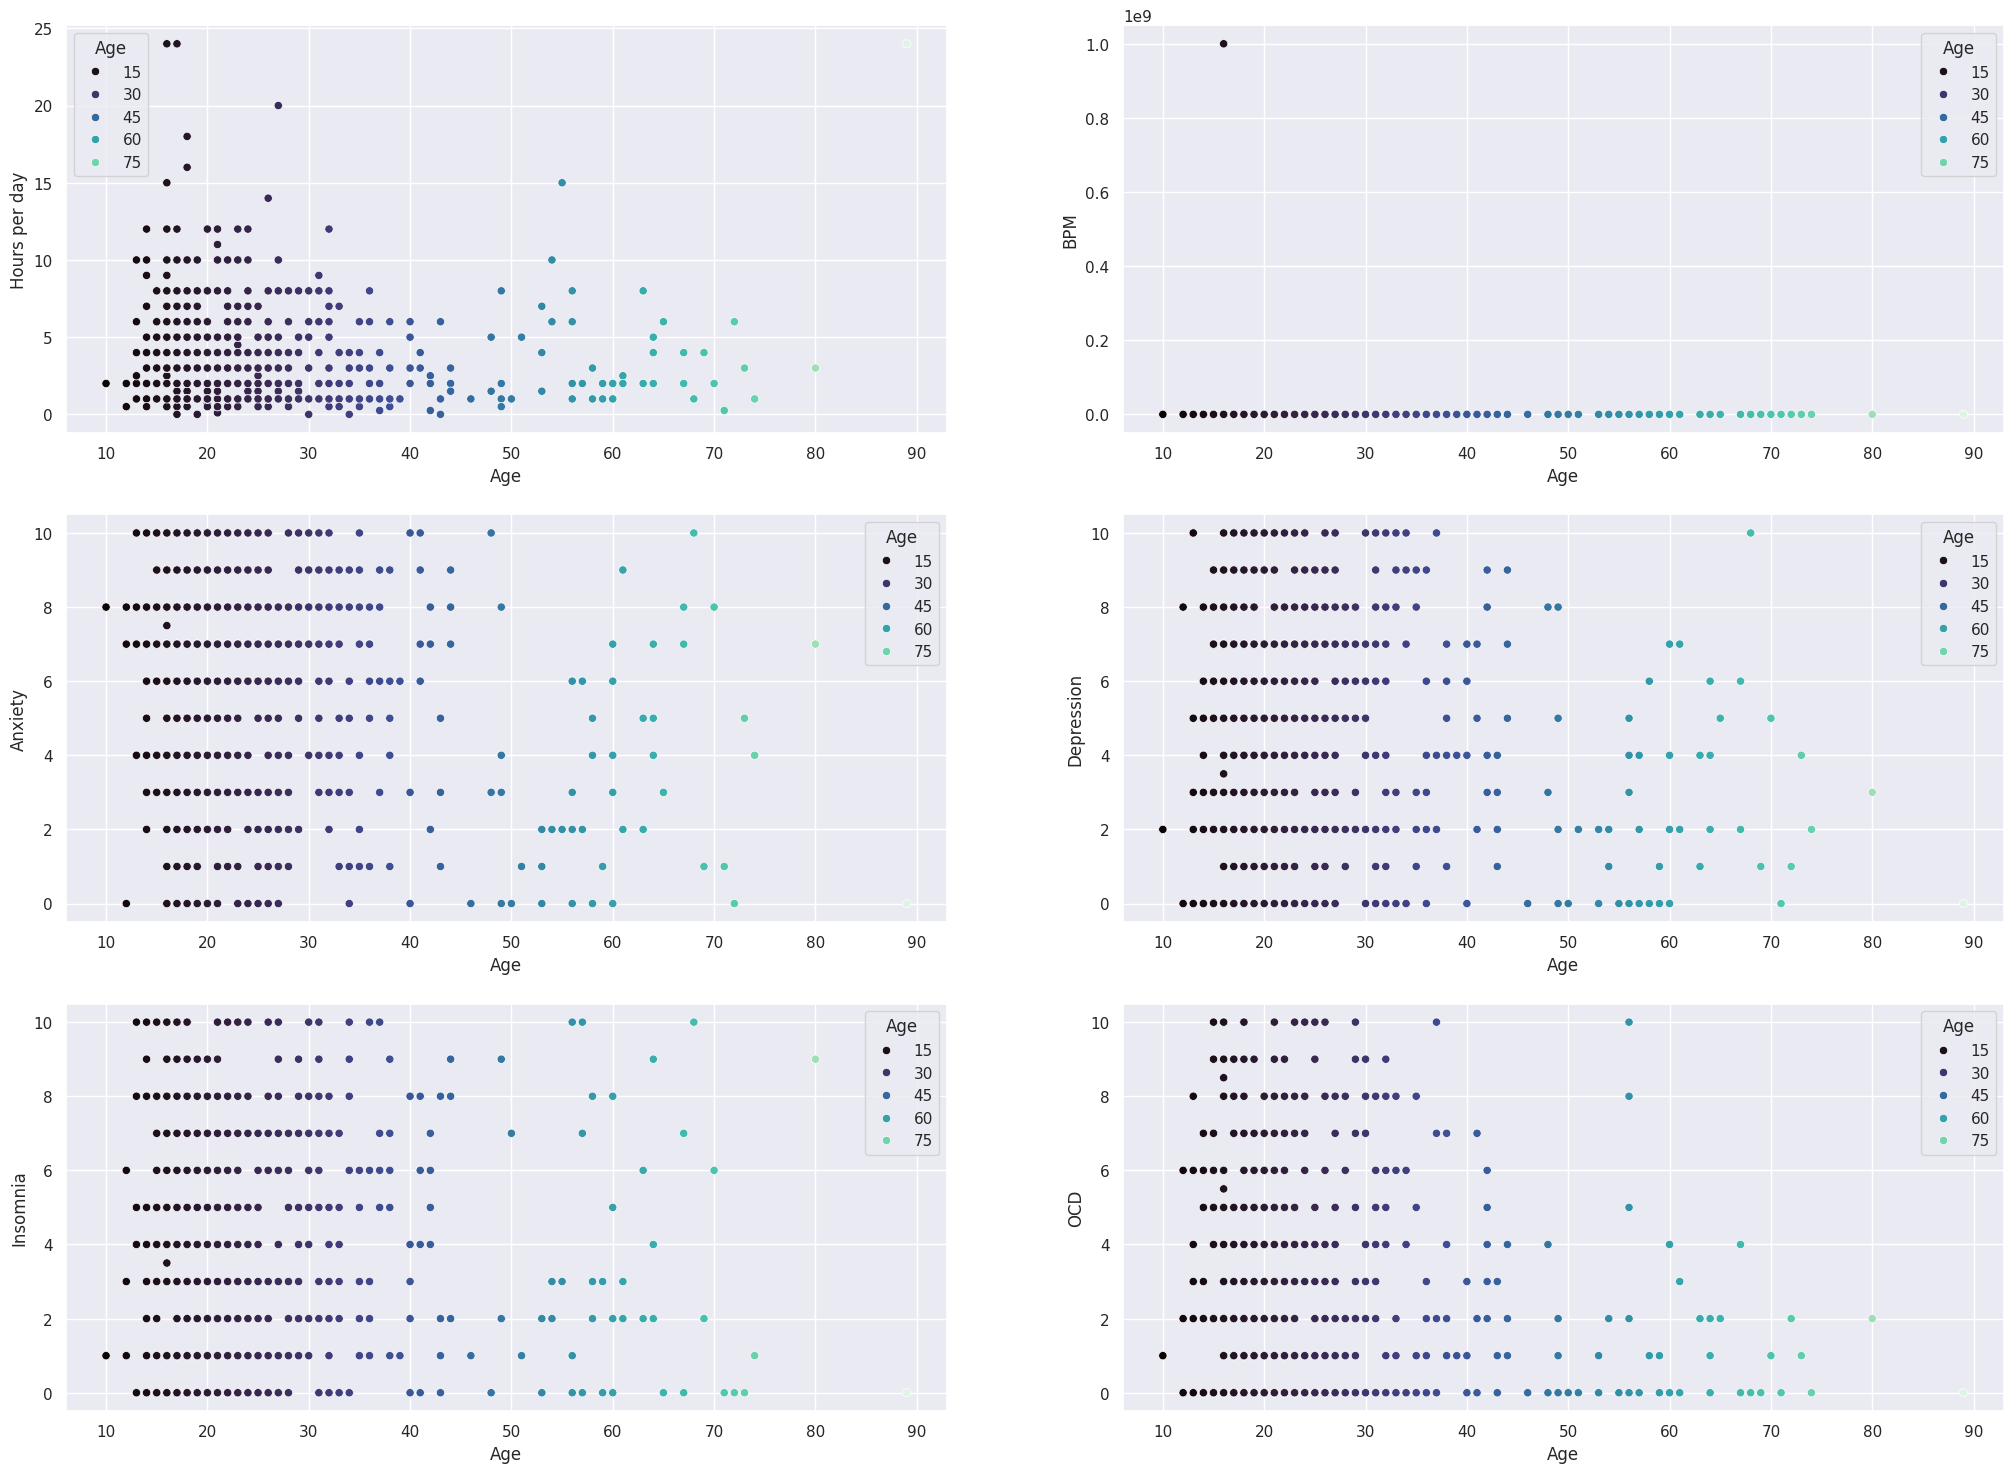

In [ ]:
ff = ['Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='Age',y=col,hue='Age',data=df,palette="mako")

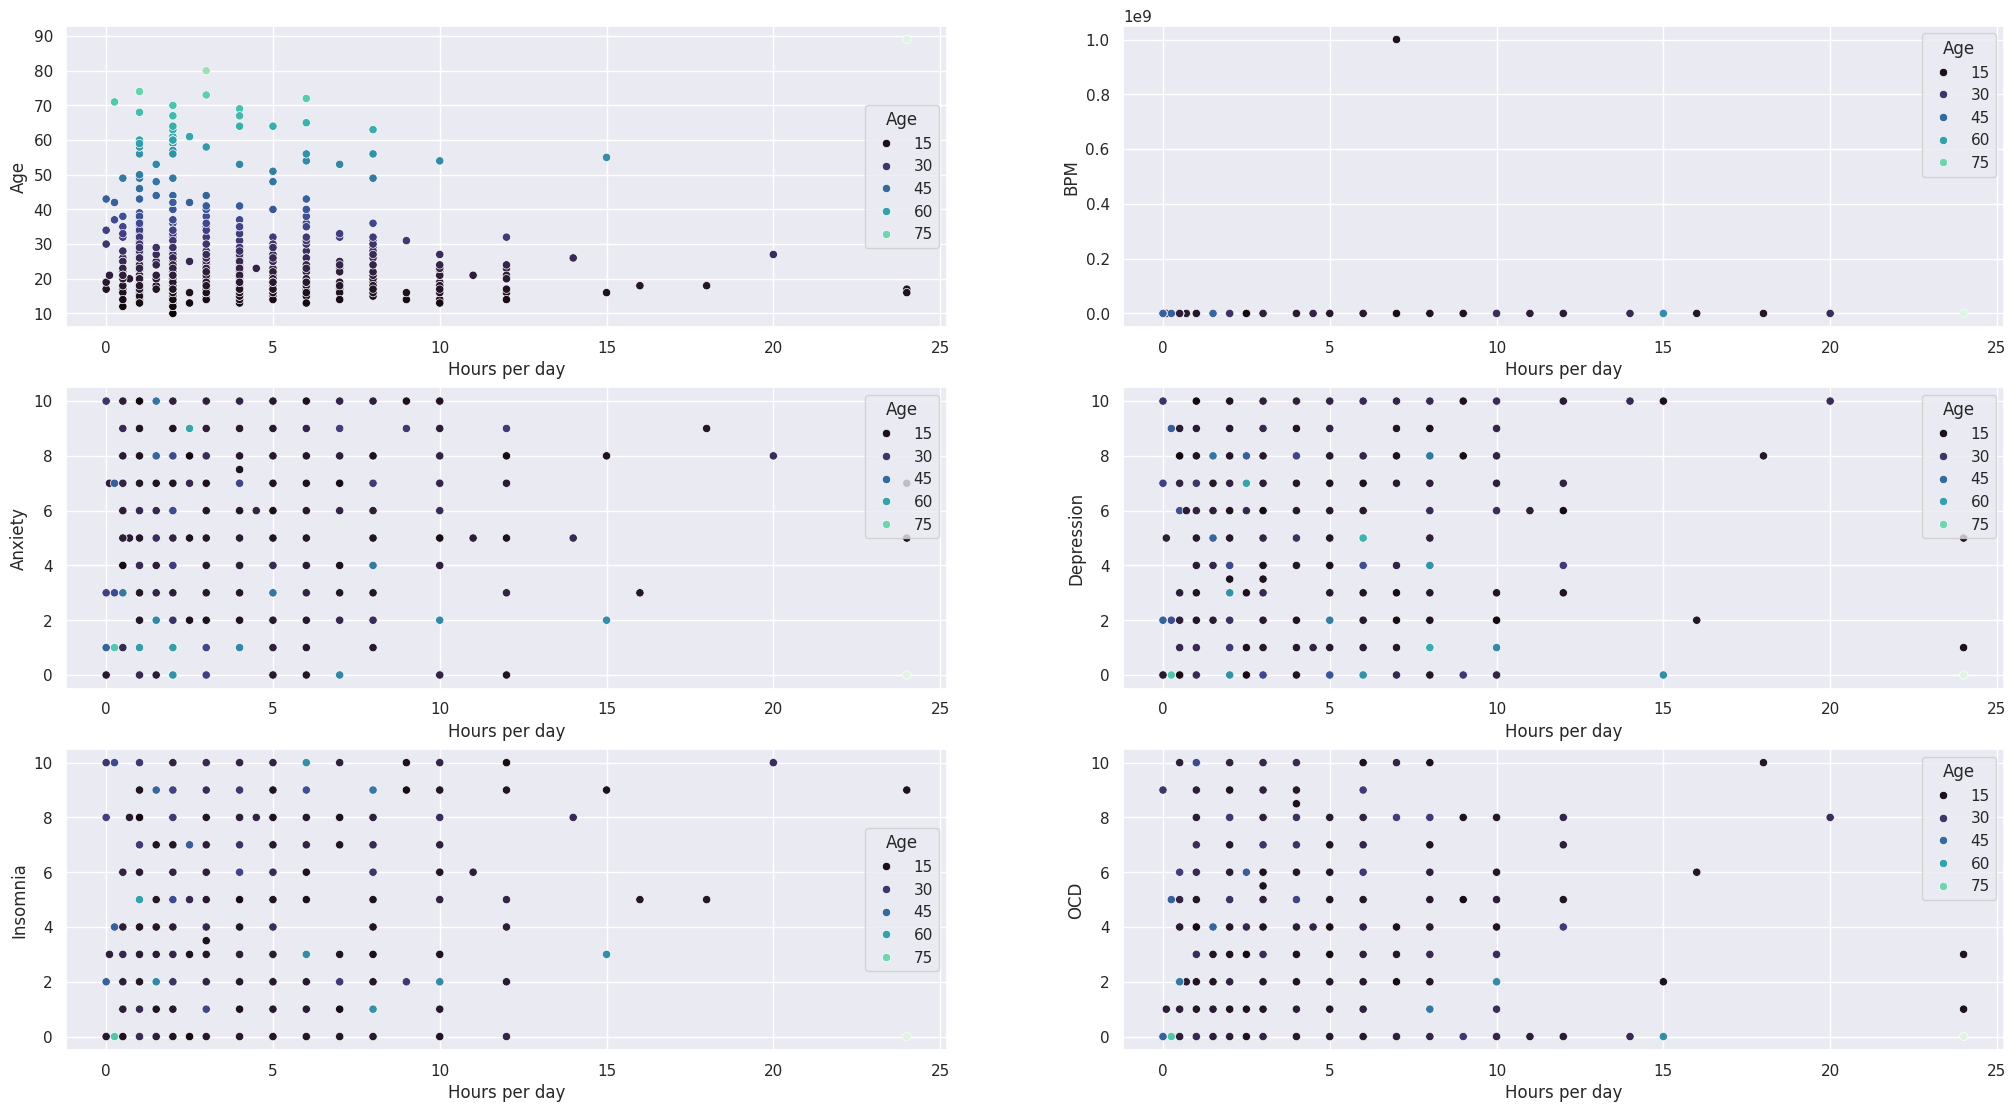

In [ ]:
ff = ['Age','BPM','Anxiety','Depression','Insomnia','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(4,2,i+1)
    sns.scatterplot(x='Hours per day',y=col,hue='Age',data=df,palette="mako")

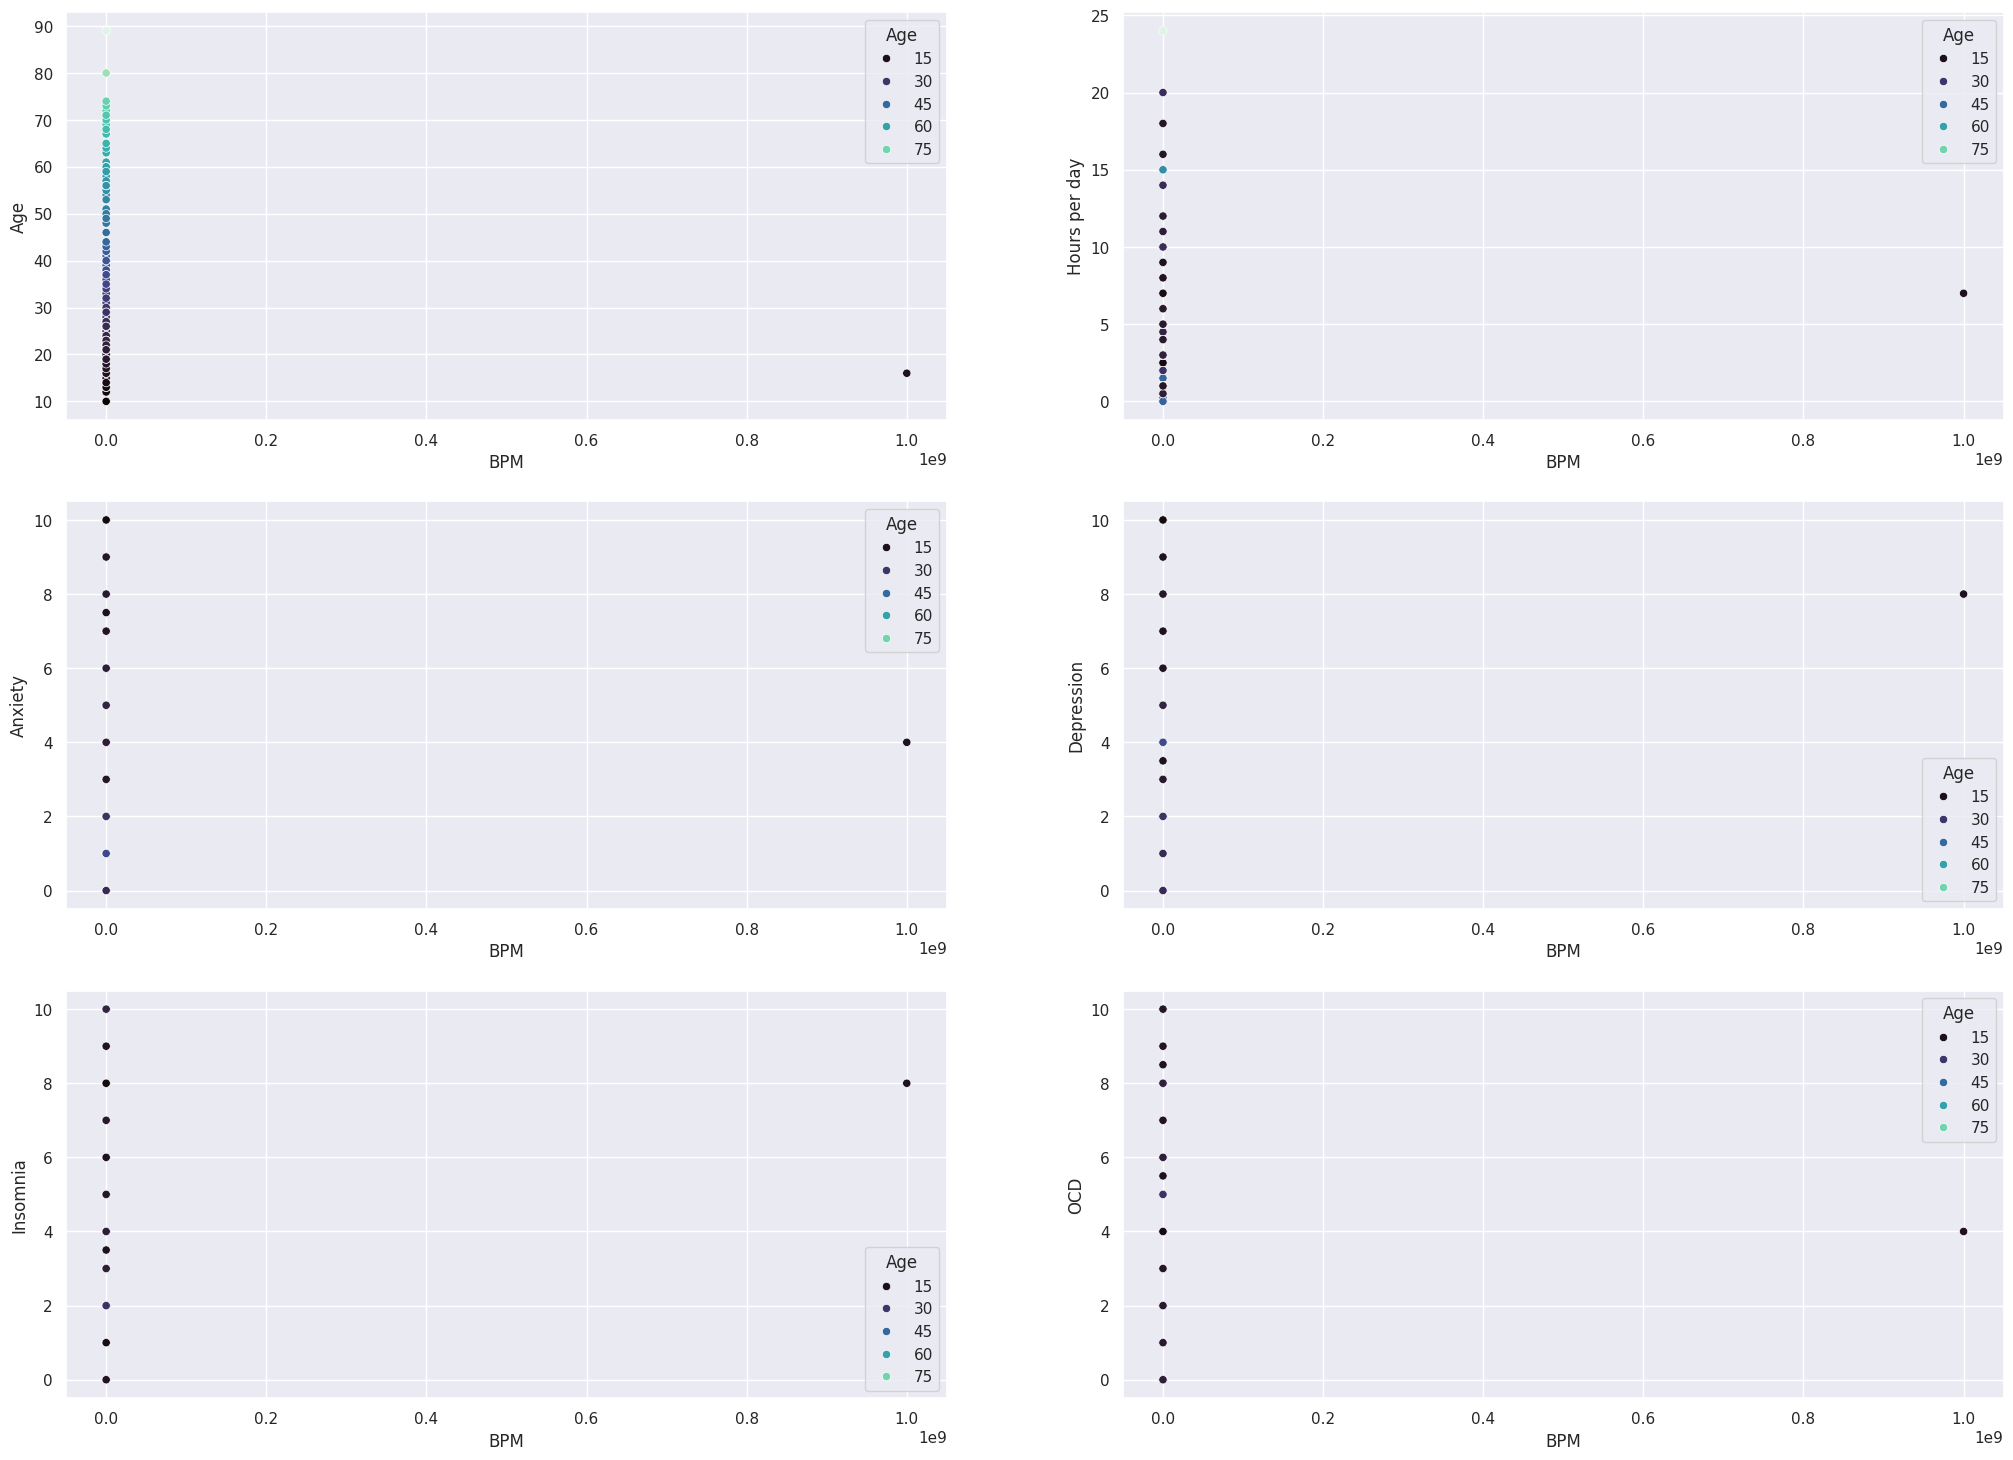

In [ ]:
ff = ['Age','Hours per day','Anxiety','Depression','Insomnia','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='BPM',y=col,hue='Age',data=df,palette="mako")

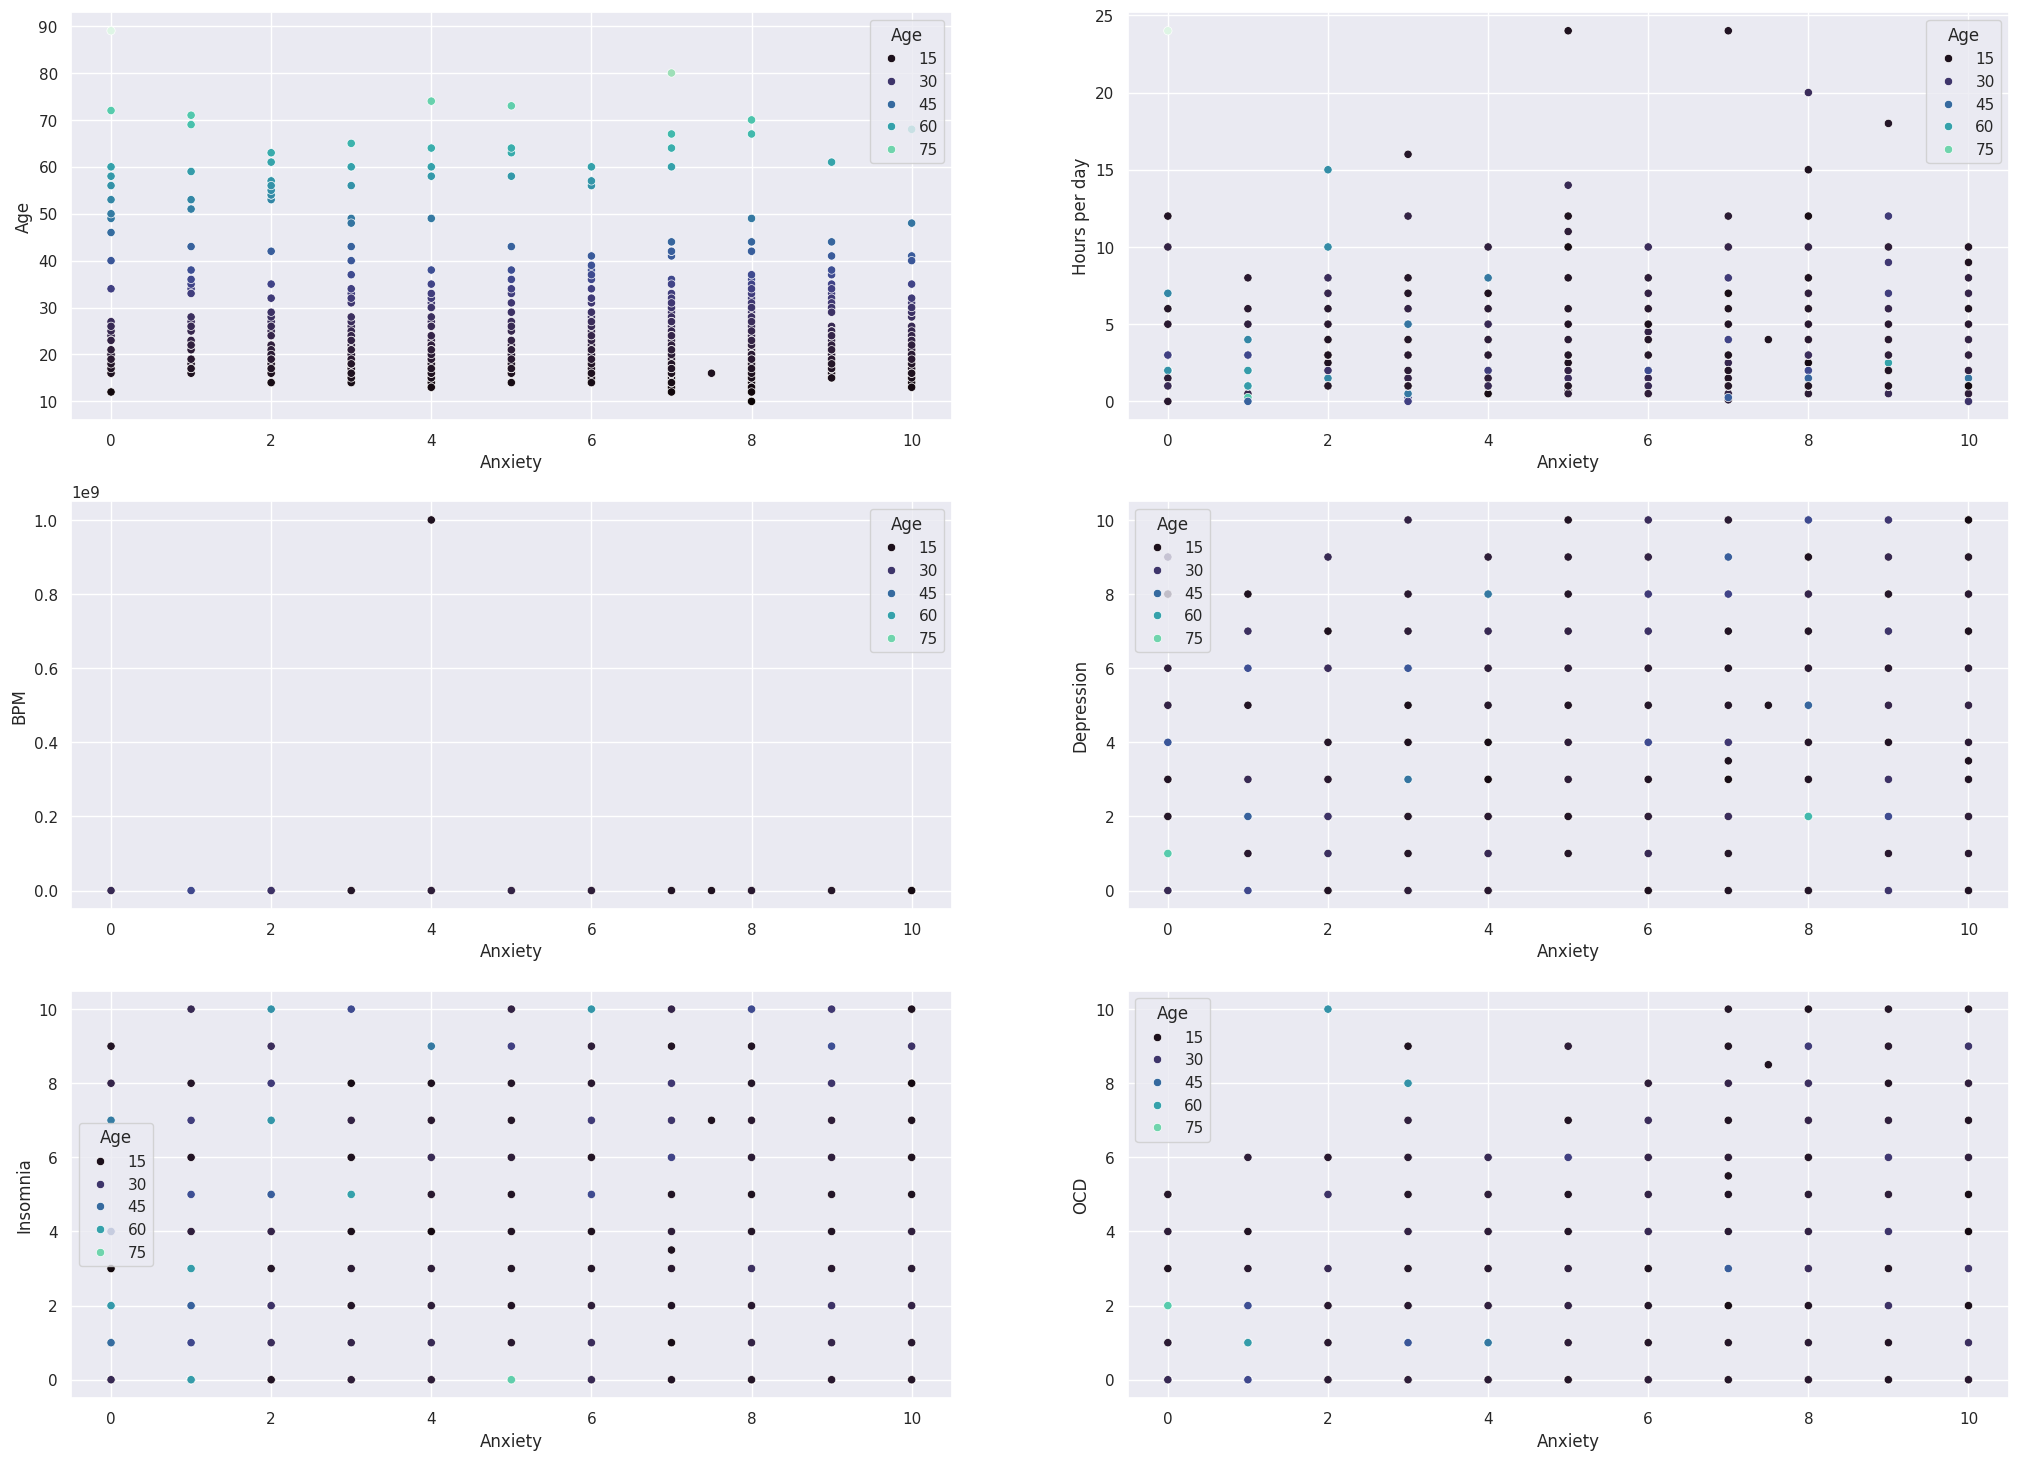

In [ ]:
ff = ['Age','Hours per day','BPM','Depression','Insomnia','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='Anxiety',y=col,hue='Age',data=df,palette="mako")

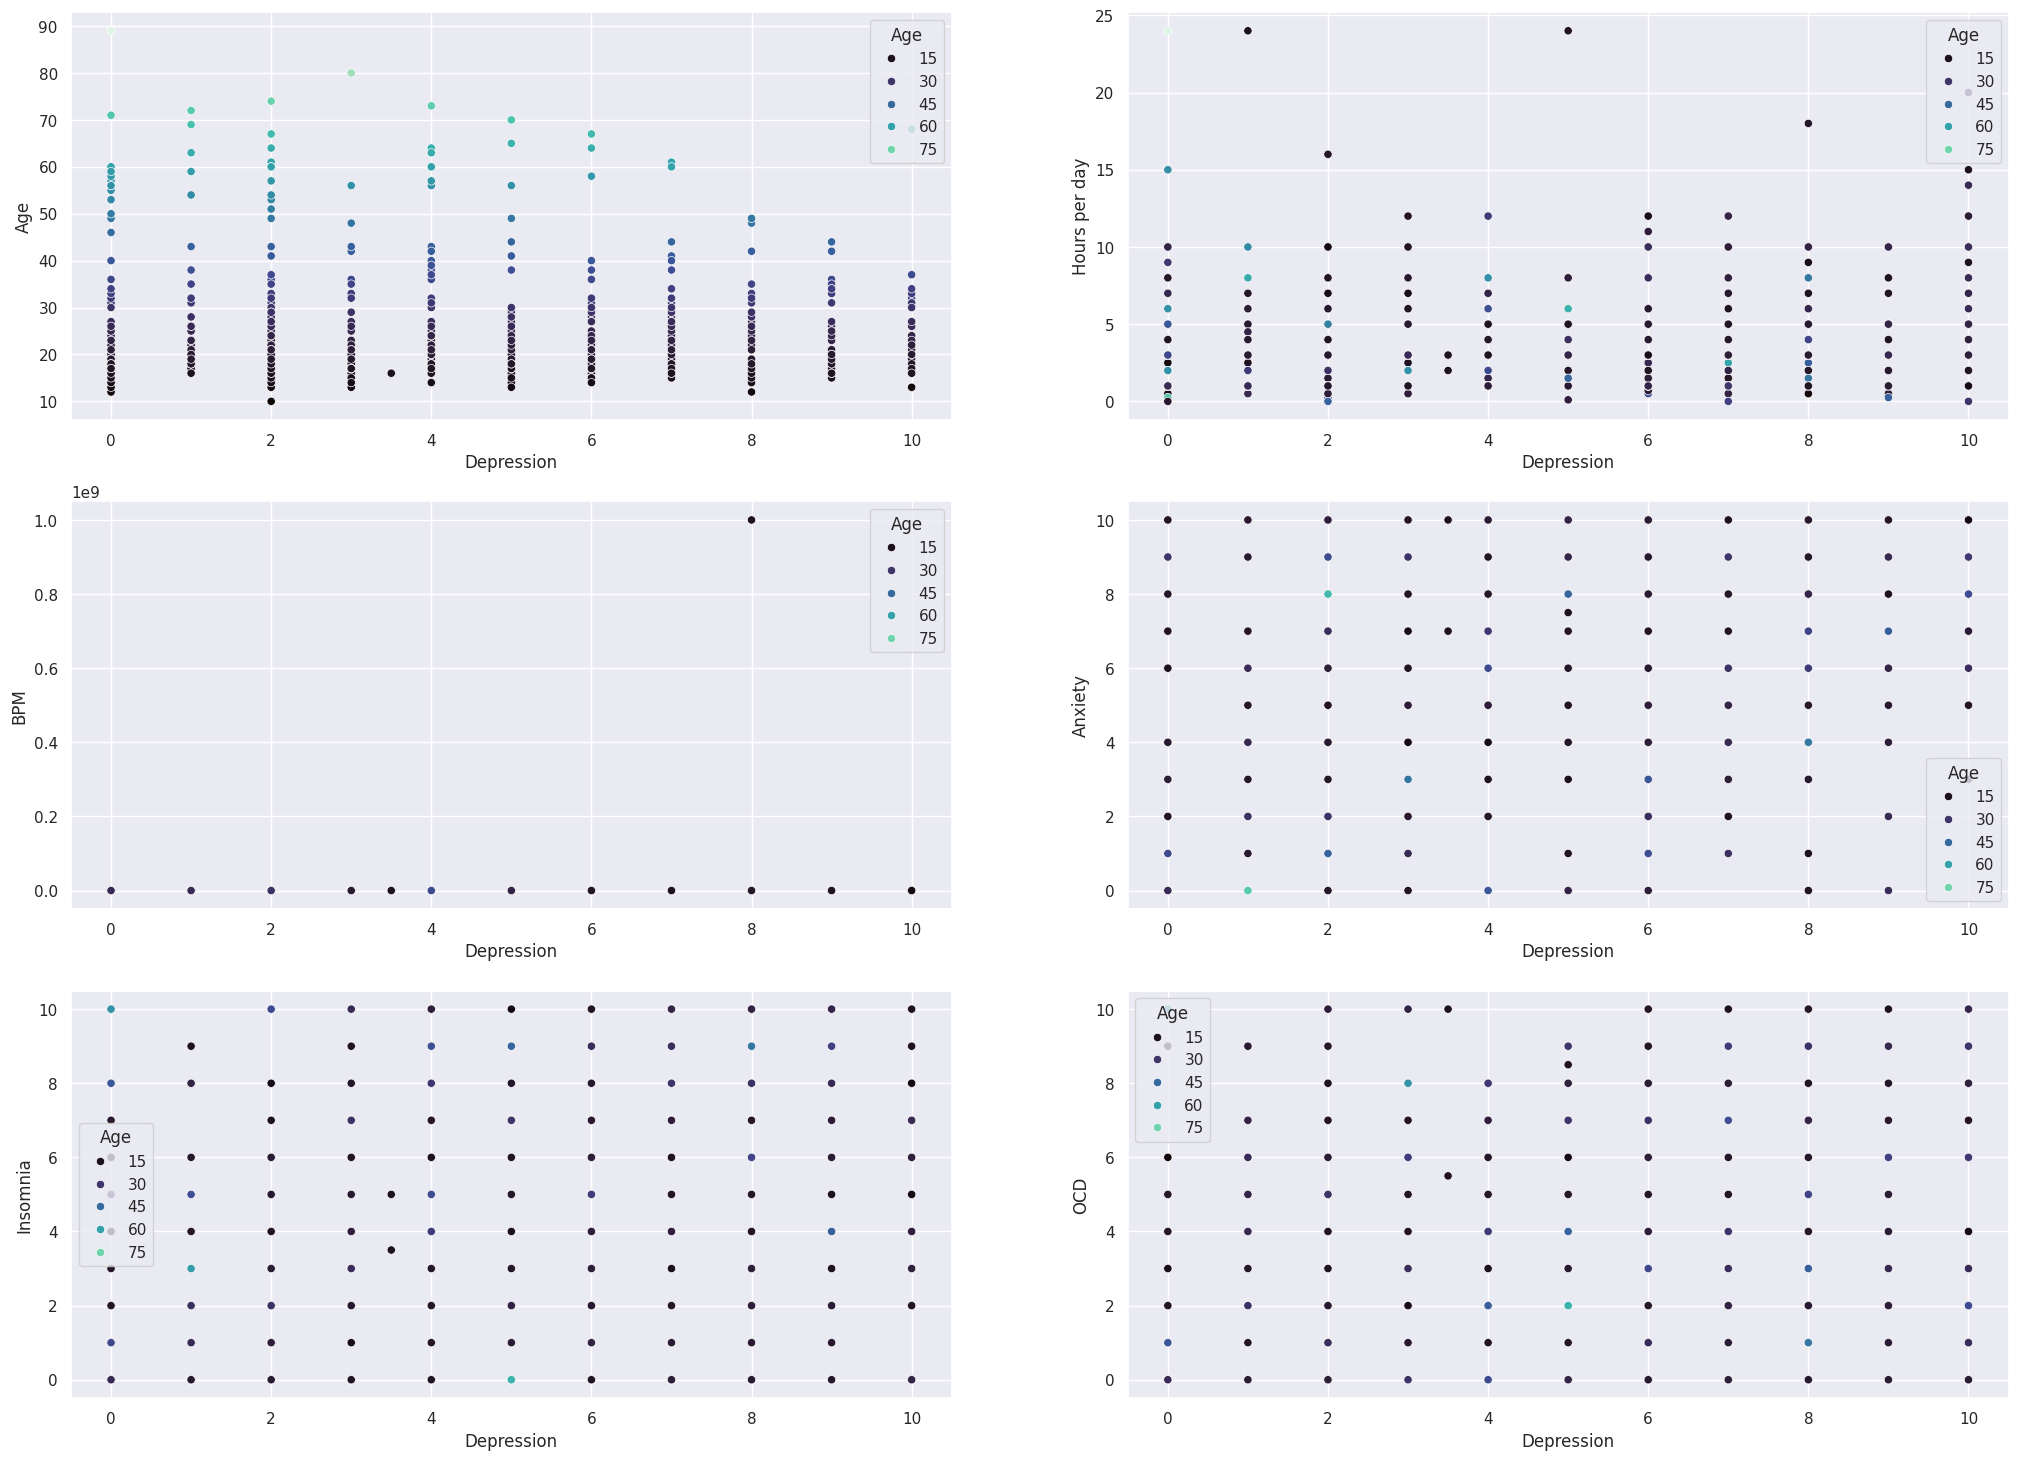

In [ ]:
ff = ['Age','Hours per day','BPM','Anxiety','Insomnia','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='Depression',y=col,hue='Age',data=df,palette="mako")

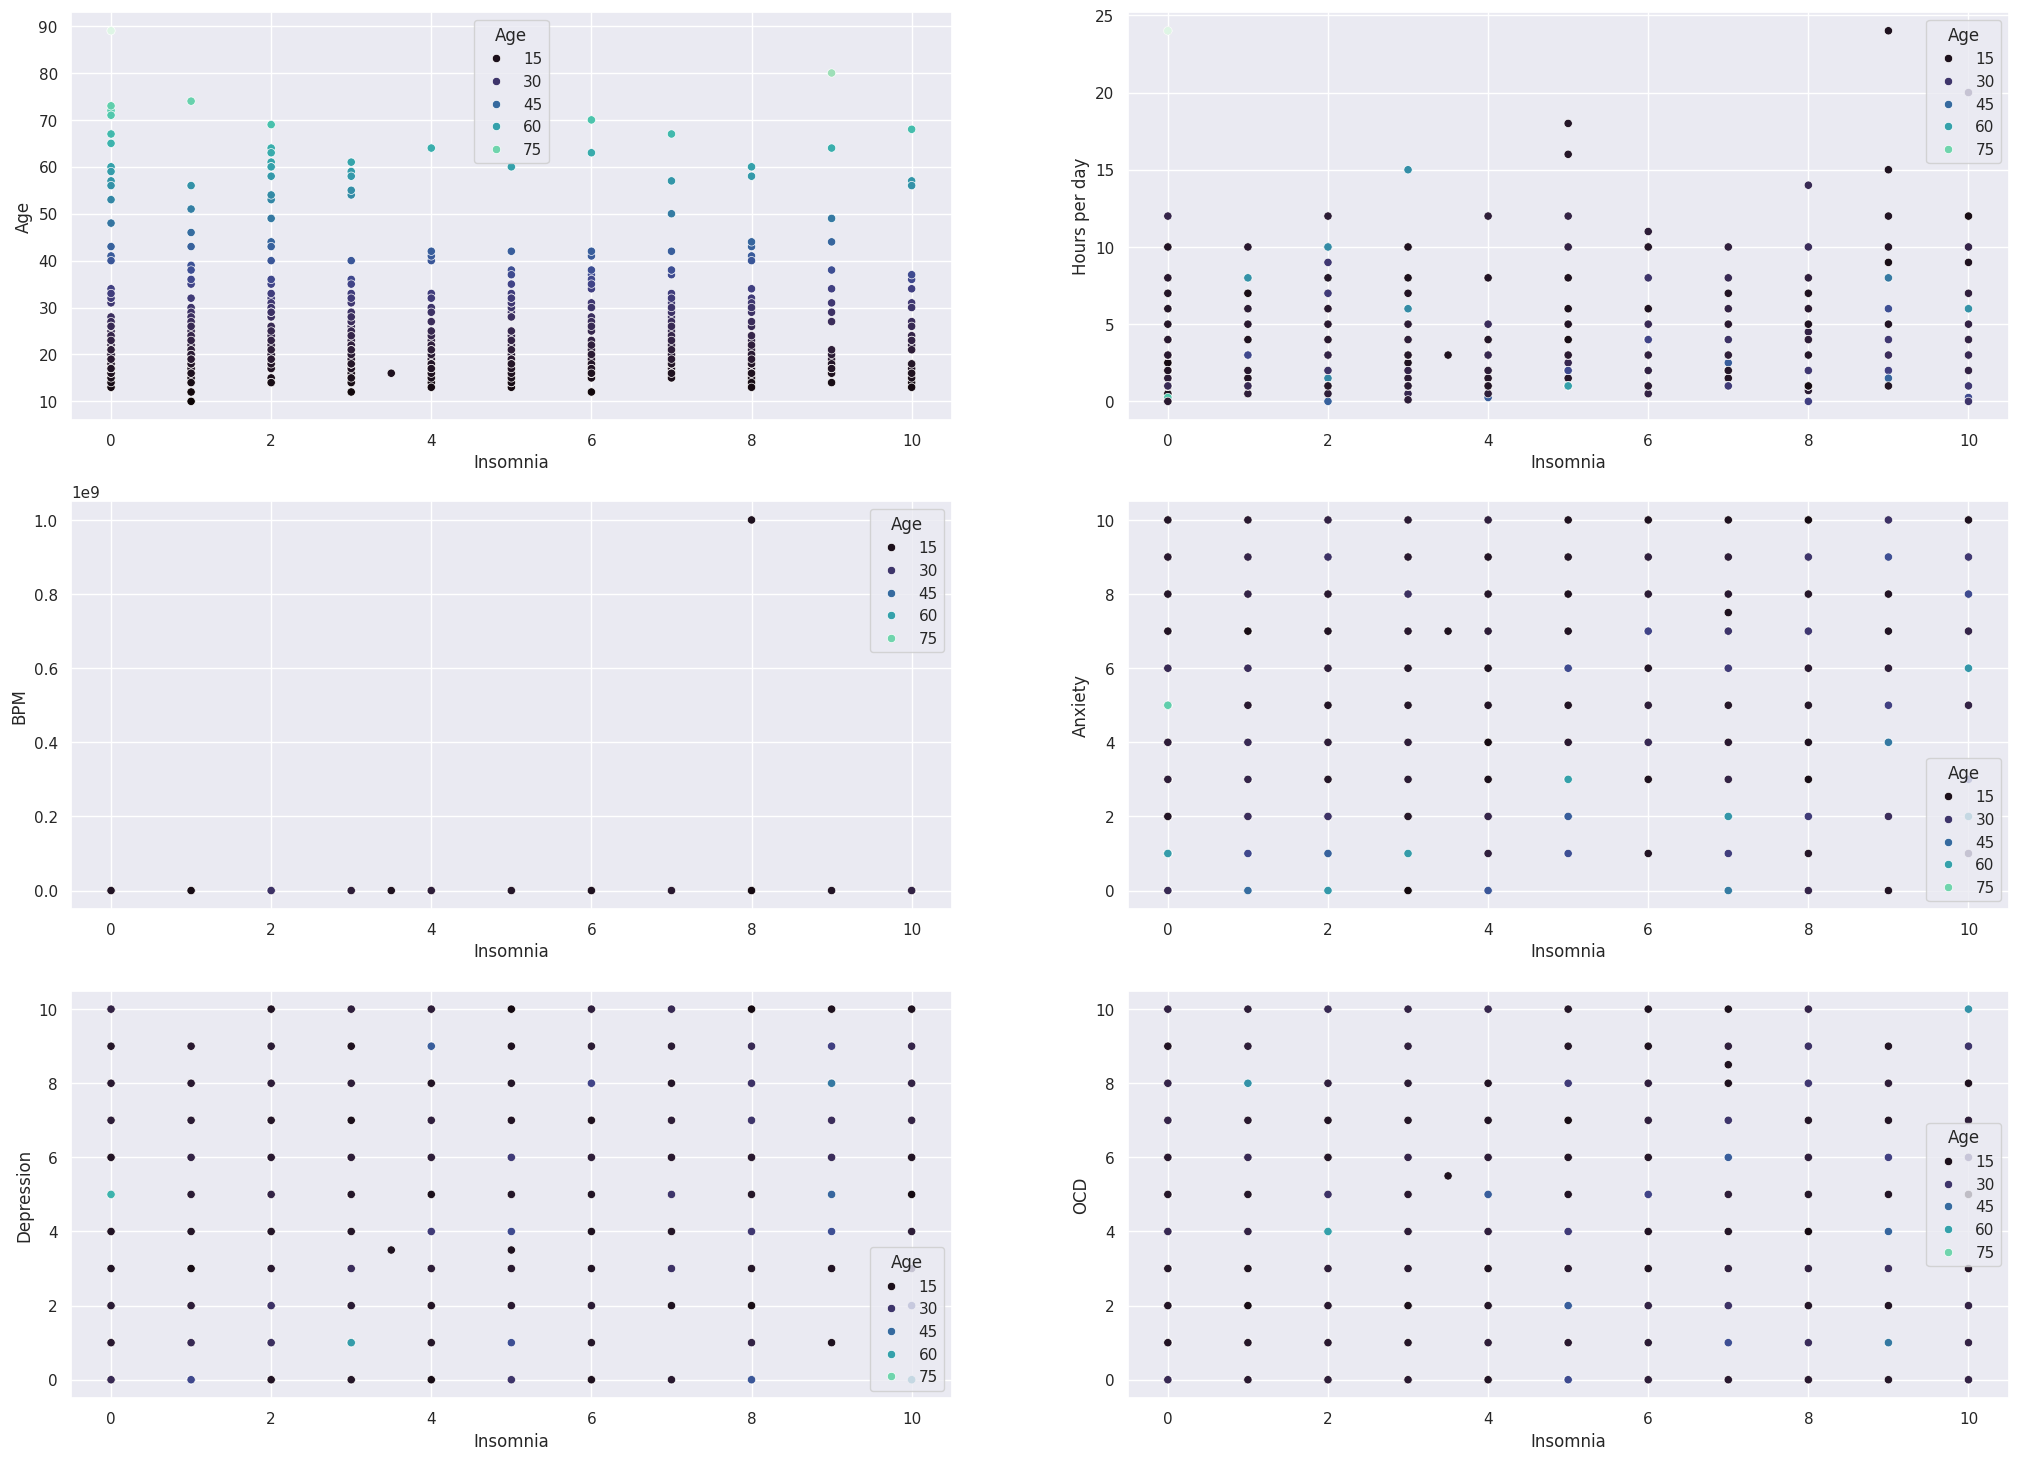

In [ ]:
ff = ['Age','Hours per day','BPM','Anxiety','Depression','OCD']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='Insomnia',y=col,hue='Age',data=df,palette="mako")

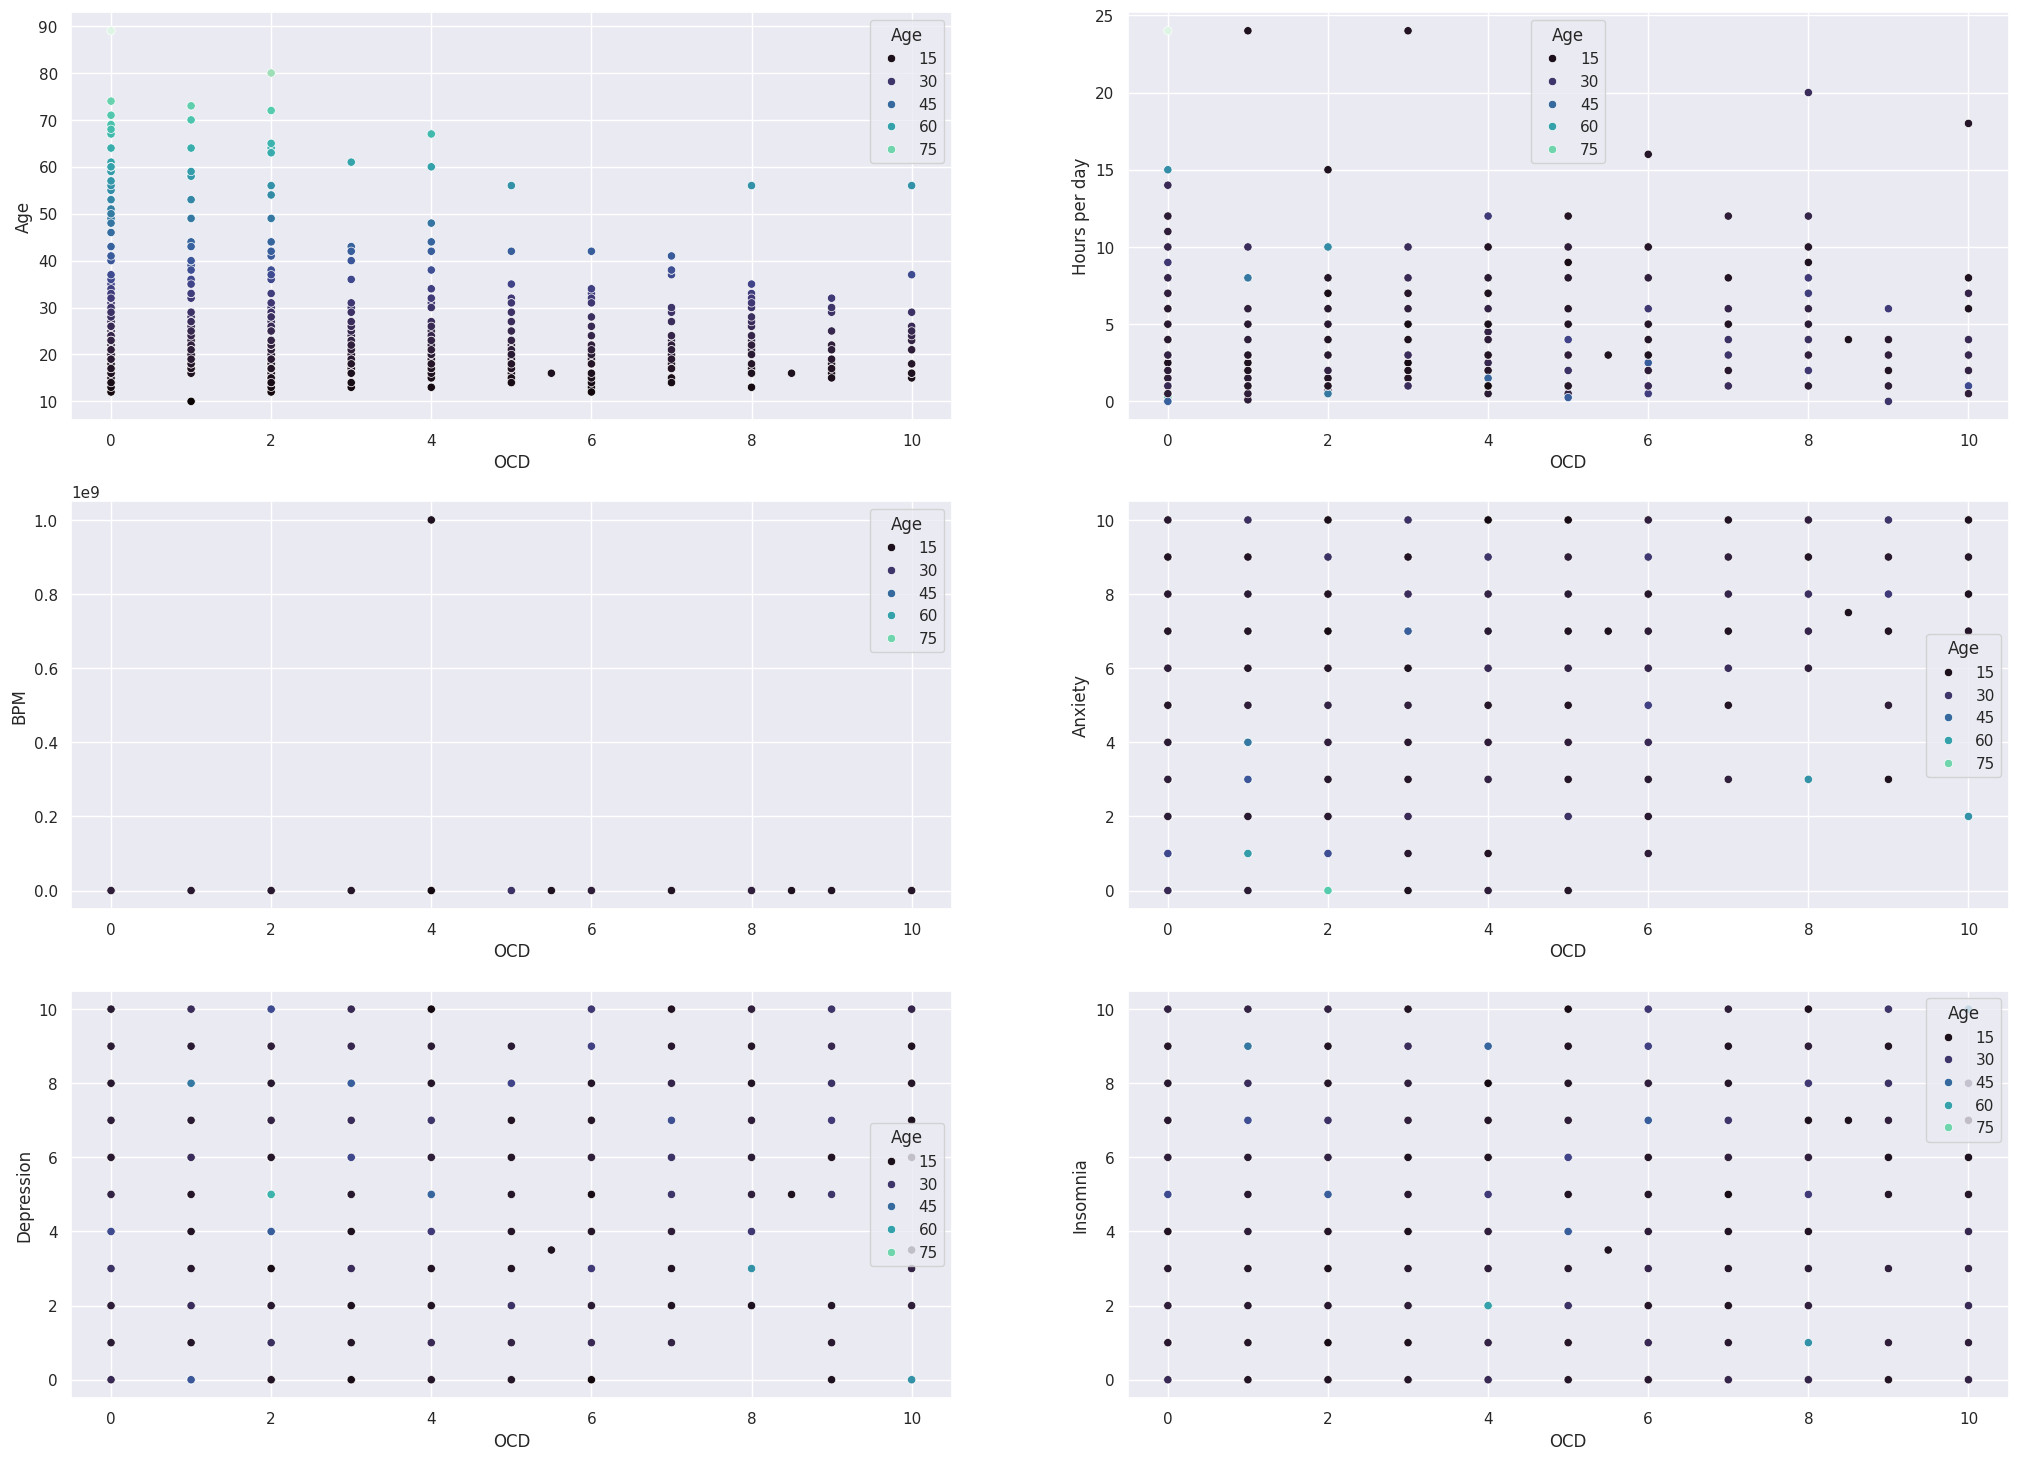

In [ ]:
ff = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia']
fig=plt.figure(figsize=(25,18))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,2,i+1)
    sns.scatterplot(x='OCD',y=col,hue='Age',data=df,palette="mako")

In [ ]:
fig = px.scatter_3d(df, x='Insomnia', y='Anxiety', z='Depression', color='Age', color_continuous_scale="PRGn", template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()

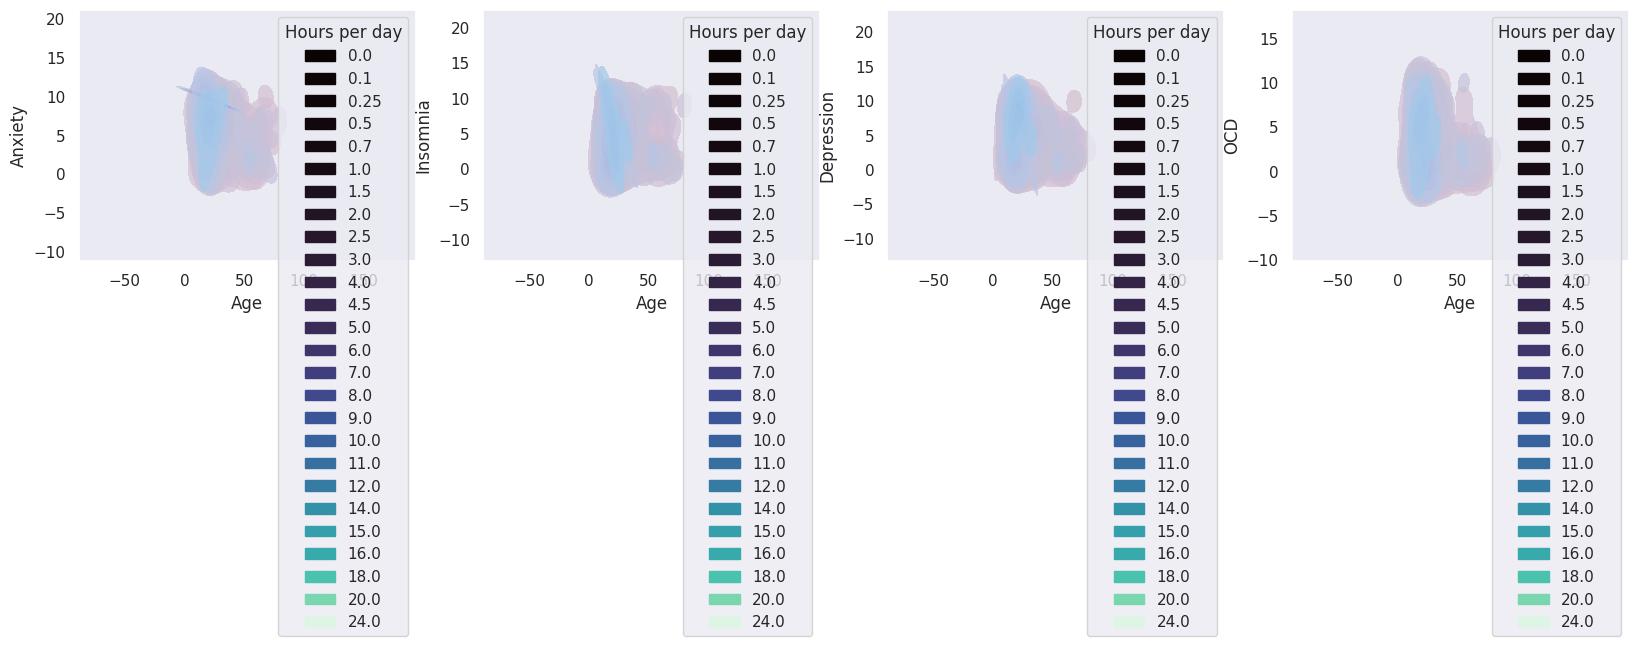

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.kdeplot(data=df[df1],x='Age', y='Anxiety', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,2)
sns.kdeplot(data=df[df1],x='Age', y='Insomnia', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,3)
sns.kdeplot(data=df[df1],x='Age', y='Depression', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,4)
sns.kdeplot(data=df[df1],x='Age', y='OCD', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()

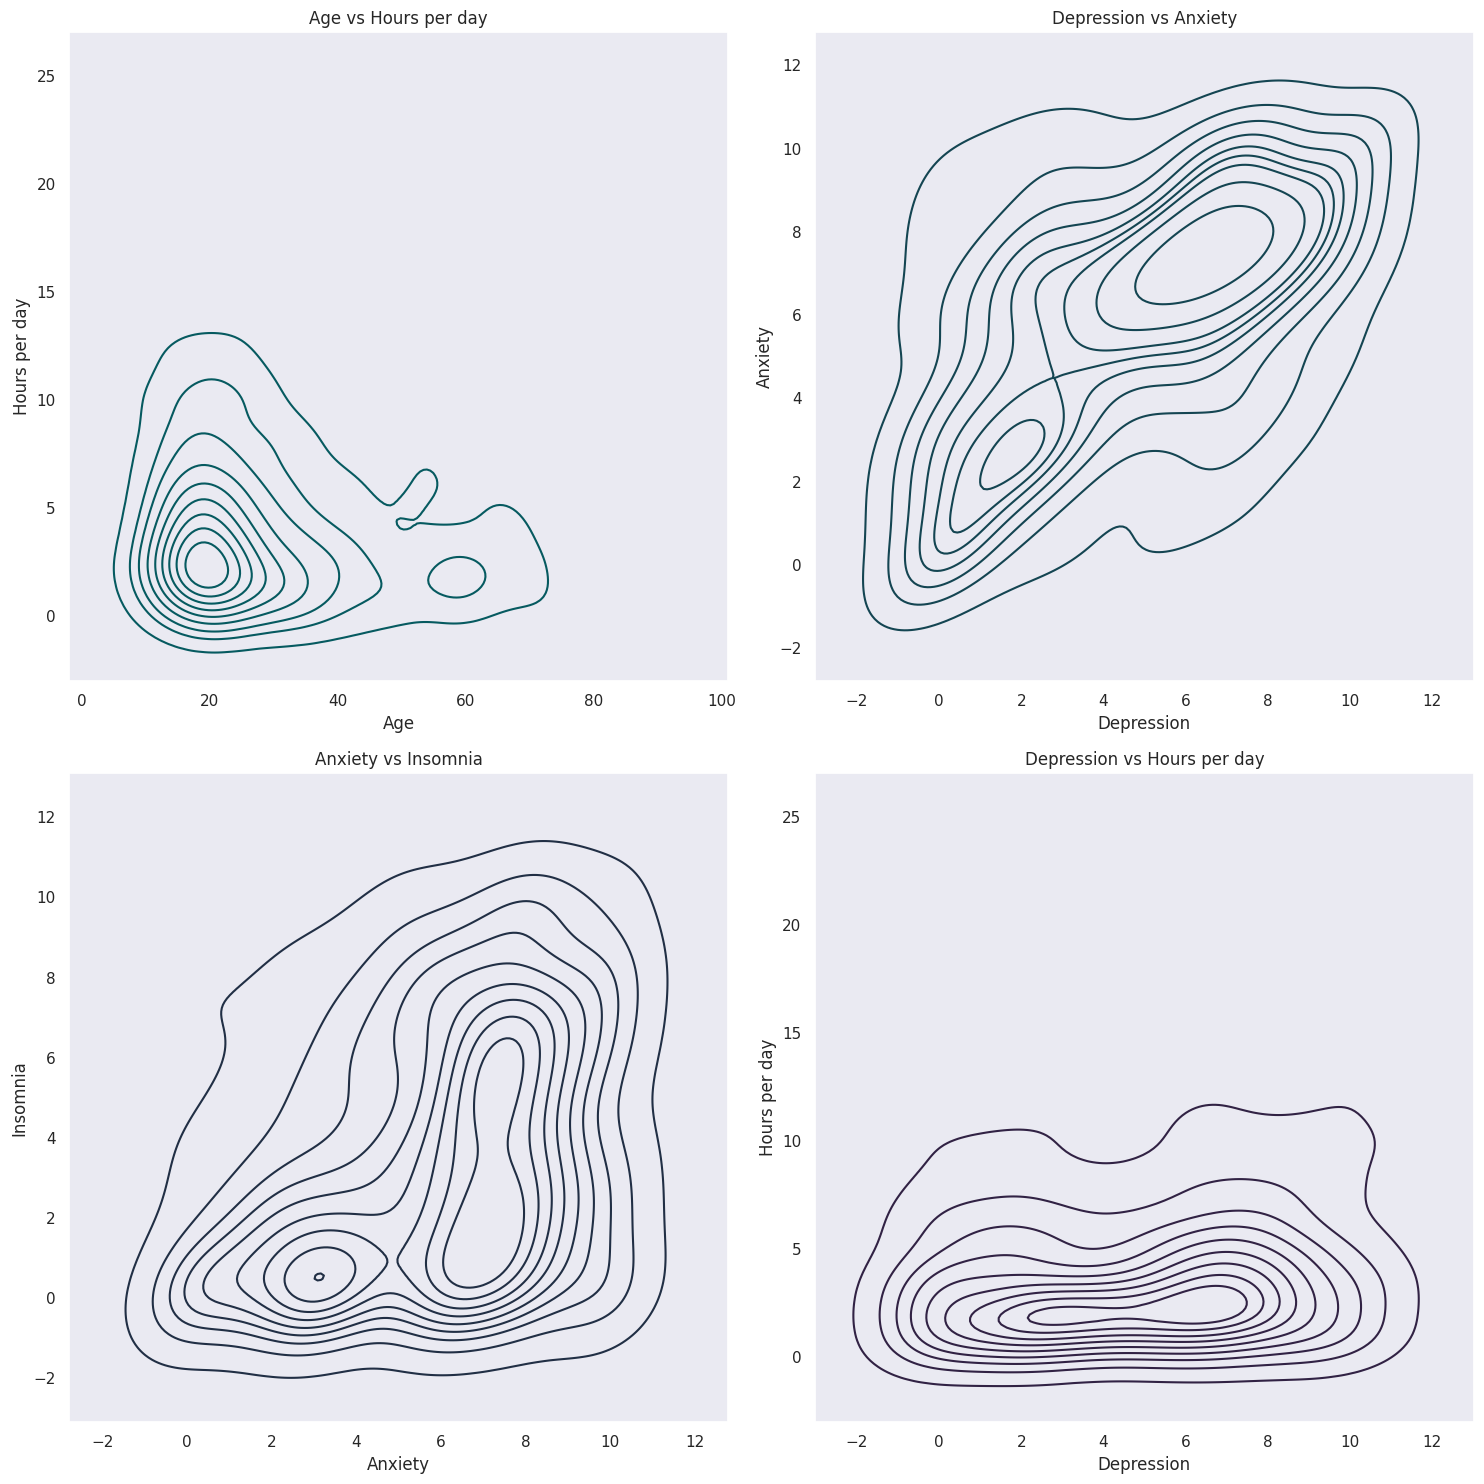

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(x='Age', y='Hours per day', data=df, ax=axs[0, 0], color='#065A60')
axs[0, 0].set_title('Age vs Hours per day')
axs[0, 0].grid()
sns.kdeplot(x='Depression', y='Anxiety', data=df, ax=axs[0, 1], color='#144552')
axs[0, 1].set_title('Depression vs Anxiety')
axs[0, 1].grid()
sns.kdeplot(x='Anxiety', y='Insomnia', data=df, ax=axs[1, 0], color='#212F45')
axs[1, 0].set_title('Anxiety vs Insomnia')
axs[1, 0].grid()
sns.kdeplot(x='Depression', y='Hours per day', data=df, ax=axs[1, 1], color='#312244')
axs[1, 1].set_title('Depression vs Hours per day')
axs[1, 1].grid()
plt.tight_layout()
plt.show()

<Axes: xlabel='OCD', ylabel='Density'>

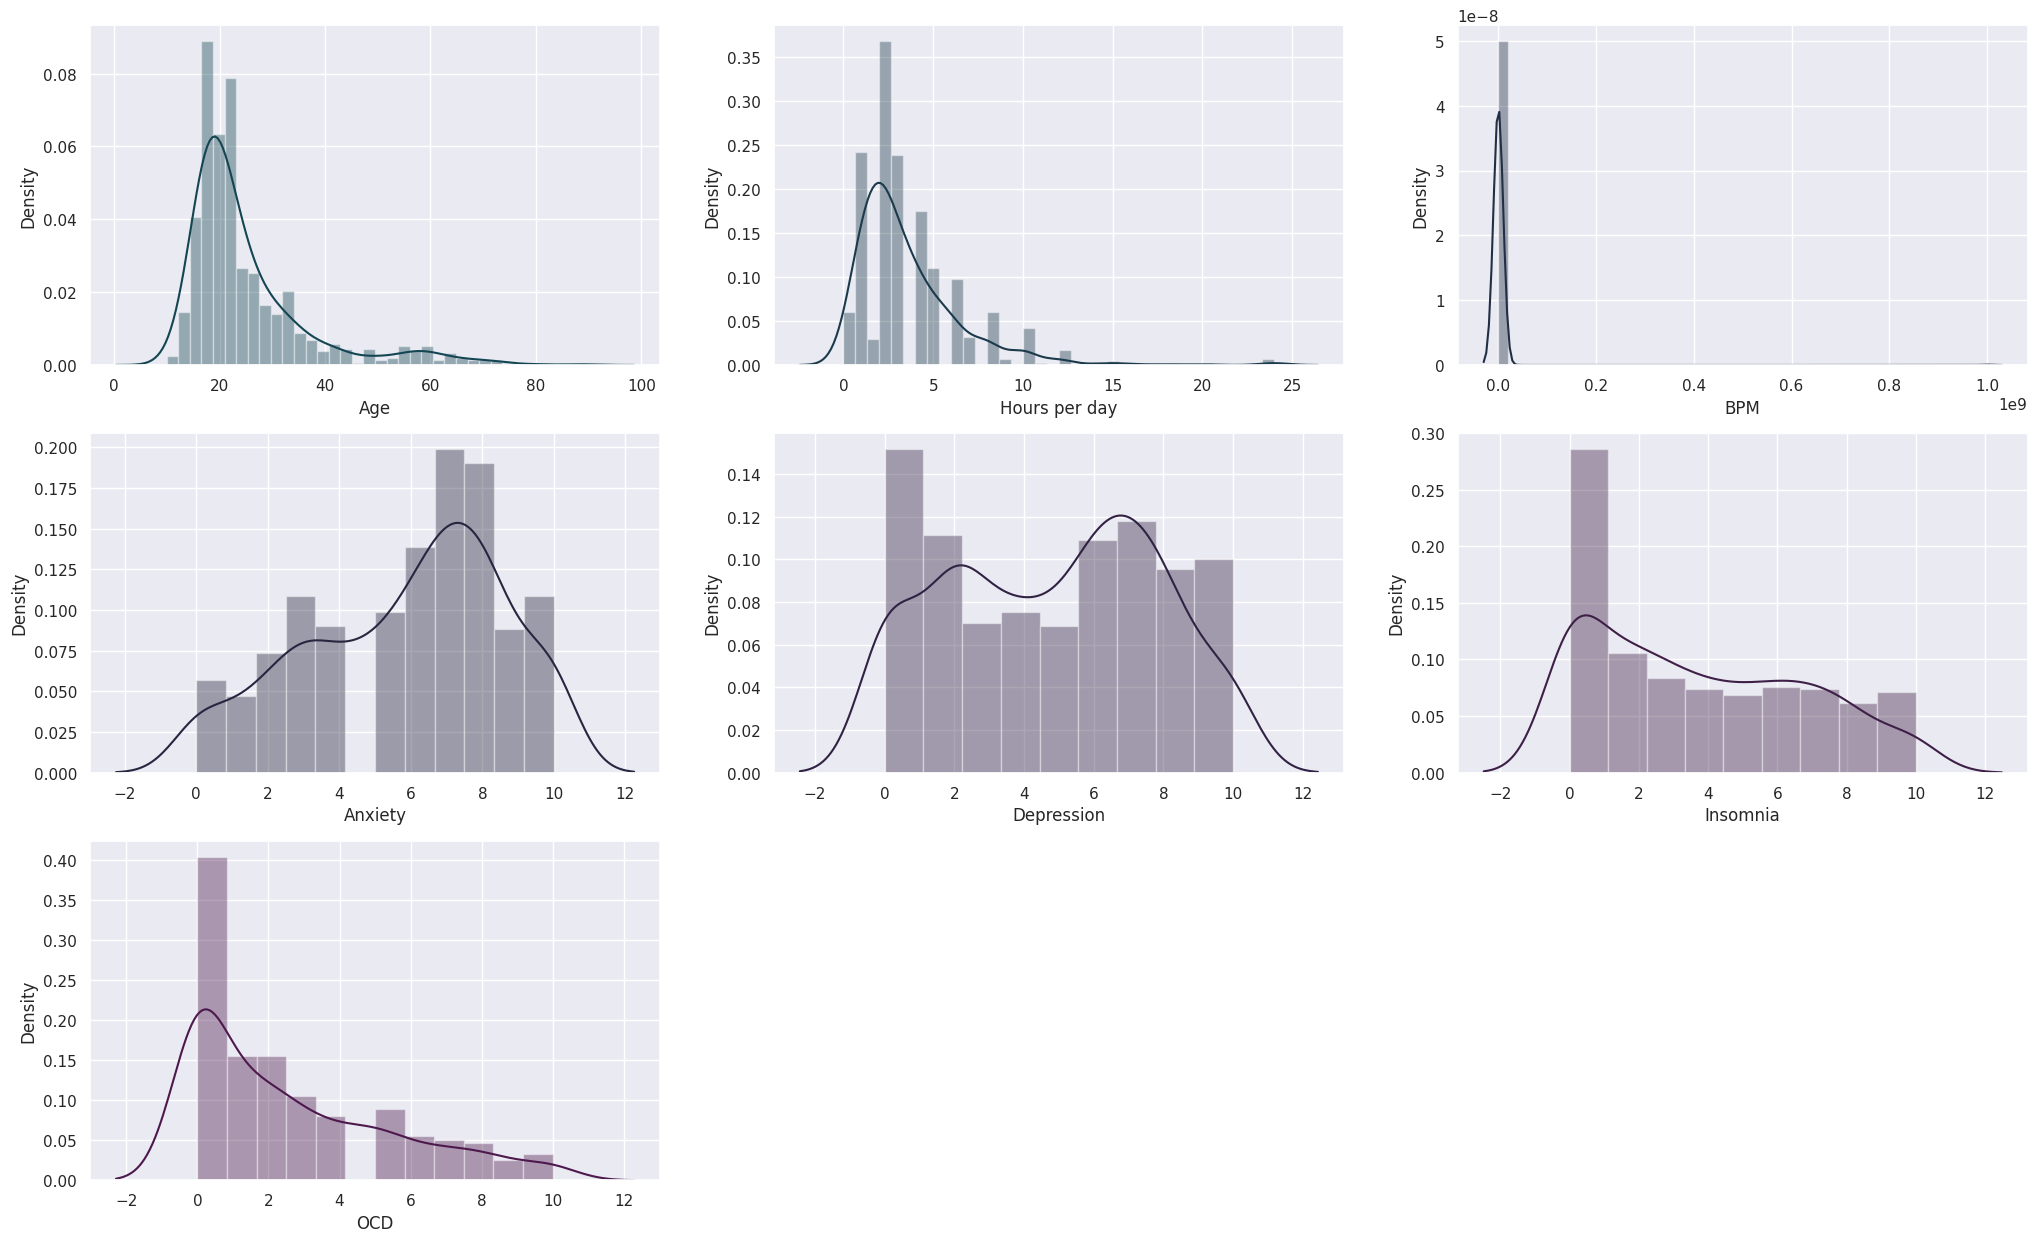

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.distplot(df['Age'],kde=True,color='#144552')
plt.subplot(3,3,2)
sns.distplot(df['Hours per day'],kde=True,color='#1B3A4B')
plt.subplot(3,3,3)
sns.distplot(df['BPM'],kde=True,color='#212F45')
plt.subplot(3,3,4)
sns.distplot(df['Anxiety'],kde=True,color='#272640')
plt.subplot(3,3,5)
sns.distplot(df['Depression'],kde=True,color='#312244')
plt.subplot(3,3,6)
sns.distplot(df['Insomnia'],kde=True,color='#3E1F47')
plt.subplot(3,3,7)
sns.distplot(df['OCD'],kde=True,color='#4D194D')

In [ ]:
# measure of skewness
df[df1].skew(axis = 0, skipna = True)

Age               2.135697
Hours per day     2.550819
BPM              26.795522
Anxiety          -0.426211
Depression       -0.059075
Insomnia          0.415499
OCD               0.963606
dtype: float64

In [ ]:
print('Records that consist of +12 hours listening to music:\n')
print(f'{len(df[df["Hours per day"] > 12])} records')
print("{:.2f}% of data".format((len(df[df['Hours per day'] > 12]) / data.shape[0]) * 100))

Records that consist of +12 hours listening to music:

9 records
1.22% of data


In [ ]:
outre = df.query('`Hours per day` > 12')
outre

Timestamp   Age Primary streaming service  Hours per day  \
18    8/27/2022 23:40:55  17.0                   Spotify           24.0   
290    8/29/2022 2:46:27  27.0                   Spotify           20.0   
347    8/29/2022 9:42:23  18.0                   Spotify           16.0   
359   8/29/2022 11:02:29  16.0                   Spotify           15.0   
366   8/29/2022 12:32:30  16.0                   Spotify           24.0   
407   8/29/2022 23:20:48  26.0                   Spotify           14.0   
485    9/1/2022 19:08:55  55.0             YouTube Music           15.0   
695   9/28/2022 17:25:48  89.0                   Spotify           24.0   
726  10/23/2022 20:50:27  18.0               Apple Music           18.0   

    While working Instrumentalist Composer Fav genre Exploratory  \
18            Yes              No       No       Rap         Yes   
290           Yes              No       No      Rock         Yes   
347           Yes              No      Yes      Jazz         Yes   
359           Yes             Yes      Yes       EDM         Yes   
366           Yes              No       No      Rock         Yes   
407           Yes              No       No   Hip hop         Yes   
485           Yes              No       No      Rock          No   
695           Yes             Yes      Yes       Rap          No   
726           Yes              No       No       EDM         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
18                 No  ...        Sometimes  Very frequently  Very frequently   
290               Yes  ...            Never           Rarely  Very frequently   
347               Yes  ...  Very frequently  Very frequently  Very frequently   
359                No  ...            Never  Very frequently  Very frequently   
366               Yes  ...           Rarely           Rarely        Sometimes   
407               Yes  ...  Very frequently  Very frequently  Very frequently   
485                No  ...            Never            Never  Very frequently   
695                No  ...        Sometimes  Very frequently           Rarely   
726                No  ...        Sometimes        Sometimes        Sometimes   

    Frequency [Video game music] Anxiety Depression Insomnia   OCD  \
18                         Never     7.0        5.0      0.0   3.0   
290                    Sometimes     8.0       10.0     10.0   8.0   
347                       Rarely     3.0        2.0      5.0   6.0   
359                    Sometimes     8.0       10.0      9.0   2.0   
366                       Rarely     5.0        1.0      9.0   1.0   
407                       Rarely     5.0       10.0      8.0   0.0   
485                        Never     2.0        0.0      3.0   0.0   
695                        Never     0.0        0.0      0.0   0.0   
726                    Sometimes     9.0        8.0      5.0  10.0   

    Music effects    Permissions  
18        Improve  I understand.  
290     No effect  I understand.  
347       Improve  I understand.  
359       Improve  I understand.  
366       Improve  I understand.  
407     No effect  I understand.  
485     No effect  I understand.  
695     No effect  I understand.  
726       Improve  I understand.  

[9 rows x 33 columns]

In [ ]:
anx = data.query('`Hours per day` < 12')['Anxiety'].mean()
dep = data.query('`Hours per day` < 12')['Depression'].mean()
ins = data.query('`Hours per day` < 12')['Insomnia'].mean()
ocd = data.query('`Hours per day` < 12')['OCD'].mean()
anx1 = outre['Anxiety'].mean()
dep1 = outre['Depression'].mean()
ins1 = outre['Insomnia'].mean()
ocd1 = outre['OCD'].mean()

In [ ]:
print('\033[96m Rating Averages by Mental Condition (+ 12 hours listening to music):')
print(f'\033[0mAnxiety: {anx}')
print(f'Depression: {dep}')
print(f'Insomnia: {ins}')
print(f'OCD: {ocd}\n')
print('\033[95m Rating Averages by Mental Condition (+ 12 hours listening to music):')
print(f'\033[0mAnxiety: {round(anx1, 1)}')
print(f'Depression: {round(dep1, 1)}')
print(f'Insomnia: {round(ins1, 1)}')
print(f'OCD: {round(ocd1, 1)}')

 Rating Averages by Mental Condition (+ 12 hours listening to music):
Anxiety: 5.844490934449094
Depression: 4.755927475592747
Insomnia: 3.686889818688982
OCD: 2.605299860529986

 Rating Averages by Mental Condition (+ 12 hours listening to music):
Anxiety: 5.2
Depression: 5.1
Insomnia: 5.4
OCD: 3.3


In [ ]:
print('Records that consist +180 BPM:\n')
print(f'{len(df[df["BPM"] > 180])} records')
print("{:.2f}% of df".format((len(df[df['BPM'] > 180]) / df.shape[0]) * 100))

Records that consist +180 BPM:

28 records
3.90% of df


In [ ]:
outre2 = (df.query('BPM > 180')[
        ['Age', 'Primary streaming service', 'Hours per day', 'Instrumentalist',
        'Fav genre','Exploratory', 'BPM','Anxiety', 'Depression','Insomnia',
        'OCD', 'Music effects']].reset_index().drop(columns='index'))
outre2

Age          Primary streaming service  Hours per day Instrumentalist  \
0   17.0                        Apple Music            1.0              No   
1   22.0                            Spotify           10.0              No   
2   31.0                            Spotify            2.0              No   
3   15.0                            Spotify            8.0              No   
4   29.0            Other streaming service            5.0              No   
5   27.0                            Spotify           10.0              No   
6   28.0  I do not use a streaming service.            4.0              No   
7   18.0                            Spotify            1.0             Yes   
8   27.0                            Spotify           10.0              No   
9   64.0  I do not use a streaming service.            4.0              No   
10  20.0                            Spotify            2.0             Yes   
11  20.0                        Apple Music            3.0             Yes   
12  30.0                            Spotify            1.0              No   
13  17.0                            Spotify            2.0              No   
14  27.0                            Spotify            3.0              No   
15  14.0                            Spotify            2.0             Yes   
16  32.0                            Spotify           12.0             Yes   
17  38.0                            Spotify            1.0              No   
18  48.0                            Spotify            1.5             Yes   
19  15.0                            Spotify            3.0              No   
20  18.0                            Spotify            3.0             Yes   
21  16.0                            Spotify            7.0              No   
22  26.0  I do not use a streaming service.            1.0              No   
23  56.0  I do not use a streaming service.            2.0              No   
24  16.0            Other streaming service            4.0              No   
25  32.0                            Spotify            1.0              No   
26  37.0                            Spotify            2.0              No   
27  19.0                            Spotify            5.0              No   

           Fav genre Exploratory          BPM  Anxiety  Depression  Insomnia  \
0                Pop         Yes        183.0      8.0         2.0       1.0   
1              Metal         Yes        189.0      9.0         6.0       0.0   
2               Rock         Yes        200.0      8.0         9.0       6.0   
3               Rock          No        193.0      8.0         7.0       5.0   
4               Jazz         Yes        200.0      7.0         2.0       3.0   
5              Metal         Yes        185.0      5.0         6.0       6.0   
6               Rock         Yes        194.0      6.0         8.0       1.0   
7              Metal         Yes        190.0      6.0         9.0       9.0   
8              Metal         Yes        194.0      8.0         8.0       3.0   
9               Rock          No        200.0      4.0         4.0       2.0   
10             Metal          No        220.0      0.0         0.0       0.0   
11             Metal         Yes        200.0      7.0         4.0       7.0   
12               EDM         Yes        200.0      4.0         4.0       4.0   
13               Pop         Yes        208.0      7.0         6.0       3.0   
14             Metal         Yes        200.0      4.0         0.0       0.0   
15         Classical         Yes        181.0      7.0         5.0       3.0   
16              Jazz         Yes        200.0      9.0         4.0       4.0   
17             Metal         Yes        191.0      1.0         1.0       5.0   
18             Metal          No        185.0     10.0         8.0       0.0   
19             K pop         Yes        204.0      4.0         0.0       0.0   
20             Metal         Yes        210.0      9.0        

In [ ]:
print('Records that consist +70 Age:\n')
print(f'{len(df[df["Age"] > 70])} records')
print("{:.2f}% of df".format((len(df[df['Age'] > 70]) / df.shape[0]) * 100))

Records that consist +70 Age:

6 records
0.84% of df


In [ ]:
outre3 = df.query('Age > 70')
outre3

Timestamp   Age          Primary streaming service  \
428  8/30/2022 17:43:36  72.0                            Spotify   
429  8/30/2022 18:15:39  73.0                            Pandora   
490   9/1/2022 19:44:33  71.0  I do not use a streaming service.   
494   9/1/2022 21:07:33  74.0  I do not use a streaming service.   
527   9/2/2022 14:09:04  80.0  I do not use a streaming service.   
695  9/28/2022 17:25:48  89.0                            Spotify   

     Hours per day While working Instrumentalist Composer  Fav genre  \
428           6.00           Yes             Yes      Yes       Rock   
429           3.00           Yes              No       No        R&B   
490           0.25           Yes              No       No     Gospel   
494           1.00            No              No       No        Pop   
527           3.00           Yes             Yes       No  Classical   
695          24.00           Yes             Yes      Yes        Rap   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
428          No                No  ...  Very frequently            Never   
429         Yes               Yes  ...  Very frequently        Sometimes   
490          No               Yes  ...           Rarely            Never   
494          No                No  ...        Sometimes            Never   
527          No                No  ...            Never            Never   
695          No                No  ...        Sometimes  Very frequently   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
428  Very frequently                        Never     0.0        1.0      0.0   
429        Sometimes                        Never     5.0        4.0      0.0   
490           Rarely                        Never     1.0        0.0      0.0   
494        Sometimes                        Never     4.0        2.0      1.0   
527            Never                    Sometimes     7.0        3.0      9.0   
695           Rarely                        Never     0.0        0.0      0.0   

     OCD Music effects    Permissions  
428  2.0       Improve  I understand.  
429  1.0       Improve  I understand.  
490  0.0       Improve  I understand.  
494  0.0       Improve  I understand.  
527  2.0       Improve  I understand.  
695  0.0     No effect  I understand.  

[6 rows x 33 columns]

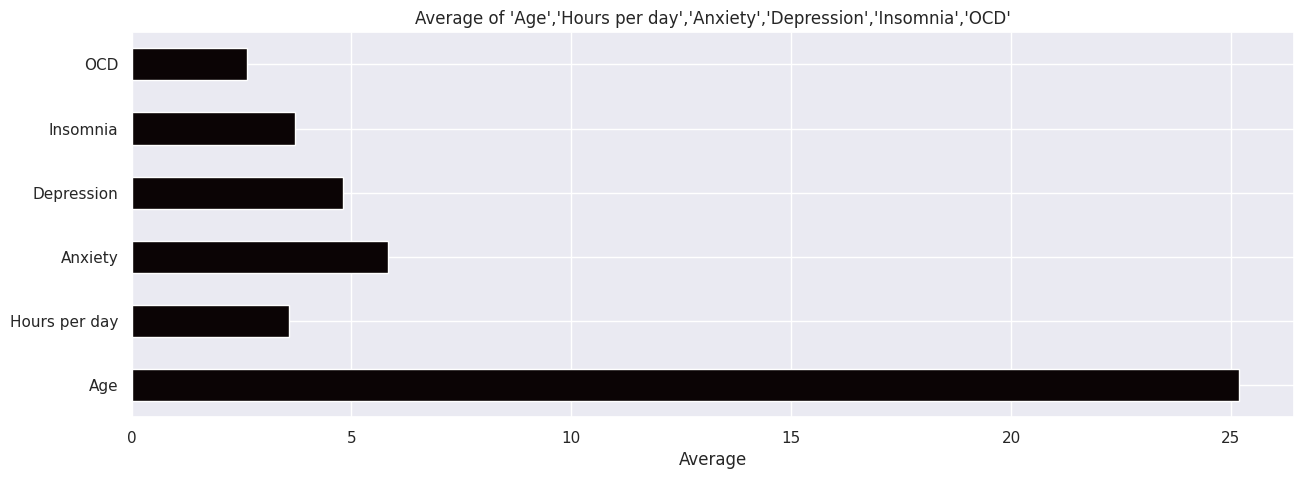

In [ ]:
df2 = ['Age','Hours per day','Anxiety','Depression','Insomnia','OCD']
df_mean = df[df2].mean()
df_mean.plot(kind='barh', stacked=True, figsize=(15, 5), cmap="mako")
plt.xlabel('Average')
plt.title("Average of 'Age','Hours per day','Anxiety','Depression','Insomnia','OCD'")
plt.show()

<Axes: >

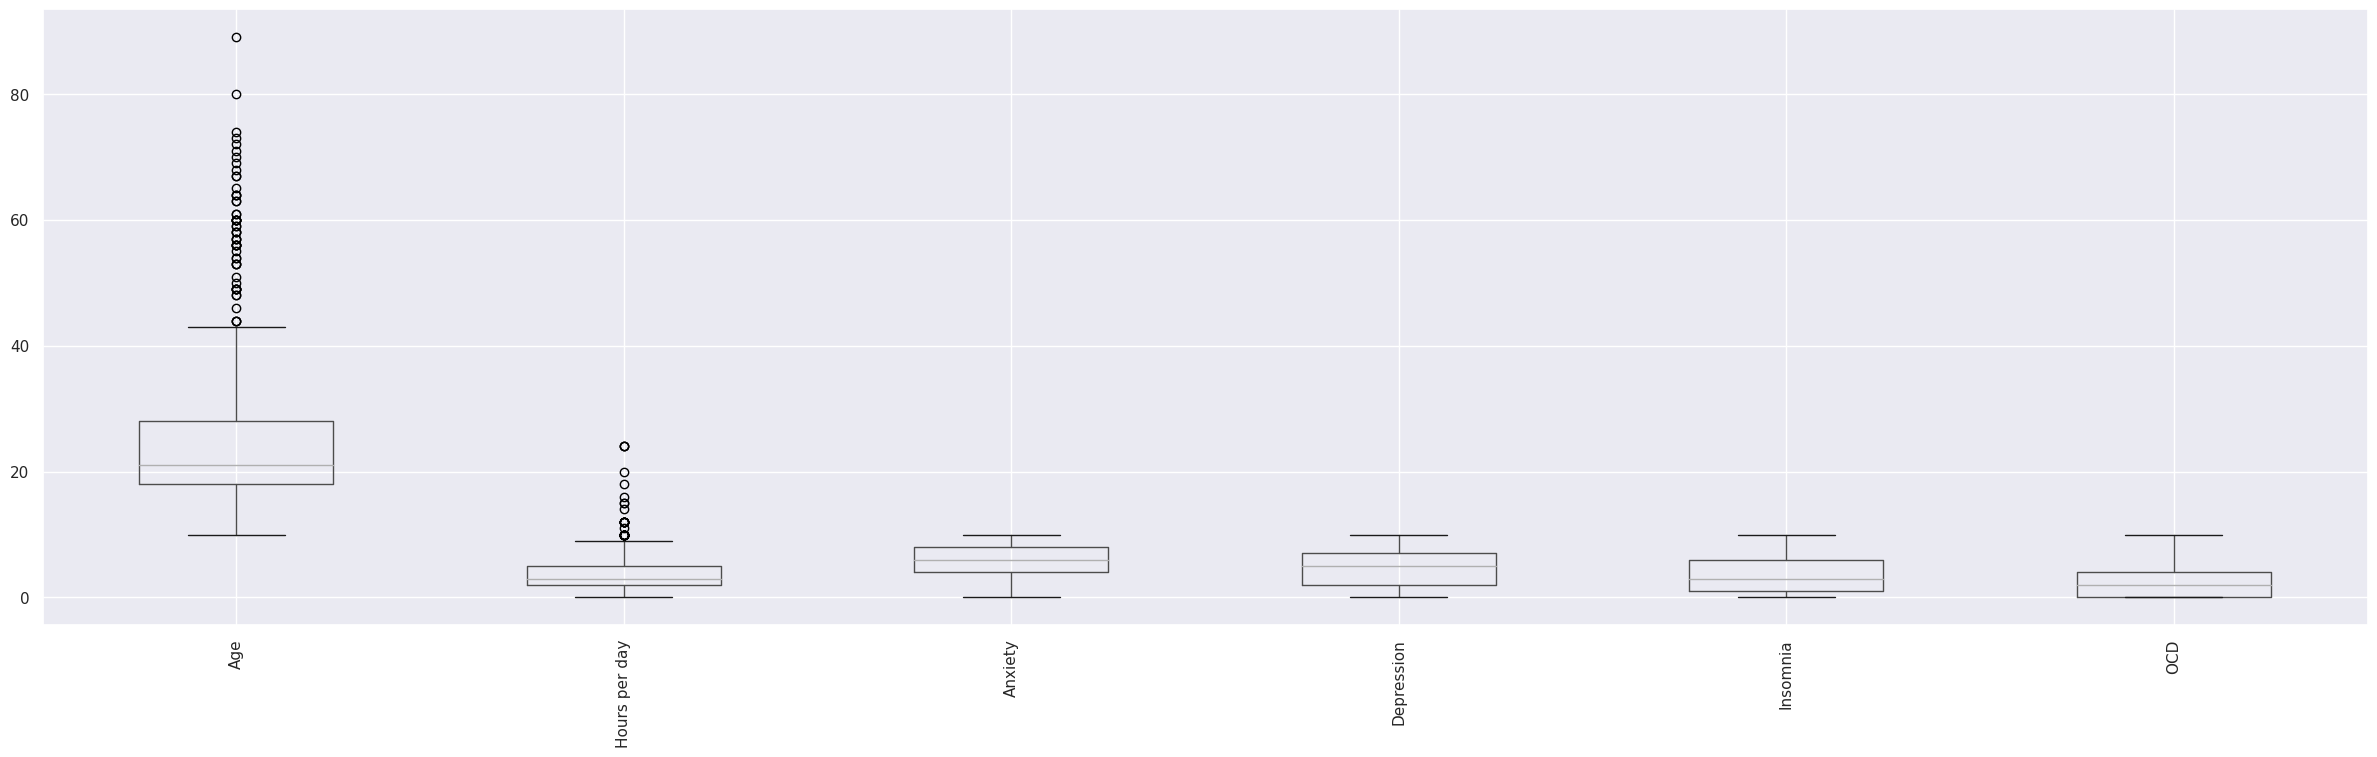

In [ ]:
df[df2].boxplot(rot=90 , figsize=(30,8))

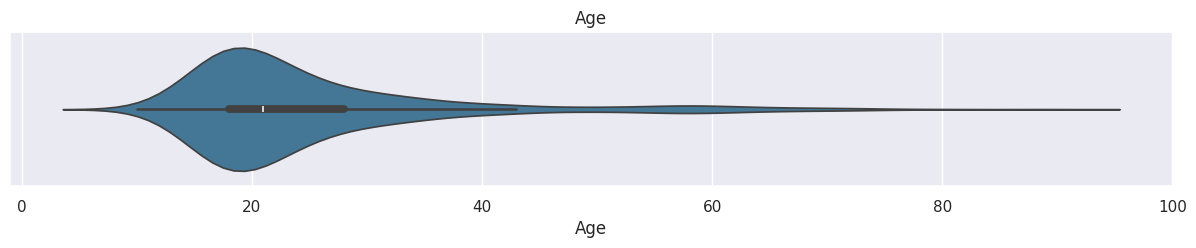

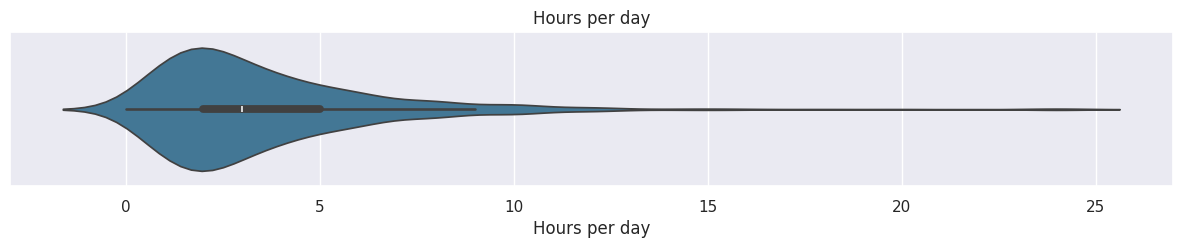

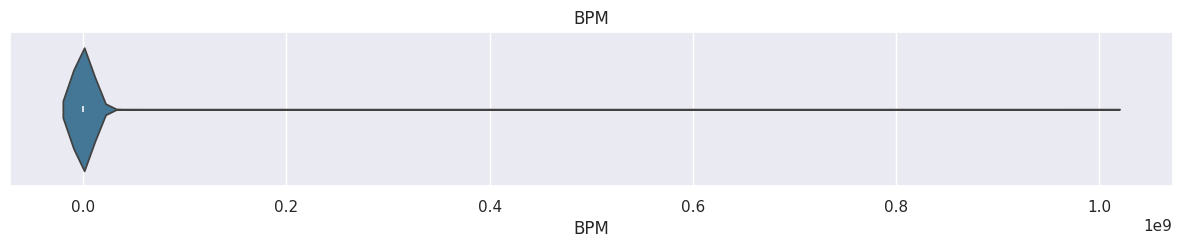

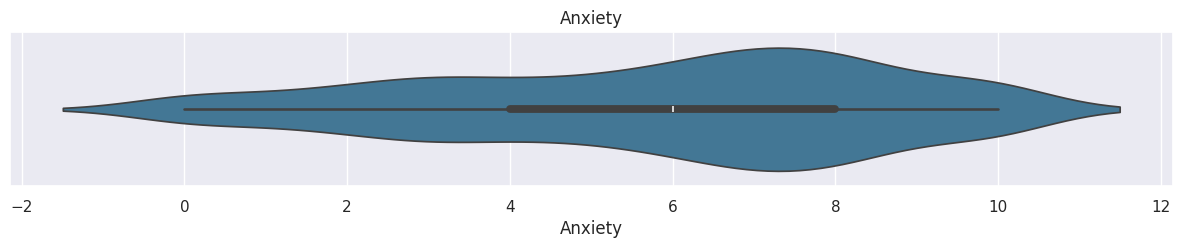

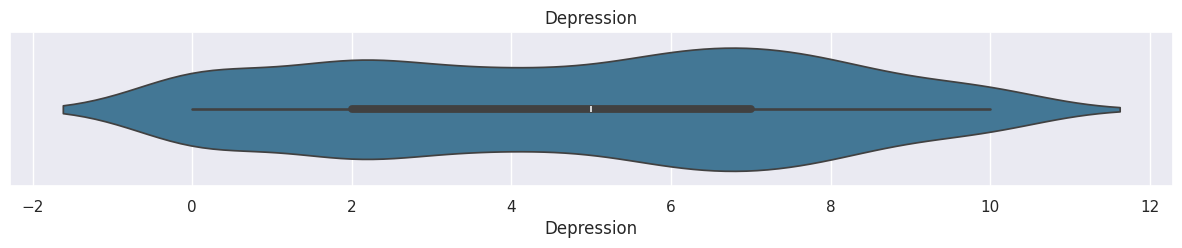

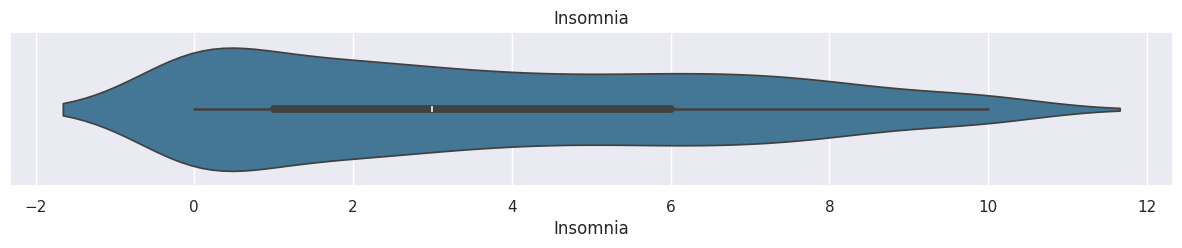

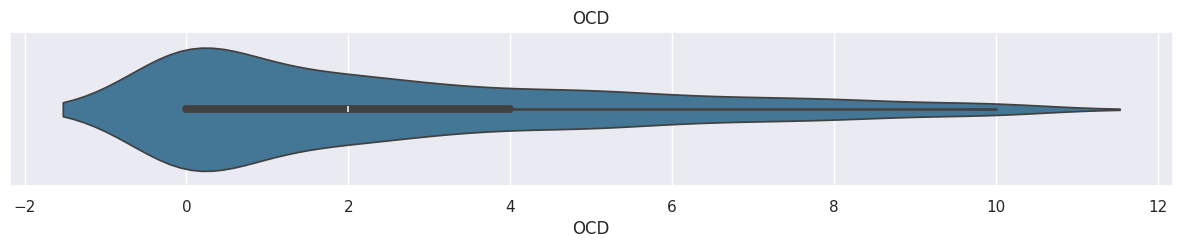

In [ ]:
columns1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
palette ="mako"
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column], palette=palette)
    plt.title(column)
    plt.show()


Age Statistics:
count: 718.00, mean: 25.18, std: 11.95, min: 10.00, 25%: 18.00, 50%: 21.00, 75%: 28.00, max: 89.00


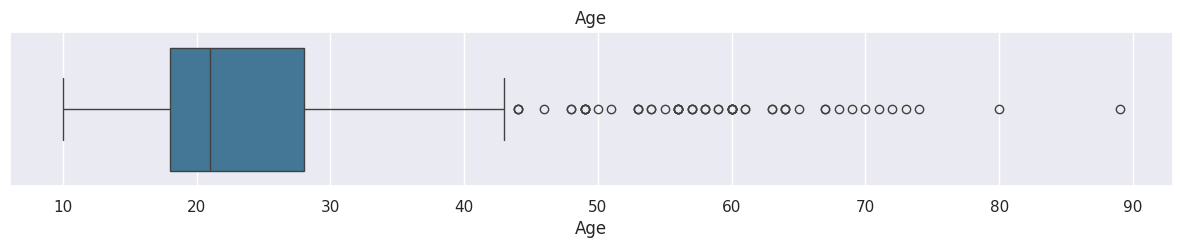


Hours per day Statistics:
count: 718.00, mean: 3.58, std: 3.02, min: 0.00, 25%: 2.00, 50%: 3.00, 75%: 5.00, max: 24.00


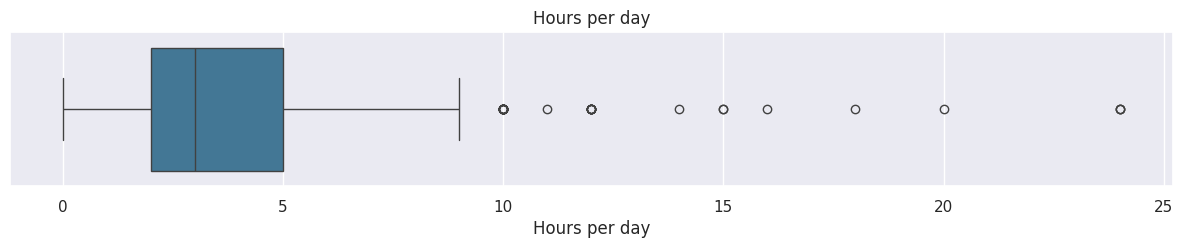


BPM Statistics:
count: 718.00, mean: 1392880.56, std: 37319663.91, min: 0.00, 25%: 105.00, 50%: 120.00, 75%: 140.00, max: 999999999.00


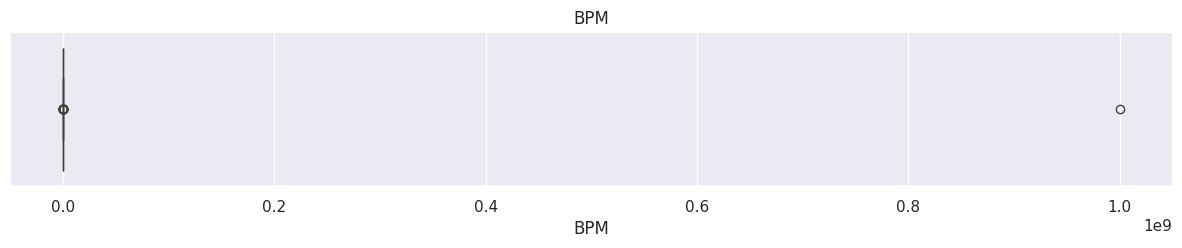


Anxiety Statistics:
count: 718.00, mean: 5.84, std: 2.78, min: 0.00, 25%: 4.00, 50%: 6.00, 75%: 8.00, max: 10.00


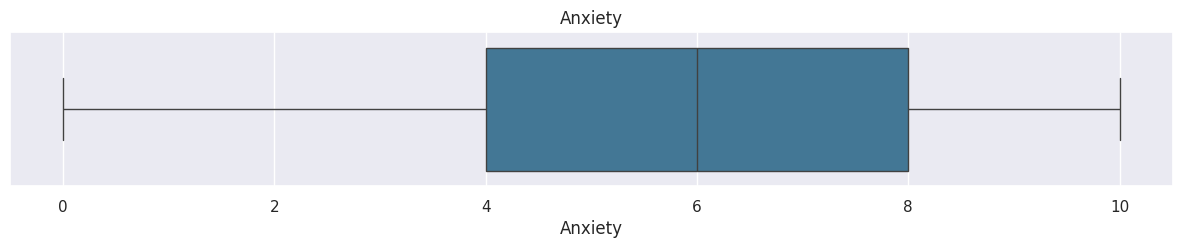


Depression Statistics:
count: 718.00, mean: 4.81, std: 3.02, min: 0.00, 25%: 2.00, 50%: 5.00, 75%: 7.00, max: 10.00


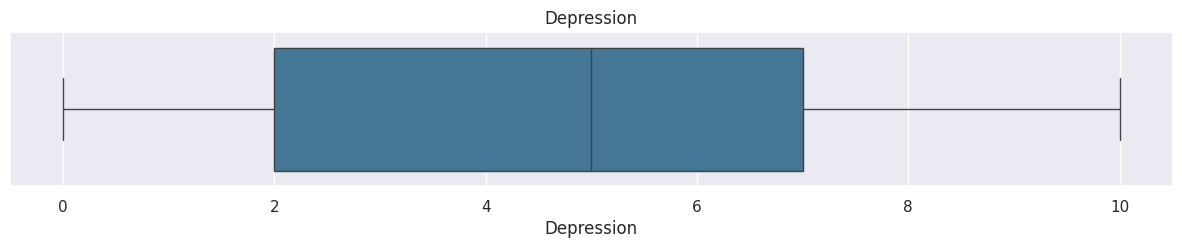


Insomnia Statistics:
count: 718.00, mean: 3.72, std: 3.08, min: 0.00, 25%: 1.00, 50%: 3.00, 75%: 6.00, max: 10.00


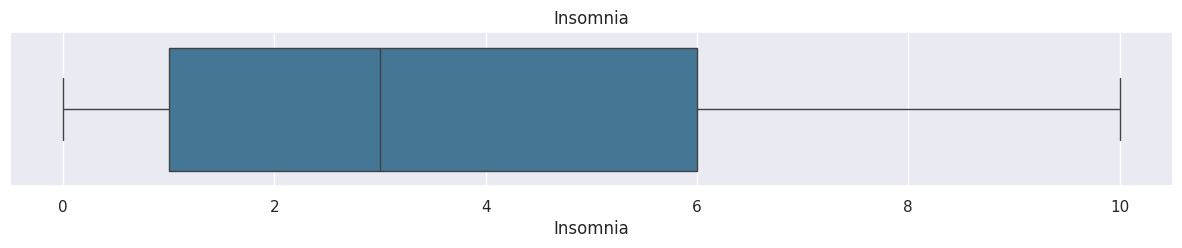


OCD Statistics:
count: 718.00, mean: 2.64, std: 2.84, min: 0.00, 25%: 0.00, 50%: 2.00, 75%: 4.00, max: 10.00


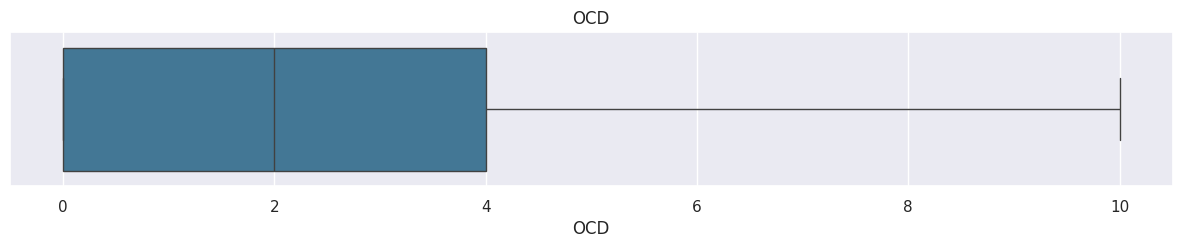

In [ ]:
palette ="mako"
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(column)
    stats = df[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

In [ ]:
feature_list = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
def StDev_method (df,n,features):
    outliers = []
    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outliers.extend(outlier_list_column)
    outliers = Counter(outliers)
    OUT= list( k for k, v in outliers.items() if v > n )
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])

    return OUT
Outliers_StDev = StDev_method(df,1,feature_list)
df_out2 = df.drop(Outliers_StDev, axis = 0).reset_index(drop=True)

Total number of outliers is: 0


In [ ]:
# Removing useless columns
dff = df.drop(['Timestamp', 'Permissions'], axis=1)

In [ ]:
# Renaming frequency columns to only the name of the musical genre
dff = (dff.rename(columns={
    'Frequency [Classical]': 'Classical',
    'Frequency [Country]': 'Country',
    'Frequency [EDM]': 'EDM',
    'Frequency [Folk]': 'Folk',
    'Frequency [Gospel]': 'Gospel',
    'Frequency [Hip hop]': 'Hip hop',
    'Frequency [Jazz]': 'Jazz',
    'Frequency [K pop]': 'K pop',
    'Frequency [Latin]': 'Latin',
    'Frequency [Lofi]': 'Lofi',
    'Frequency [Metal]': 'Metal',
    'Frequency [Pop]': 'Pop',
    'Frequency [R&B]': 'R&B',
    'Frequency [Rap]': 'Rap',
    'Frequency [Rock]': 'Rock',
    'Frequency [Video game music]': 'Games music'      }))

In [ ]:
print(f'Minimum age: {dff["Age"].min()}')
print(f'Maximum age: {dff["Age"].max()}')

Minimum age: 10.0
Maximum age: 89.0


In [ ]:
dff['Age group'] = pd.cut(dff['Age'], bins=[9, 19, 59, 70], labels=['Teenager', 'Adults', 'Seniors'])
dff['Age group'].value_counts()

Age group
Adults      402
Teenager    291
Seniors      19
Name: count, dtype: int64

In [ ]:
stream = (dff.groupby('Age group')['Primary streaming service'].agg(['value_counts']).reset_index().rename(columns={'value_counts':'quantity'}))
stream

Age group          Primary streaming service  quantity
0   Teenager                            Spotify       208
1   Teenager                      YouTube Music        28
2   Teenager                        Apple Music        22
3   Teenager            Other streaming service        17
4   Teenager  I do not use a streaming service.        15
5   Teenager                            Pandora         1
6     Adults                            Spotify       237
7     Adults                      YouTube Music        57
8     Adults  I do not use a streaming service.        49
9     Adults            Other streaming service        29
10    Adults                        Apple Music        26
11    Adults                            Pandora         4
12   Seniors                      YouTube Music         5
13   Seniors                            Pandora         4
14   Seniors            Other streaming service         3
15   Seniors                            Spotify         3
16   Seniors                        Apple Music         2
17   Seniors  I do not use a streaming service.         2

In [ ]:
Teenagers = pd.DataFrame(stream.query('`Age group` == "Teenager"'))
Adults = pd.DataFrame(stream.query('`Age group` == "Adults"'))
Seniors = pd.DataFrame(stream.query('`Age group` == "Seniors"'))

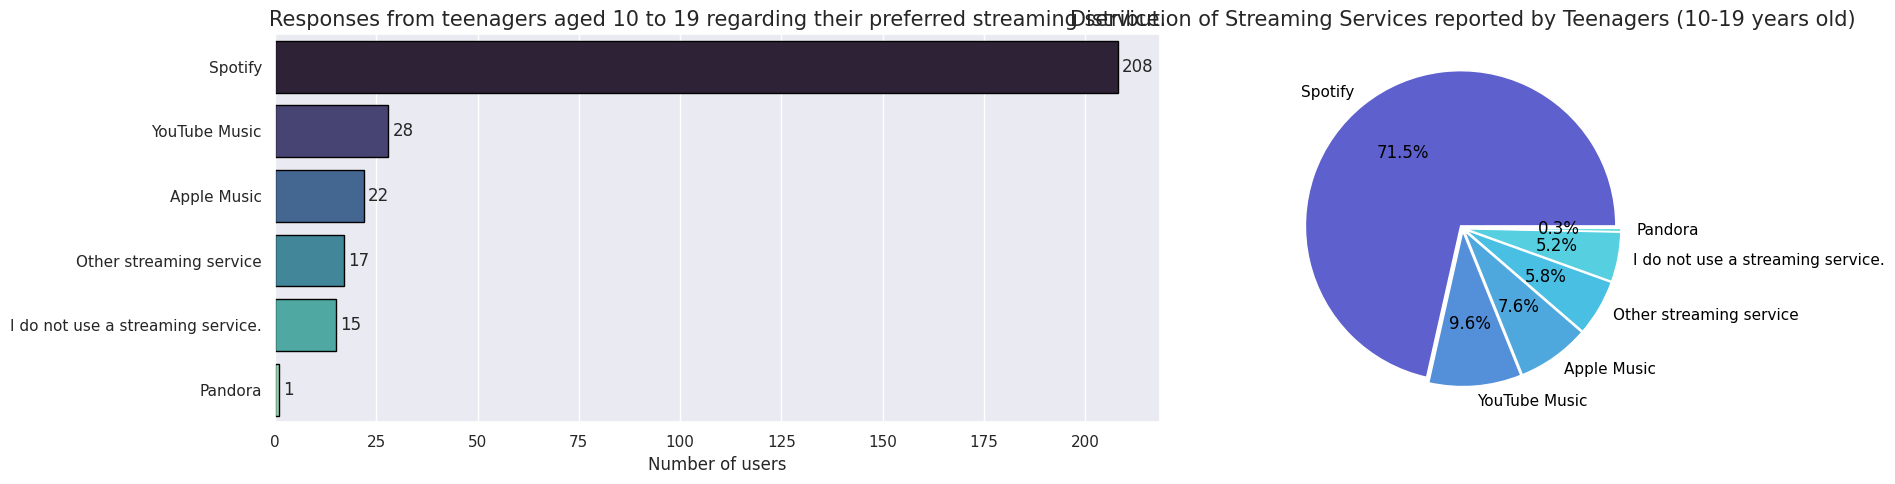

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity',
    y='Primary streaming service',
    data=Teenagers,
    edgecolor='black',
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from teenagers aged 10 to 19 regarding their preferred streaming service.', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Teenagers['quantity'].values)
services = list(Teenagers['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Teenagers (10-19 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

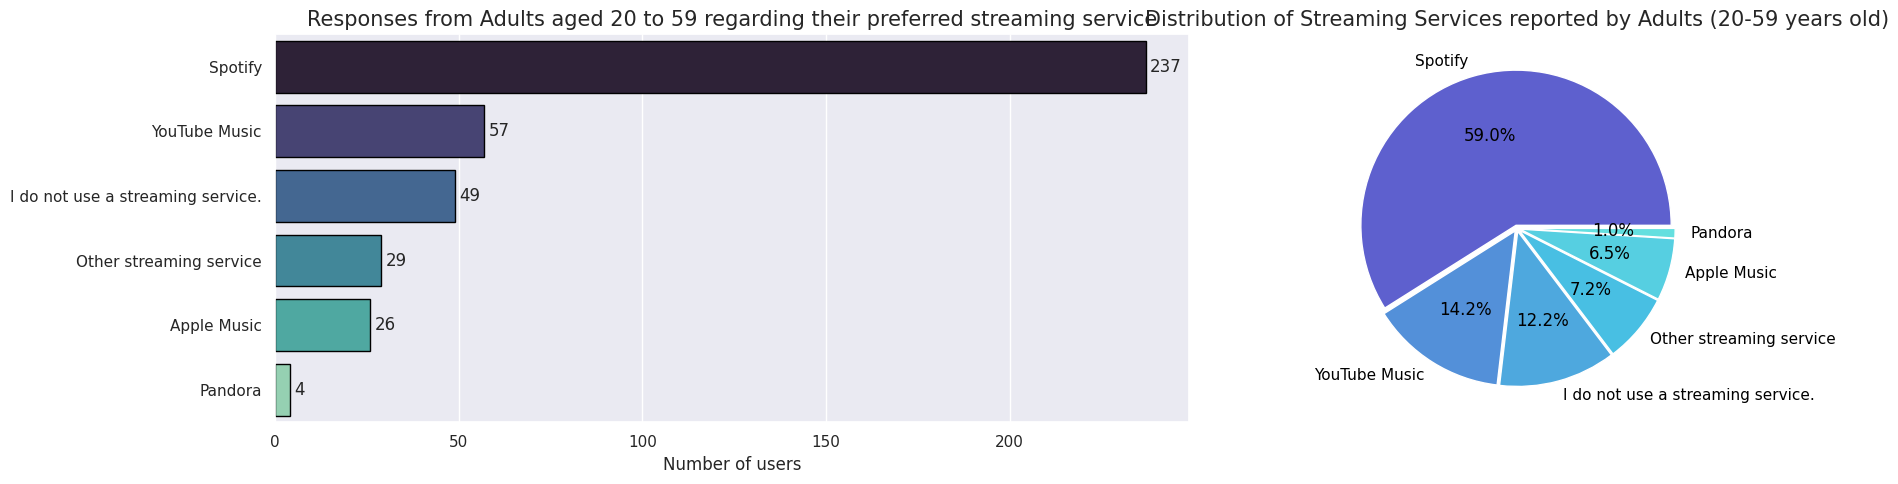

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity',
    y='Primary streaming service',
    data=Adults,
    edgecolor='black',
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from Adults aged 20 to 59 regarding their preferred streaming service', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Adults['quantity'].values)
services = list(Adults['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Adults (20-59 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

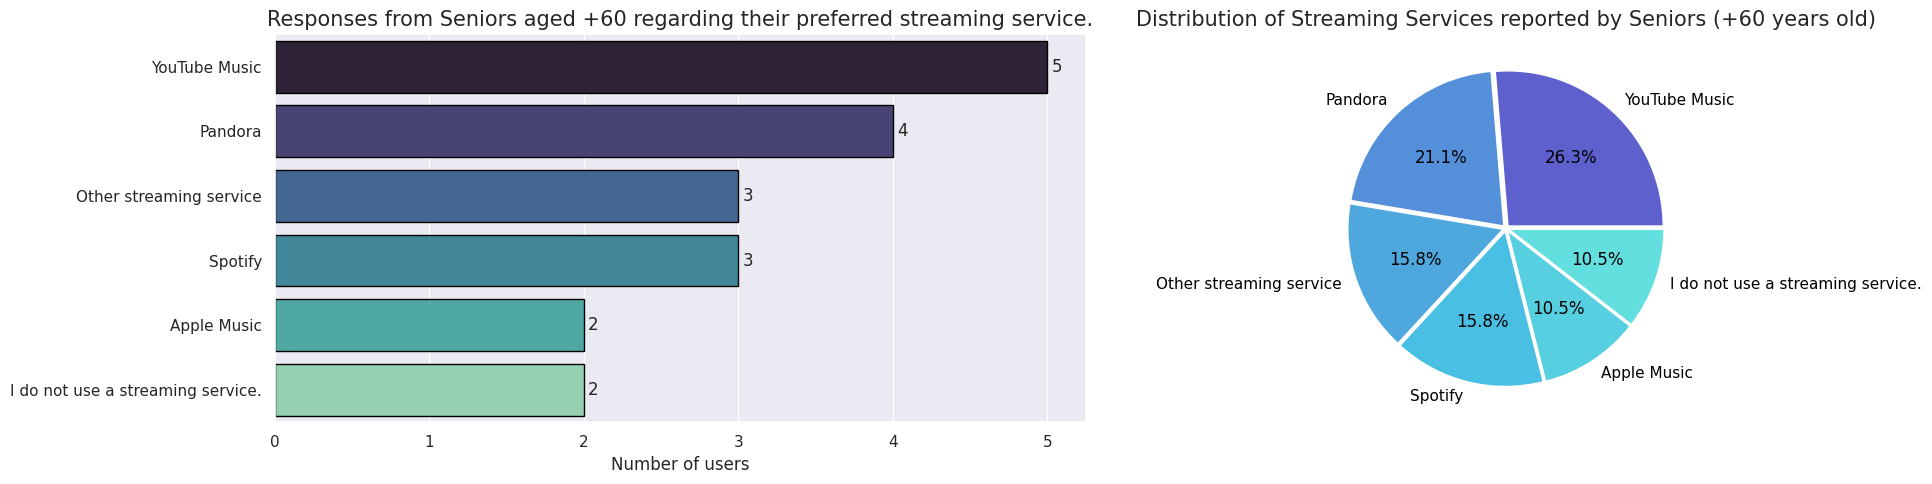

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity',
    y='Primary streaming service',
    data=Seniors,
    edgecolor='black',
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from Seniors aged +60 regarding their preferred streaming service.', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Seniors['quantity'].values)
services = list(Seniors['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Seniors (+60 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

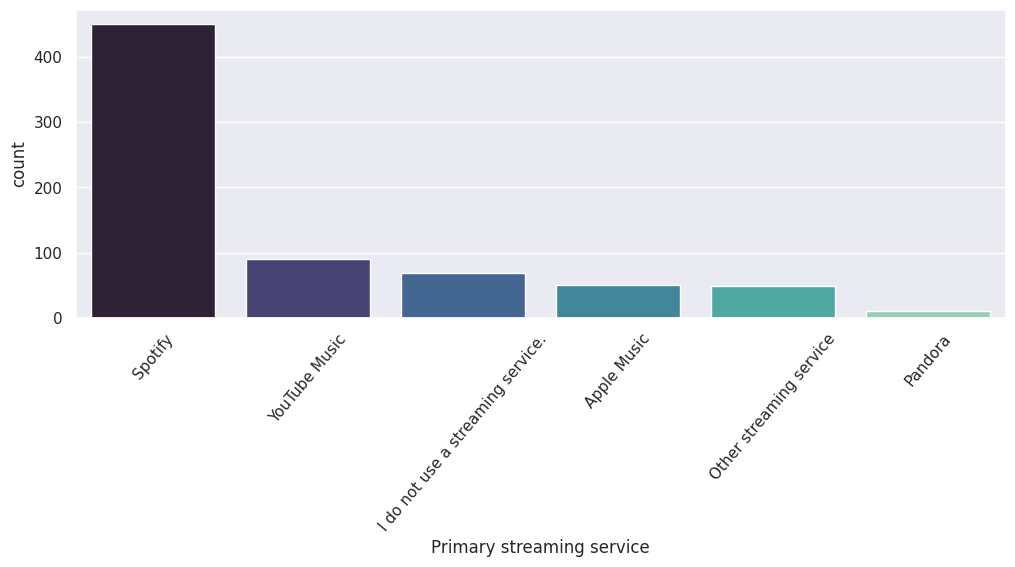

In [ ]:
ww = dff["Primary streaming service"]
plt.figure(figsize=(12, 4))
plt.xticks(rotation=50)
sns.countplot(x=ww,palette='mako')
plt.show()

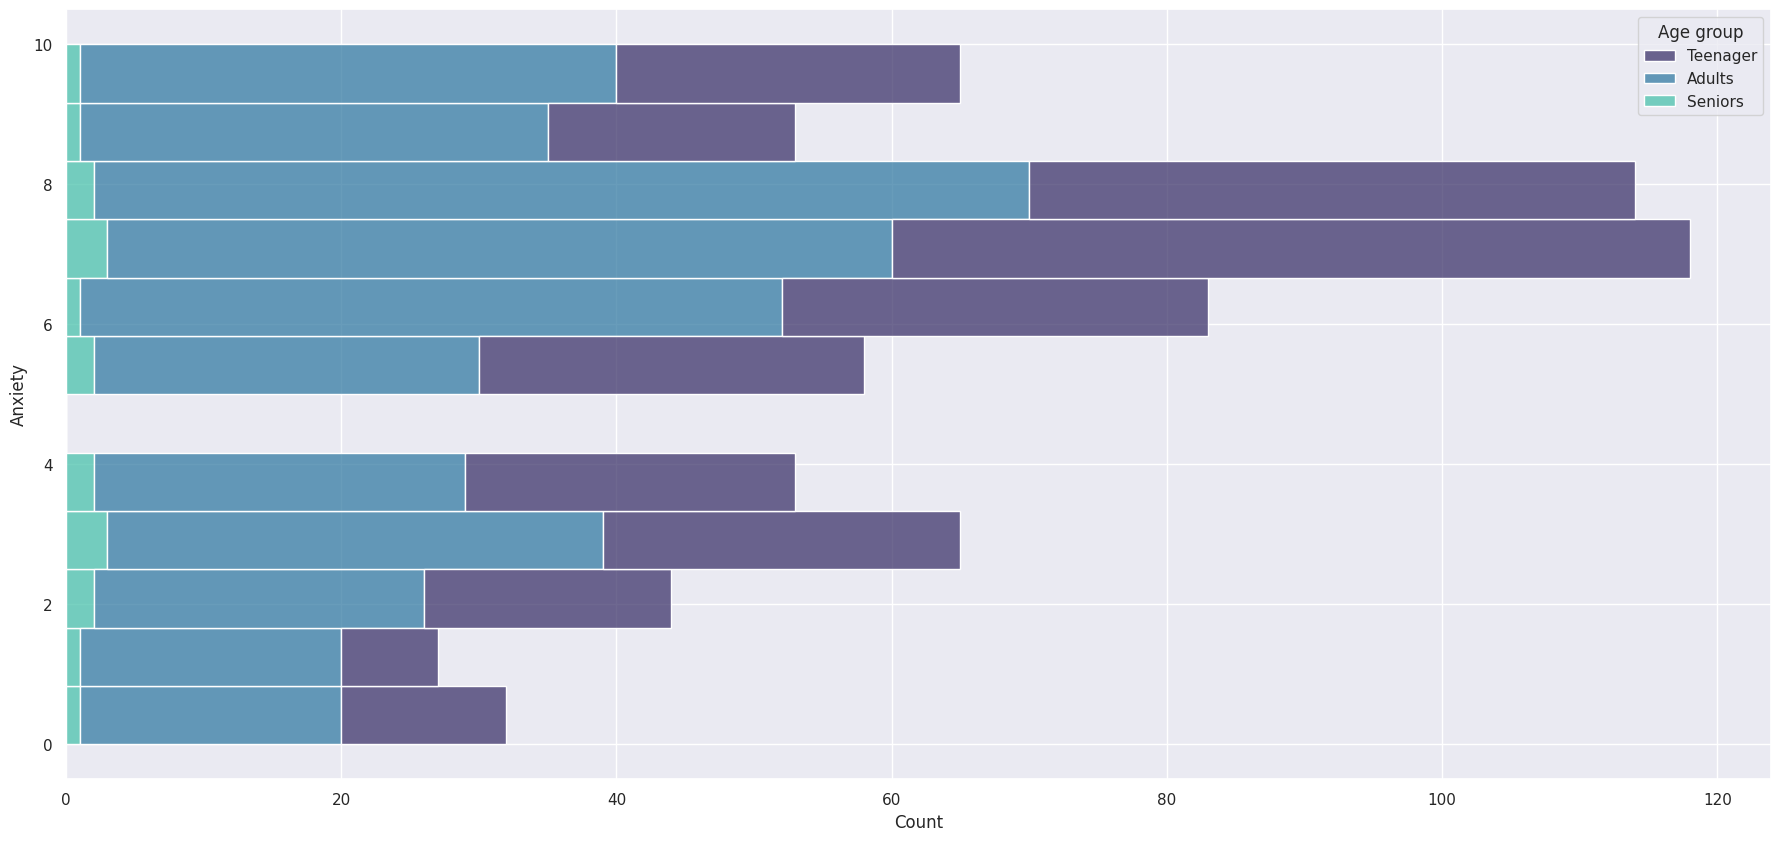

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Anxiety",palette='mako',hue="Age group", multiple="stack")
plt.show()

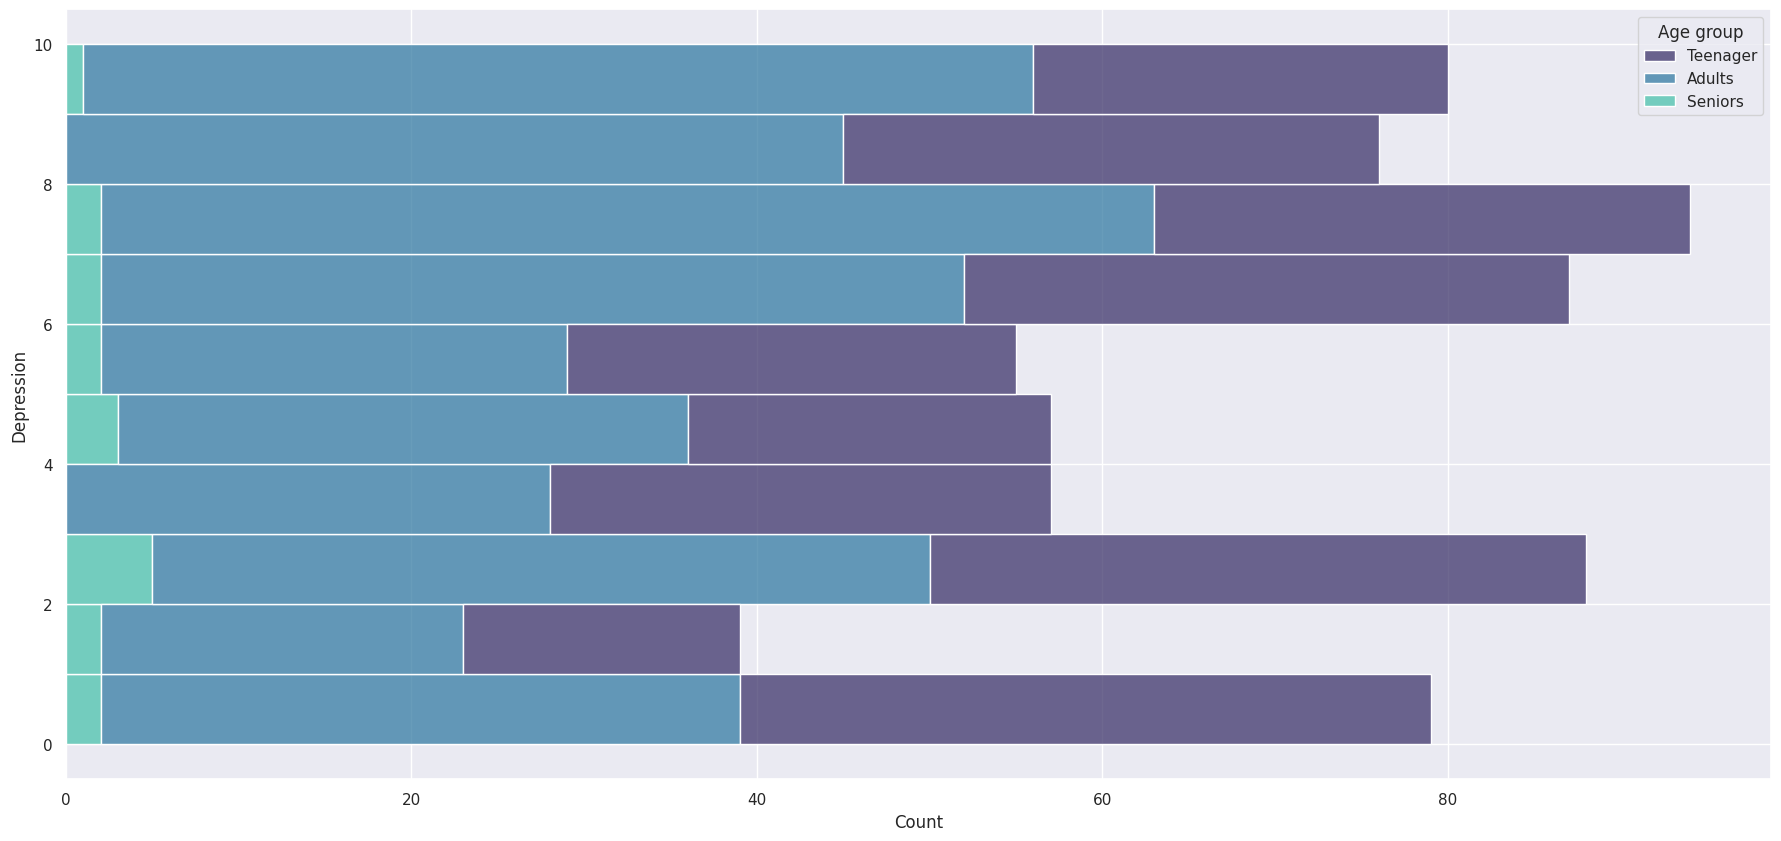

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Depression",bins=10,palette='mako',hue="Age group", multiple="stack")
plt.show()

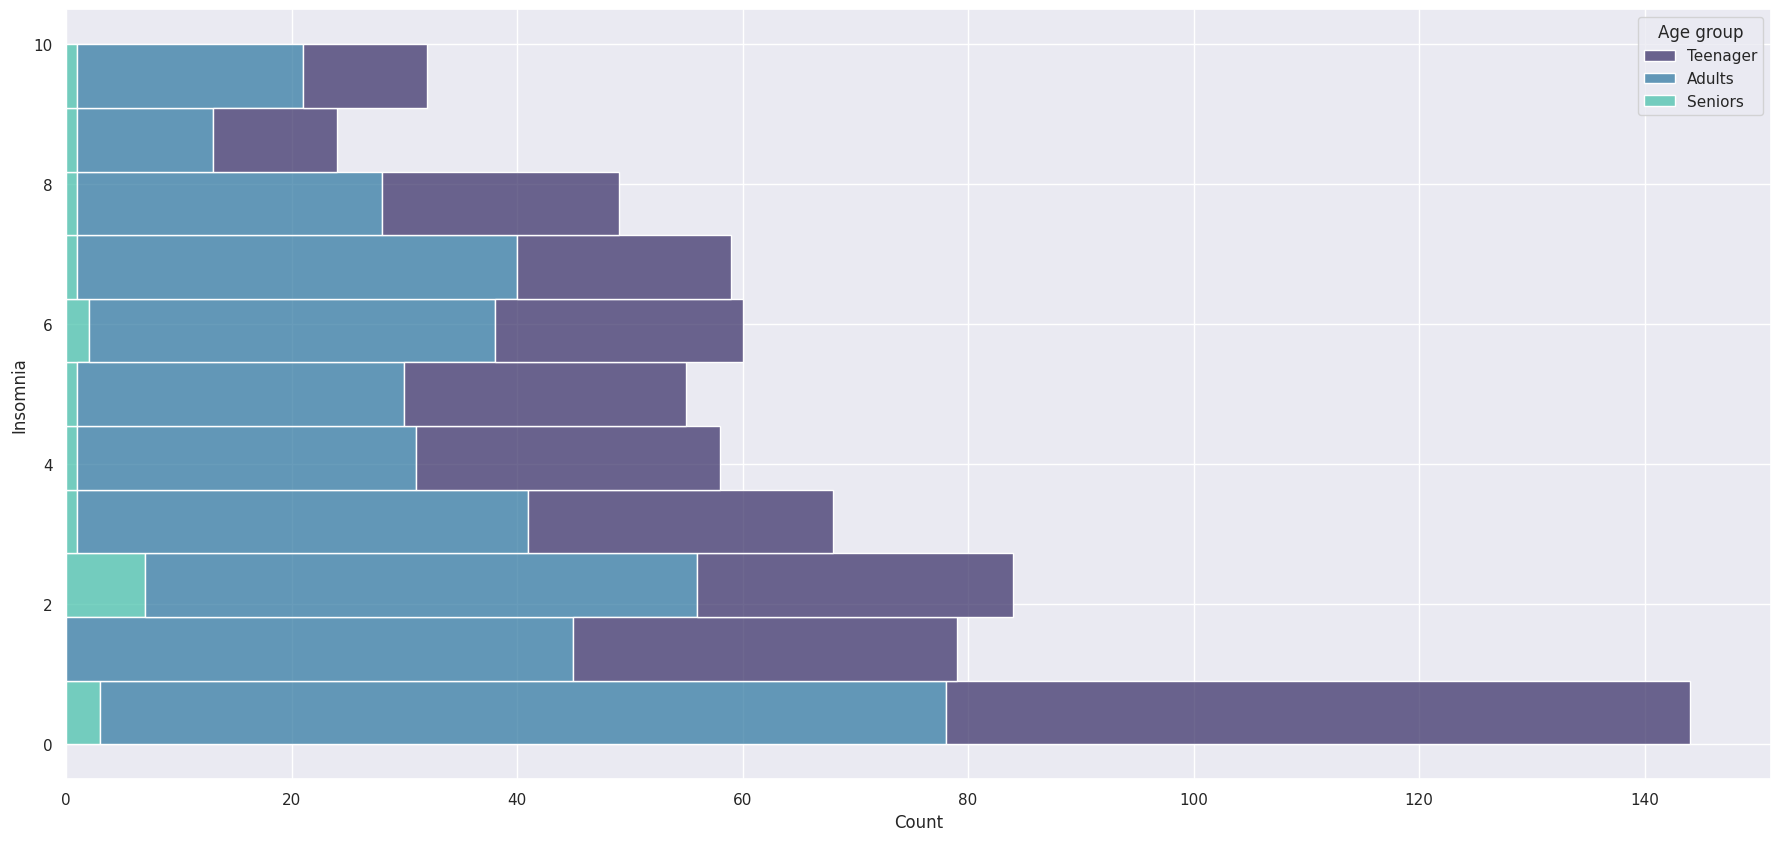

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Insomnia",palette='mako',hue="Age group", multiple="stack")
plt.show()

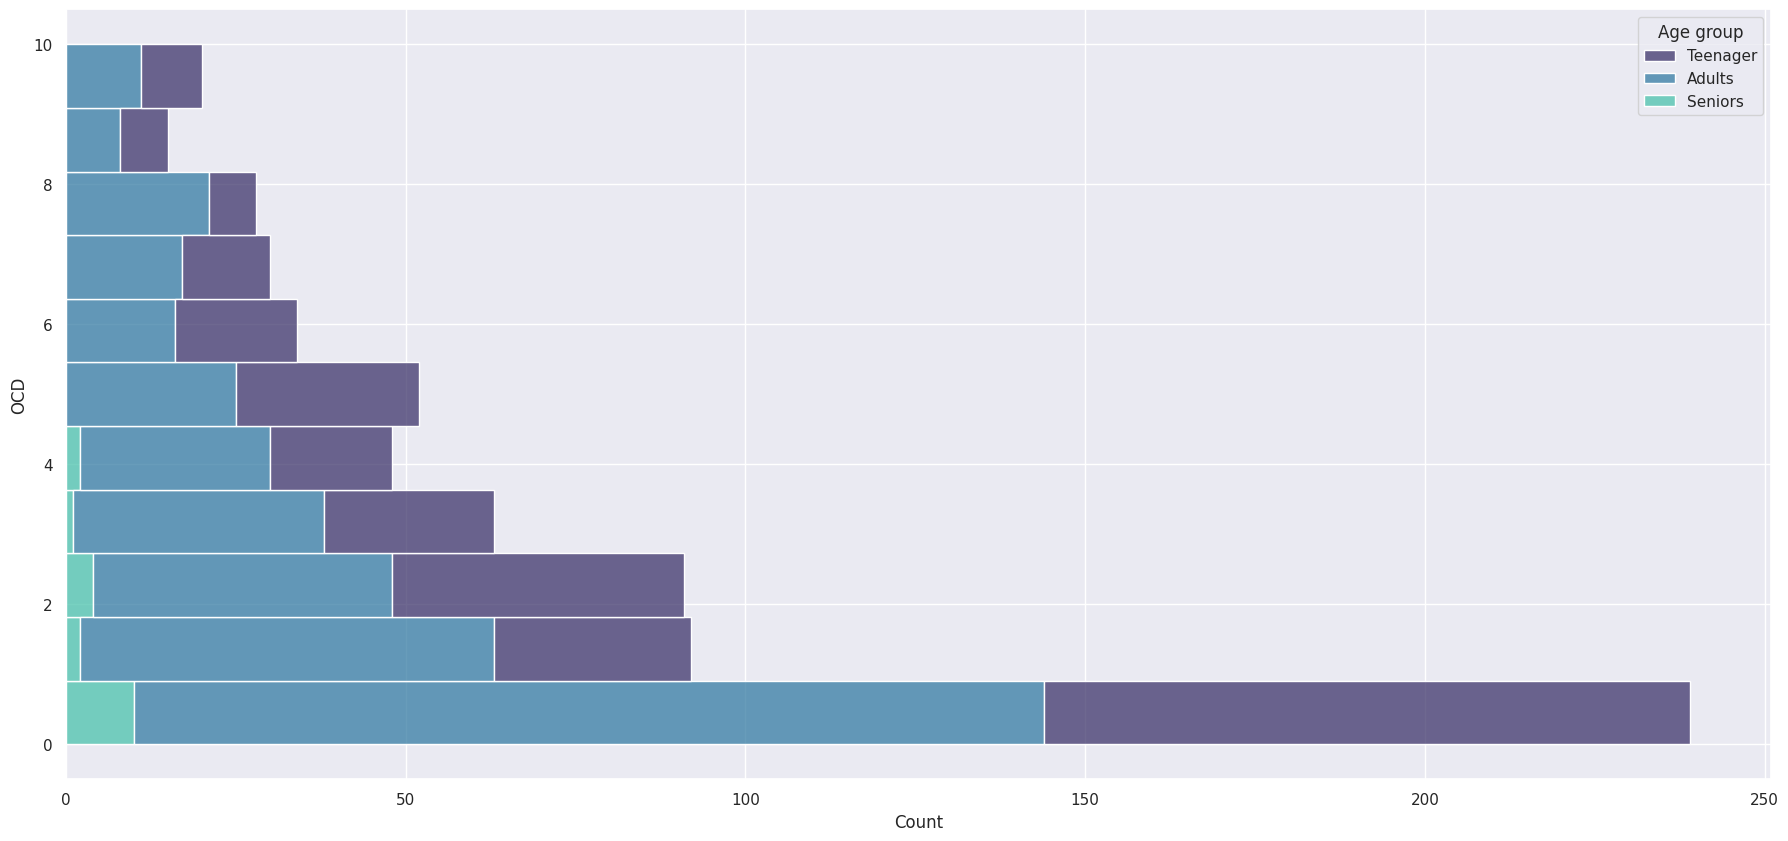

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="OCD",palette='mako',hue="Age group", multiple="stack")
plt.show()

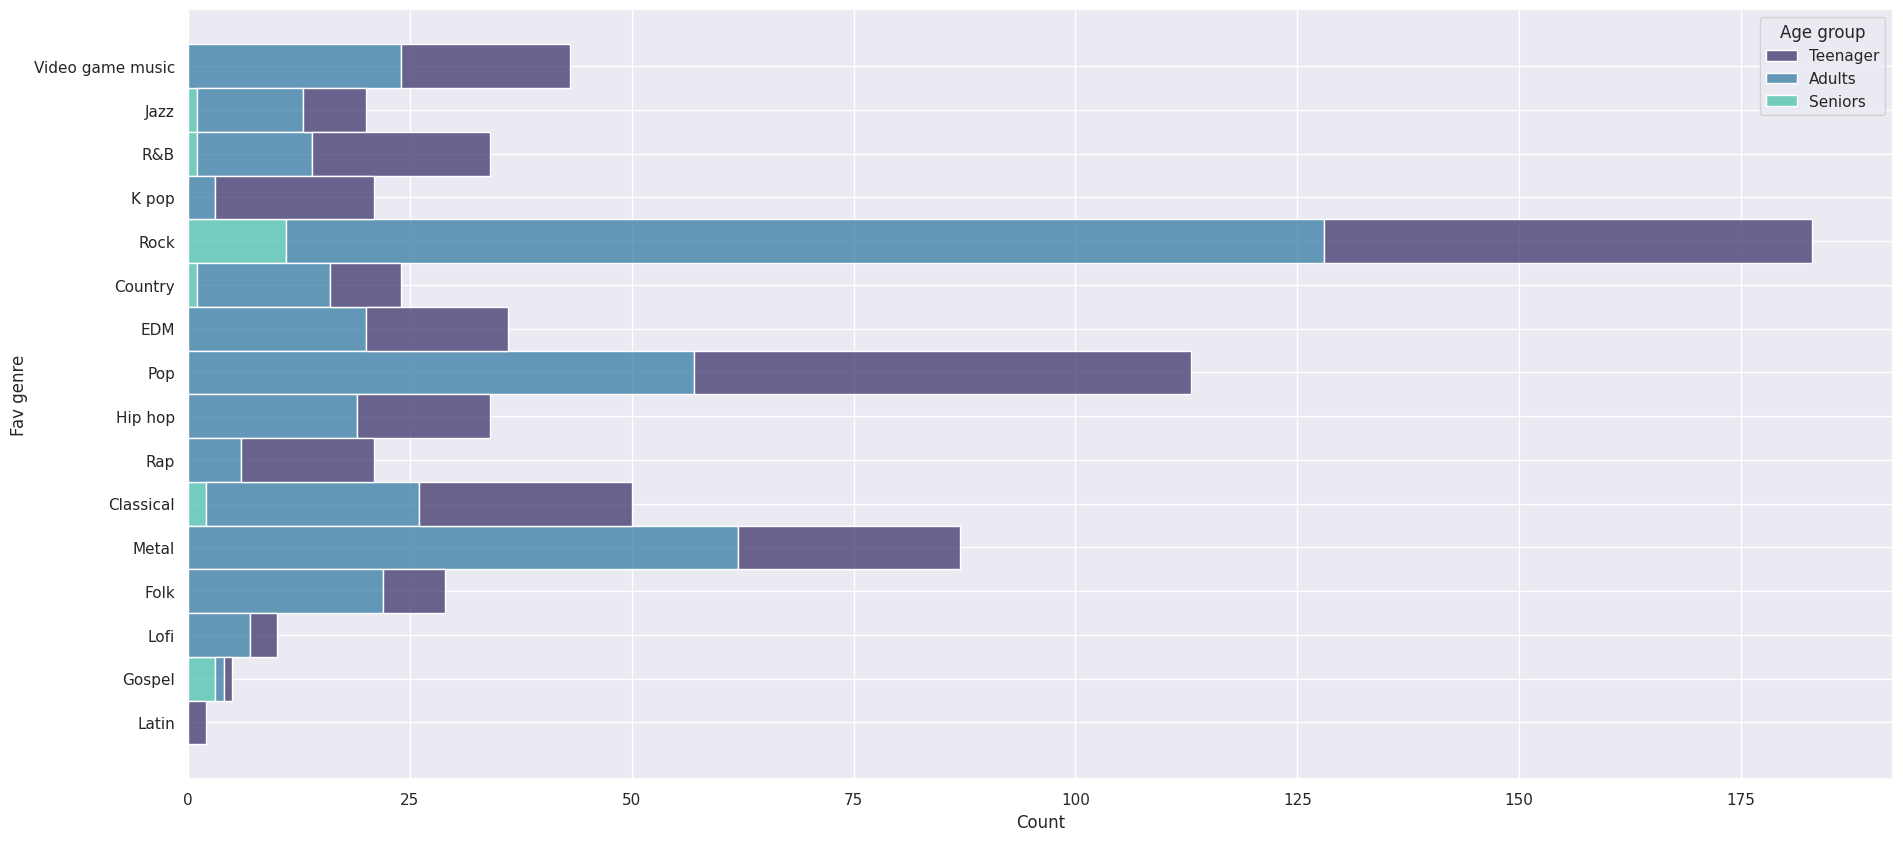

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Fav genre",palette='mako',hue="Age group", multiple="stack")
plt.show()

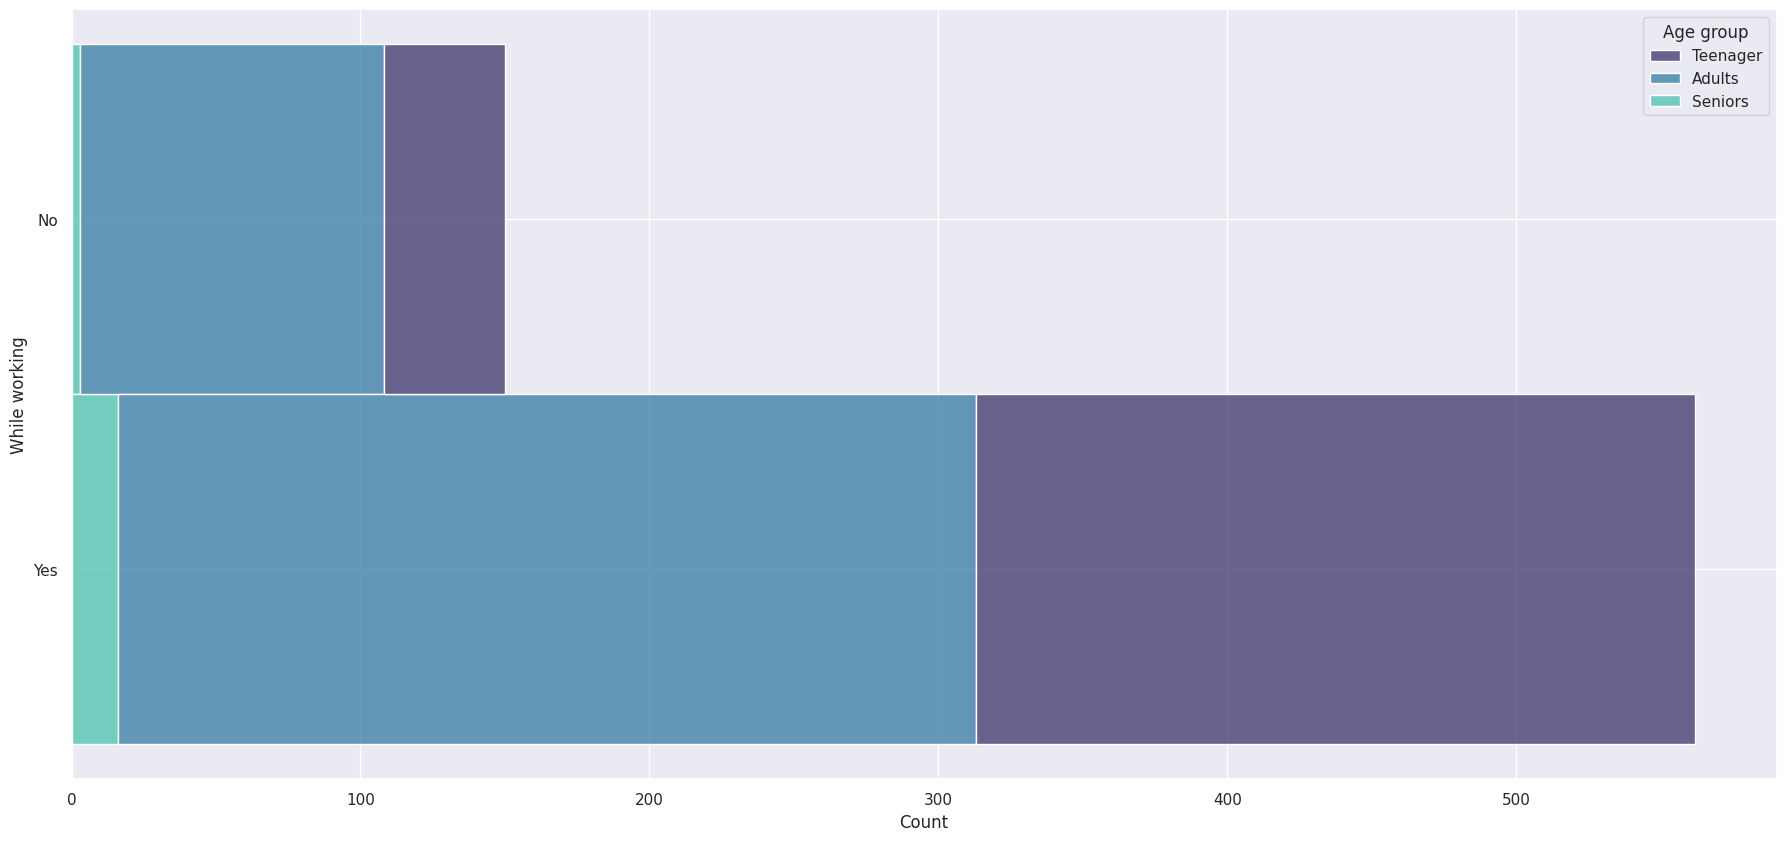

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="While working",palette='mako',hue="Age group", multiple="stack")
plt.show()

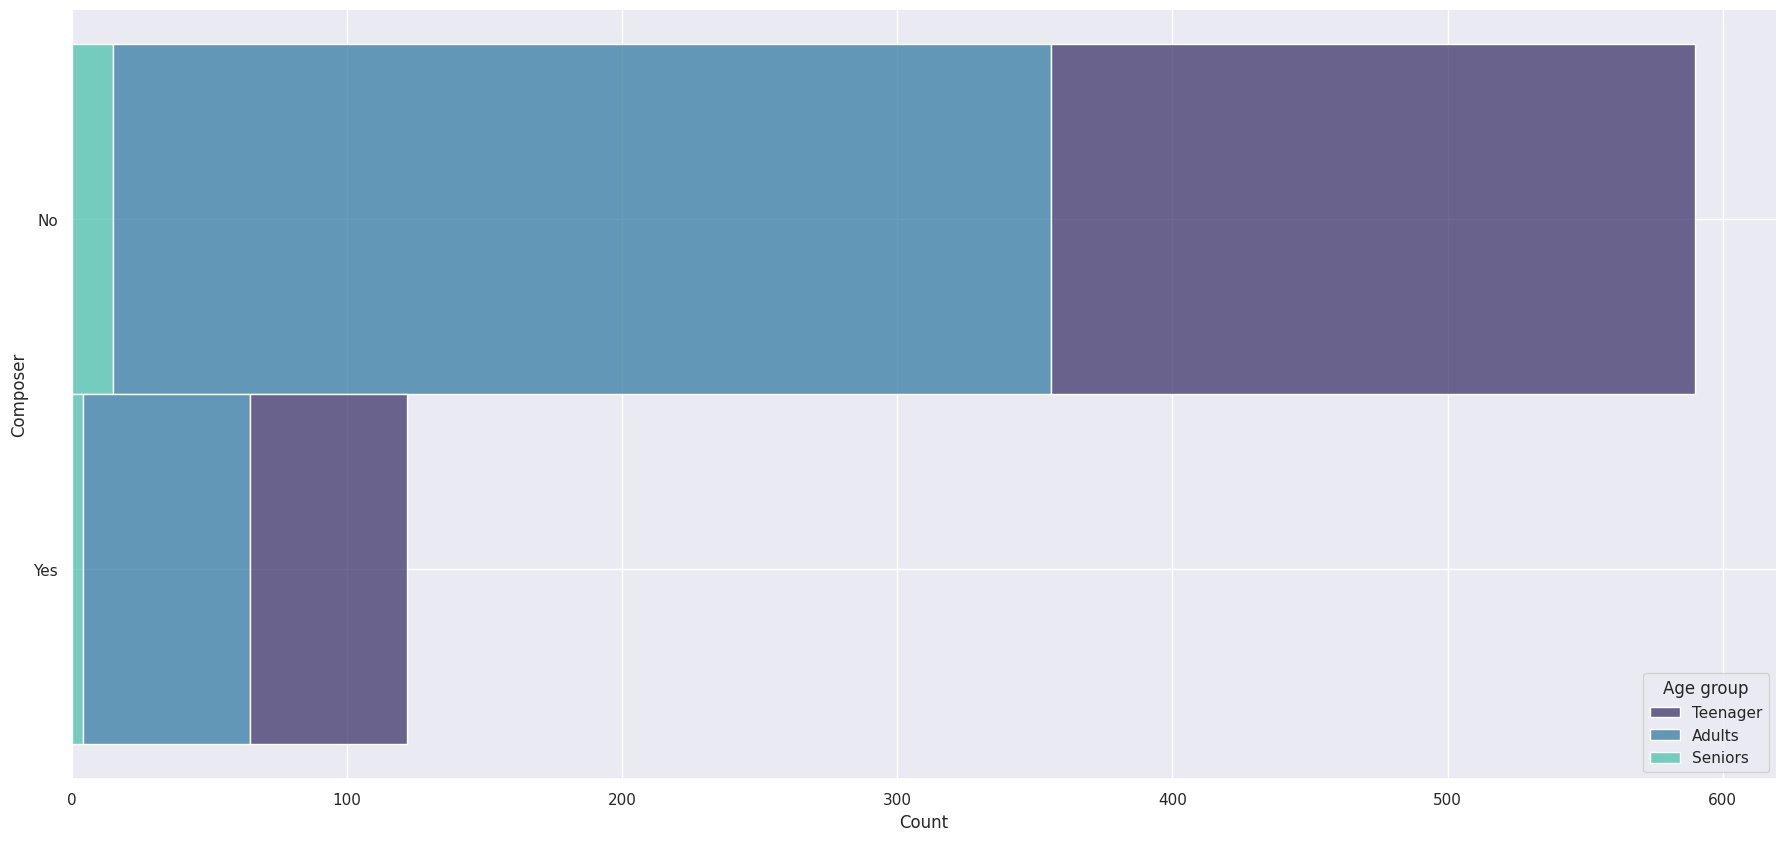

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Composer",palette='mako',hue="Age group", multiple="stack")
plt.show()

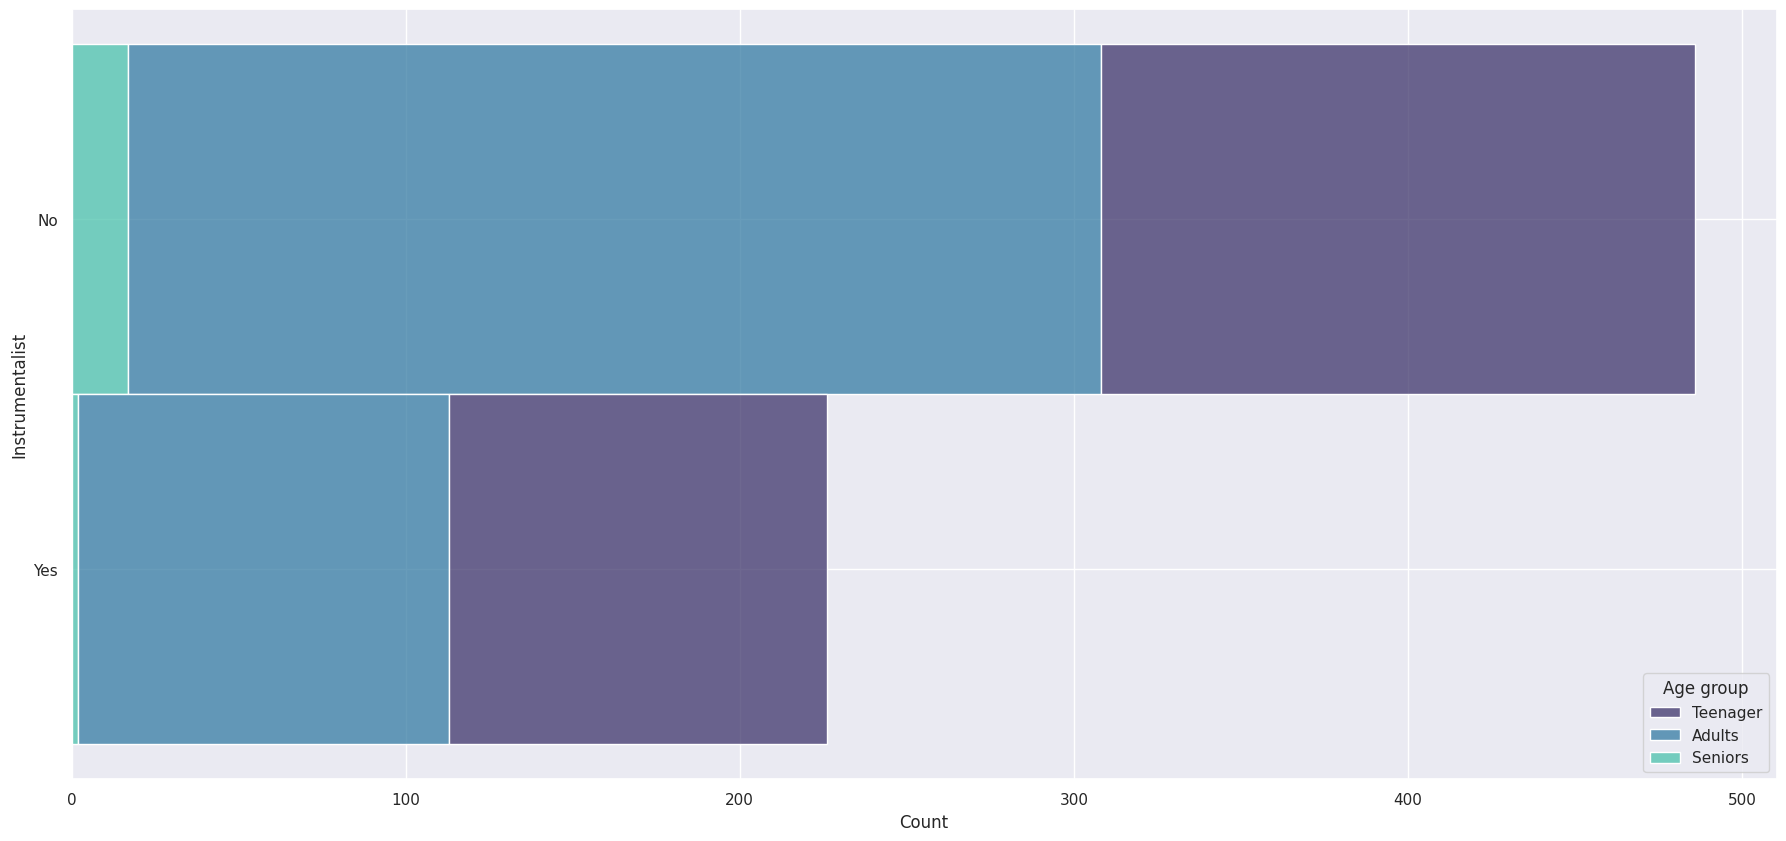

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Instrumentalist",palette='mako',hue="Age group", multiple="stack")
plt.show()

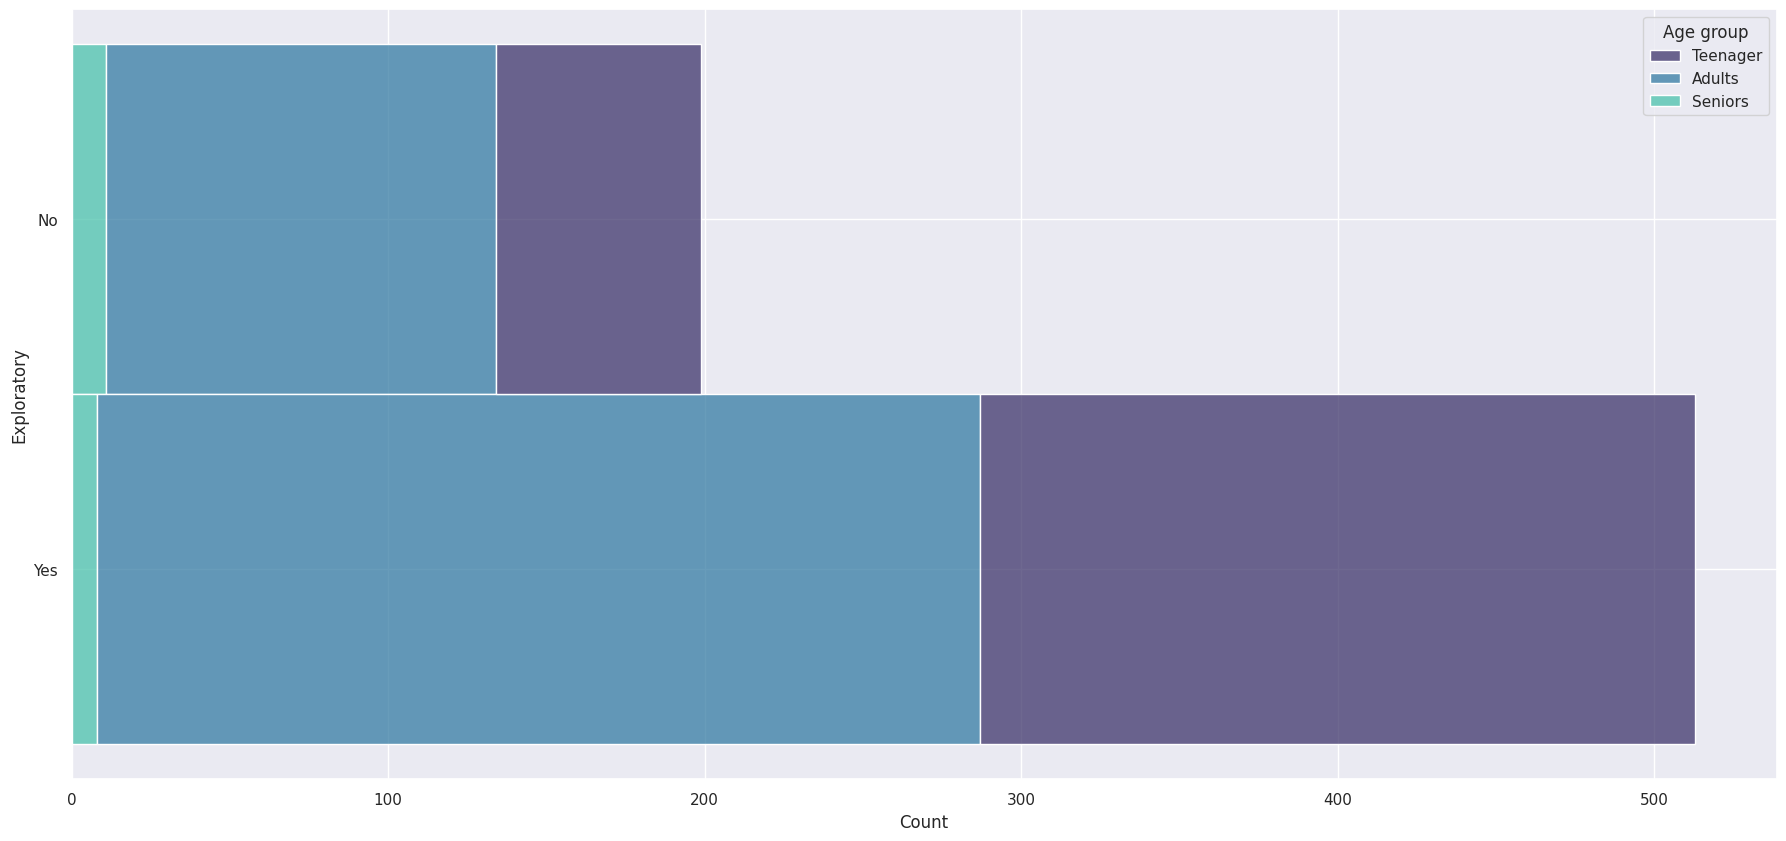

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Exploratory",palette='mako',hue="Age group", multiple="stack")
plt.show()

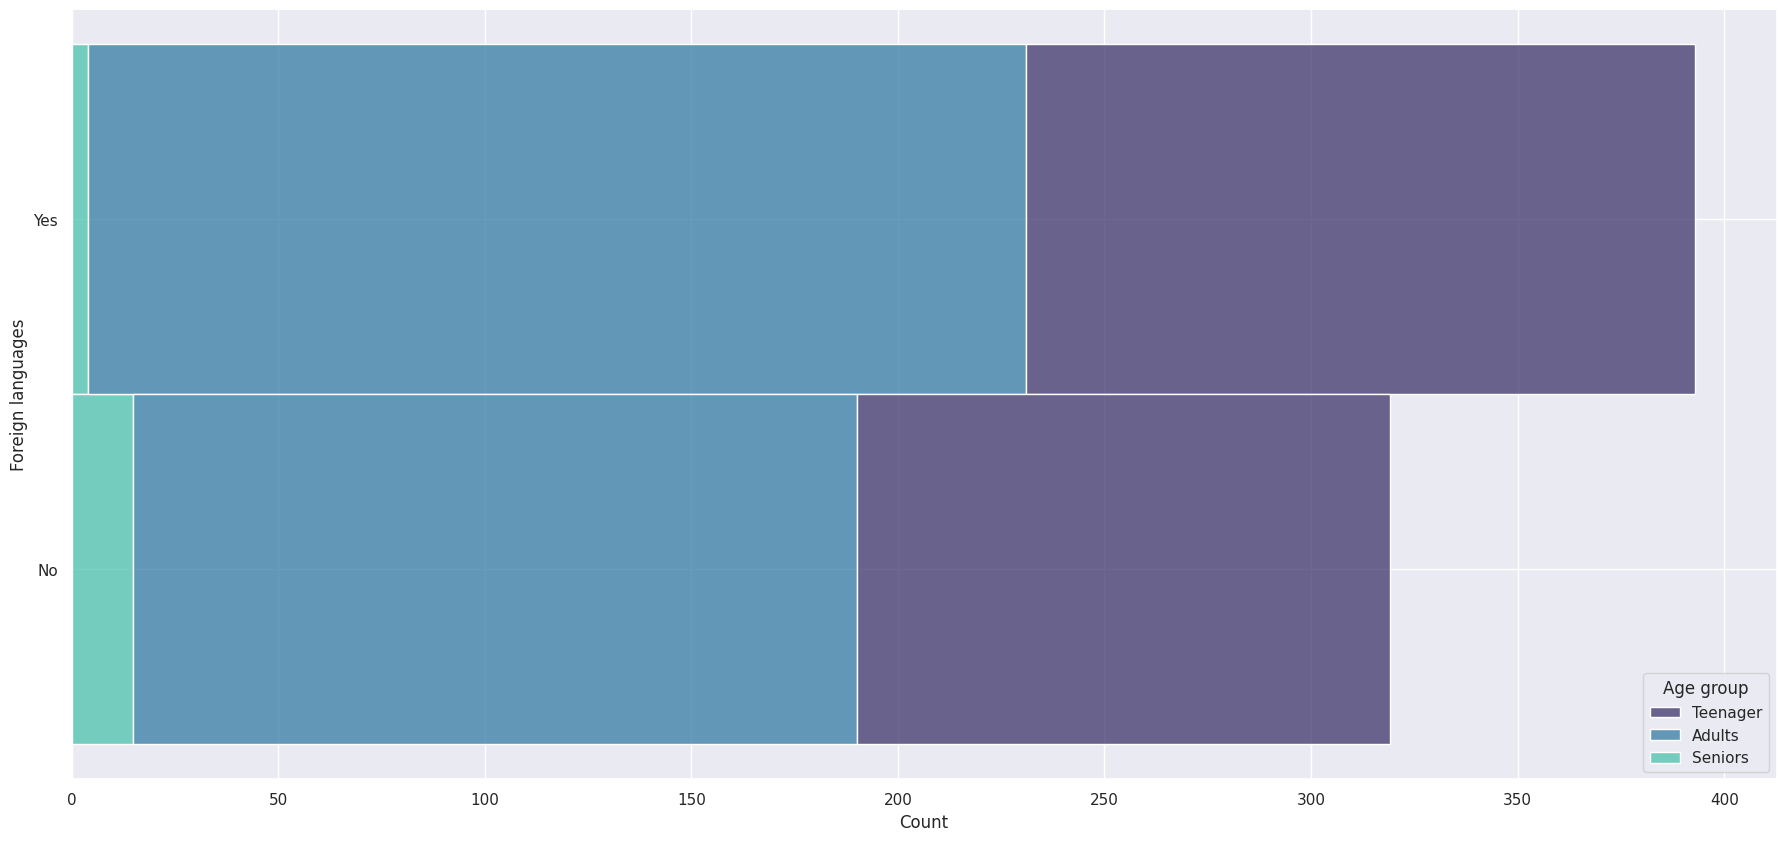

In [ ]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Foreign languages",palette='mako',hue="Age group", multiple="stack")
plt.show()

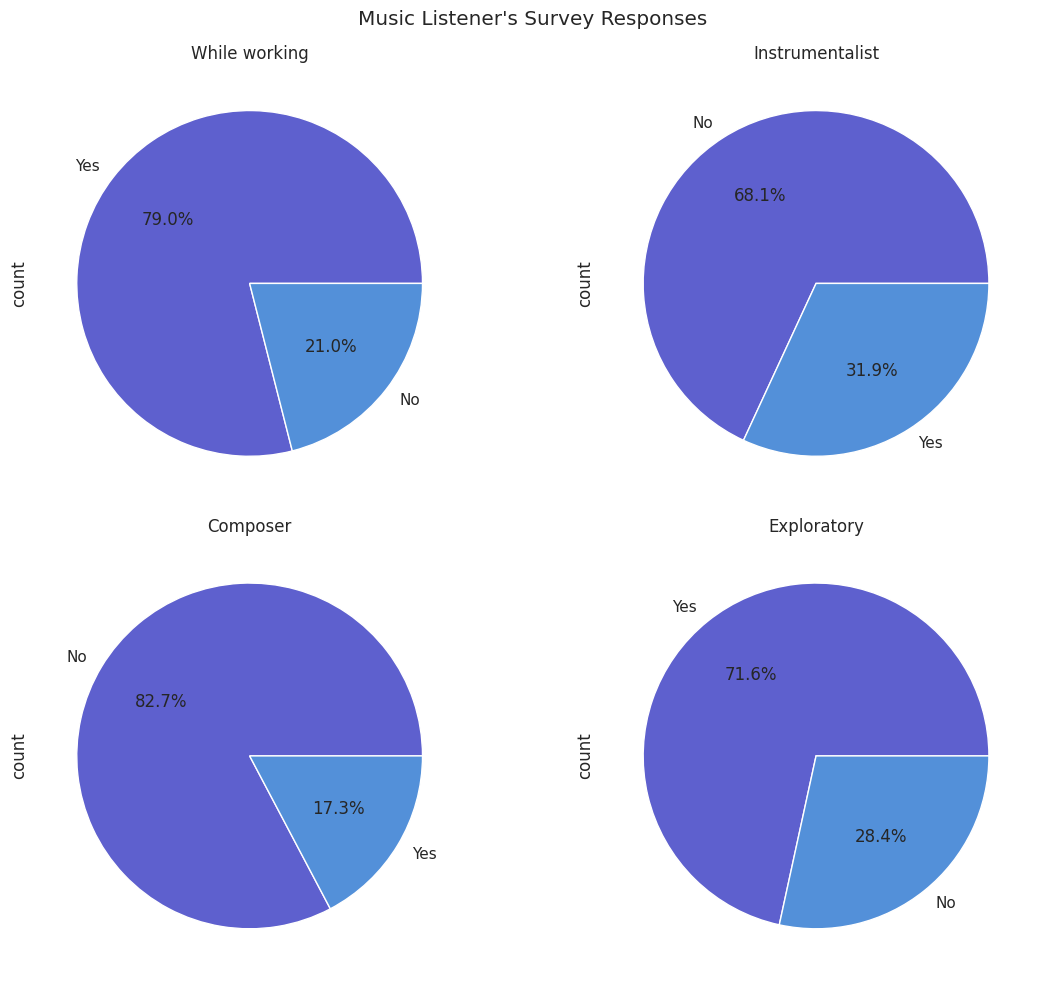

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
colors = ['#5e60ce', '#5390d9']
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0], colors=colors, title='While working')
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1], colors=colors, title='Instrumentalist')
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0], colors=colors, title='Composer')
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1], colors=colors, title='Exploratory')
plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Music Effects on Mental Health')

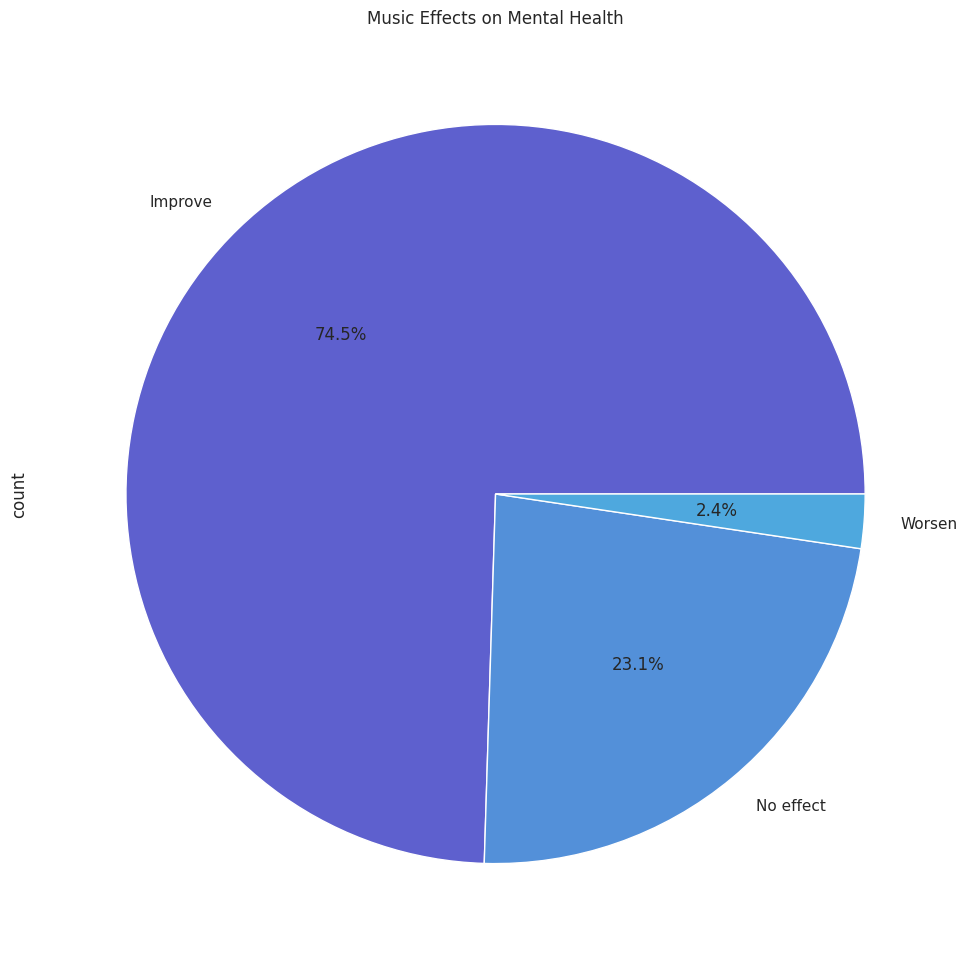

In [ ]:
colors = ['#5e60ce', '#5390d9','#4ea8de','#48bfe3']
df['Music effects'].value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.title('Music Effects on Mental Health')

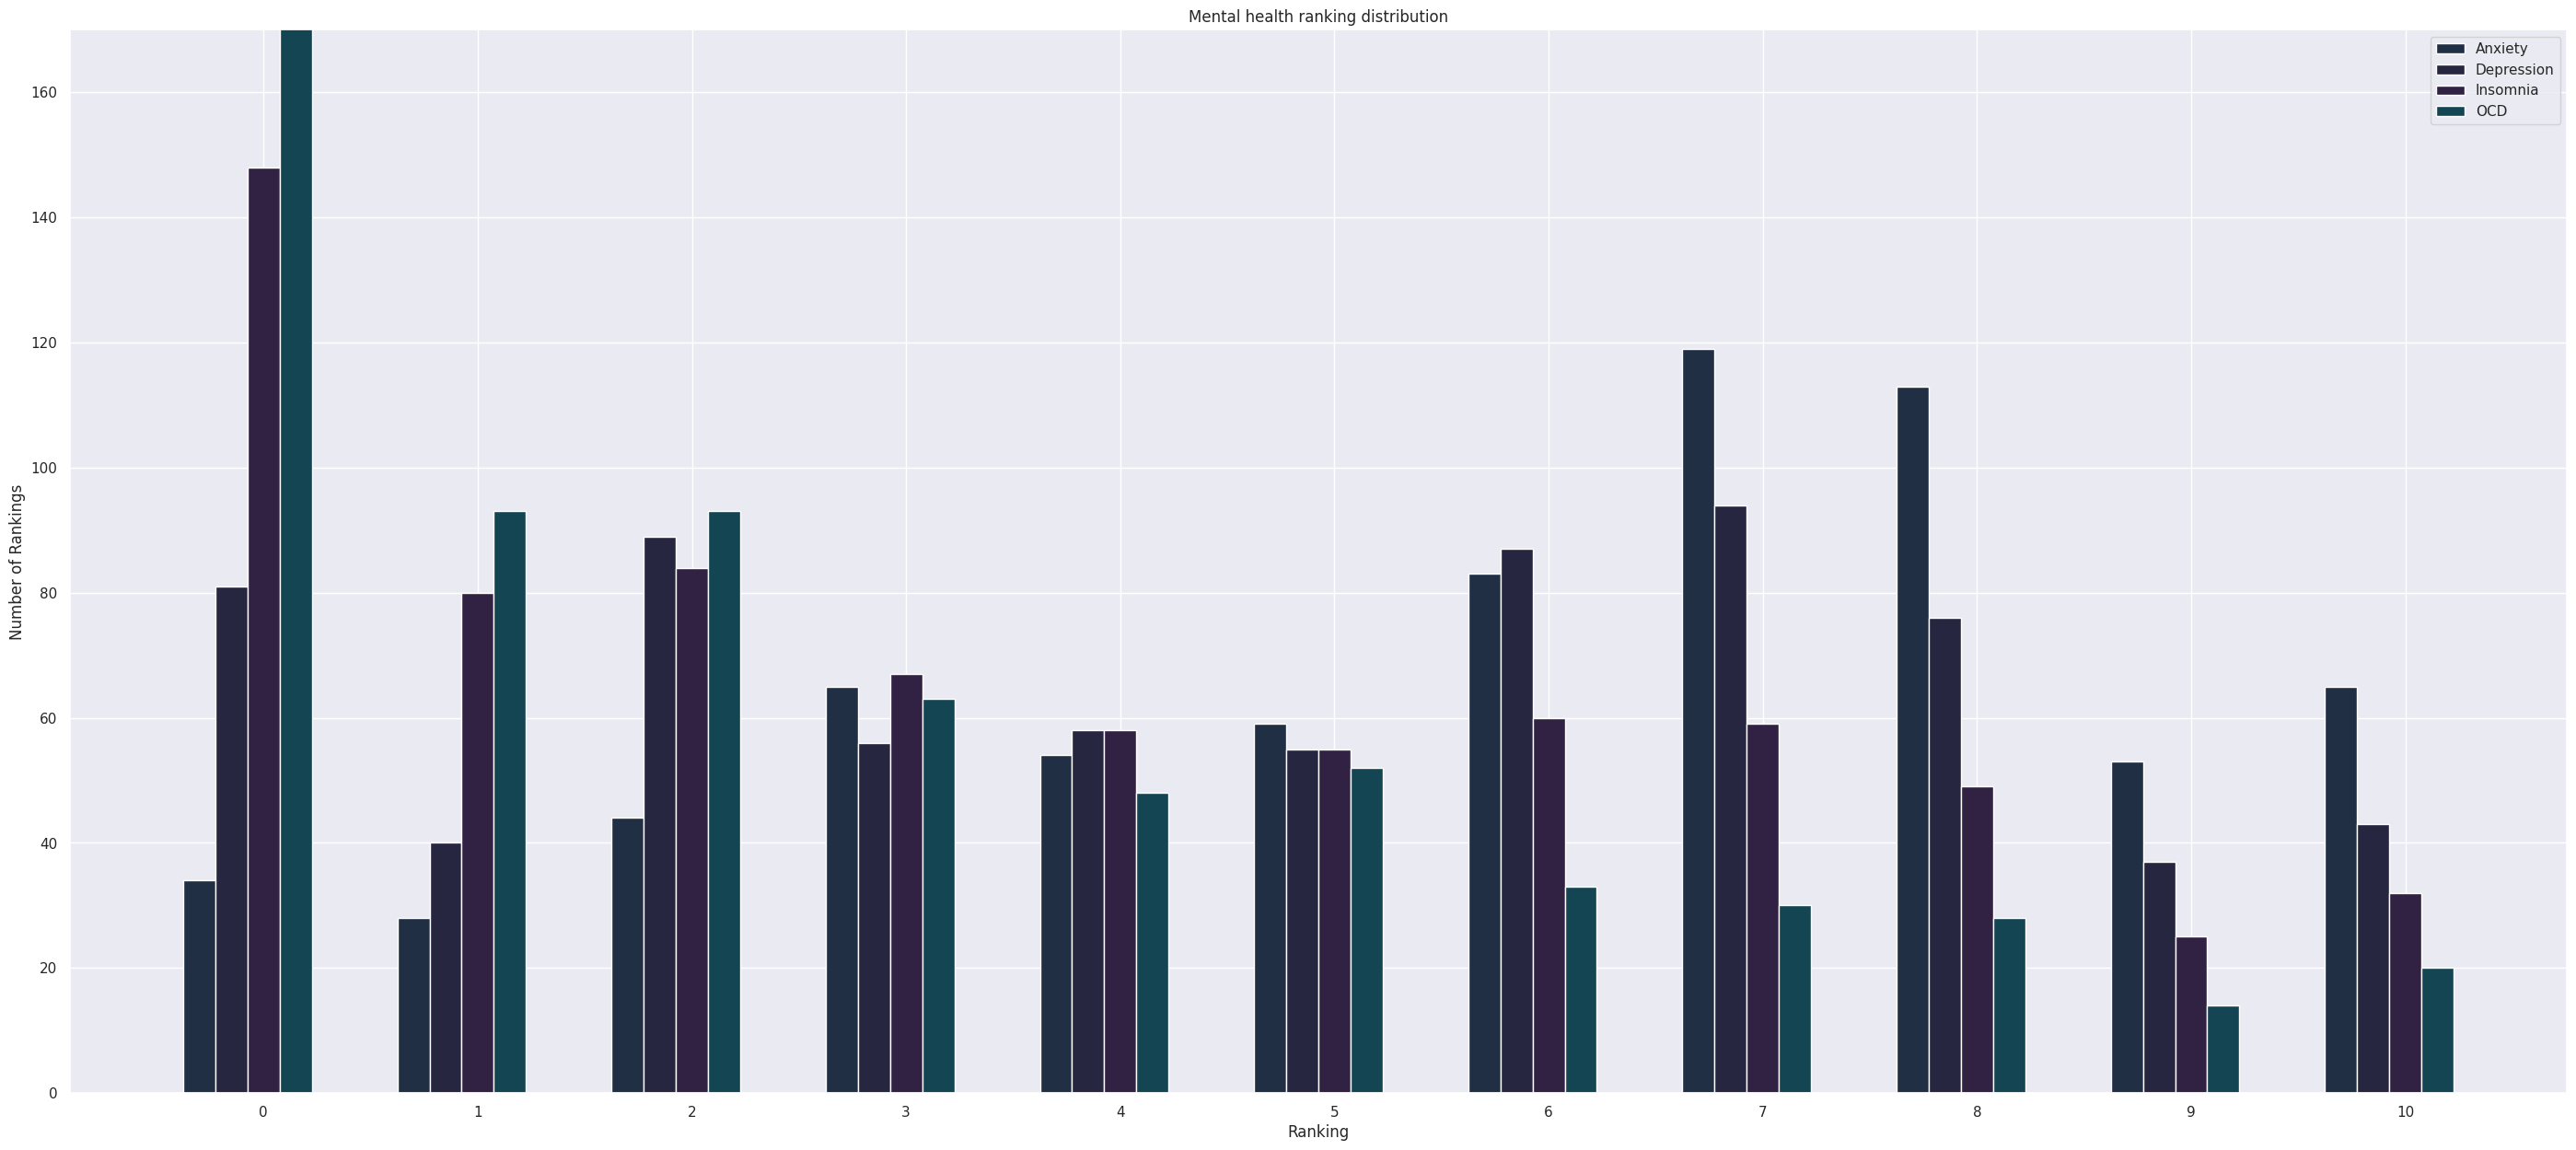

In [ ]:
mentalsss = ["Anxiety", "Depression", "Insomnia", "OCD"]
mental = df[mentalsss]
mental.round(0).astype(int)
disorder_count = []
for disorder in mentalsss:
    x=0
    while x !=11:
        count =  (mental[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots(figsize=(35, 15))
o = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = '#212F45')
oo = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = '#272640')
oo = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = '#312244')
oo = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = '#144552')
ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()
plt.show()

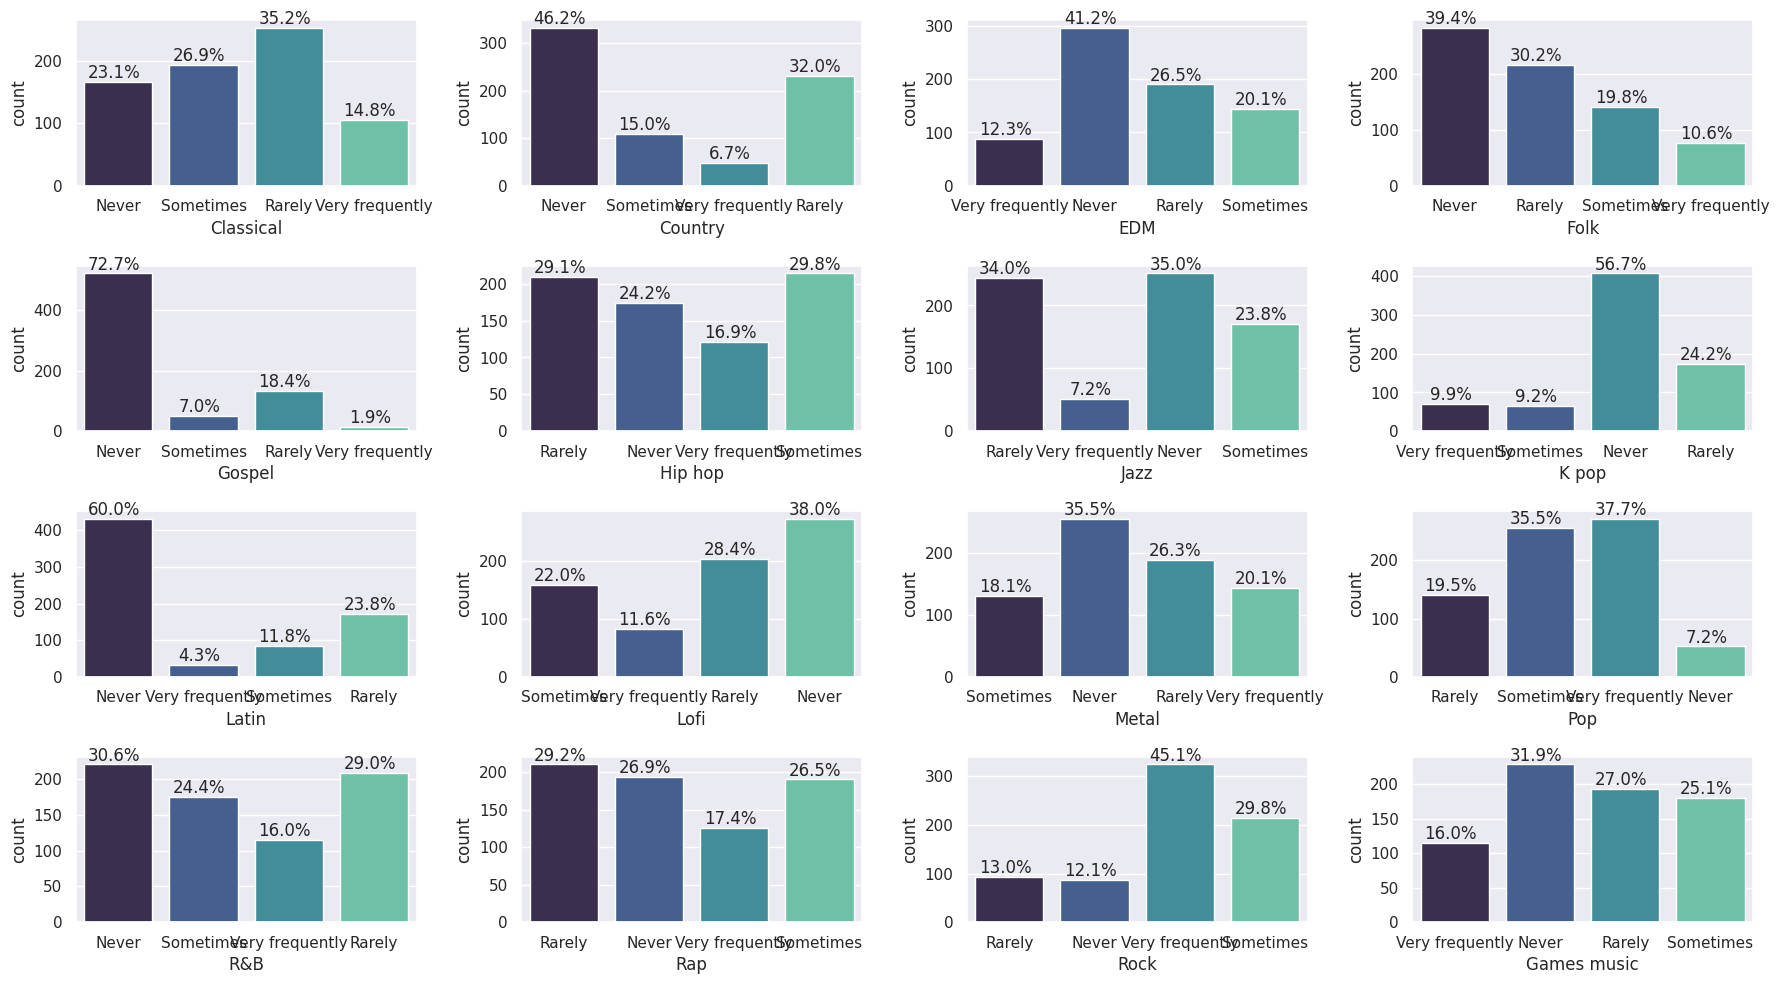

In [ ]:
figure, axes = plt.subplots(4, 4, figsize=(18, 10))
genres = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Games music']
palette = 'mako'
for i, genre in enumerate(genres):
    row = i // 4
    col = i % 4
    ax = sns.countplot(ax=axes[row, col], x=dff[genre], palette=palette)
    total = len(dff[genre])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

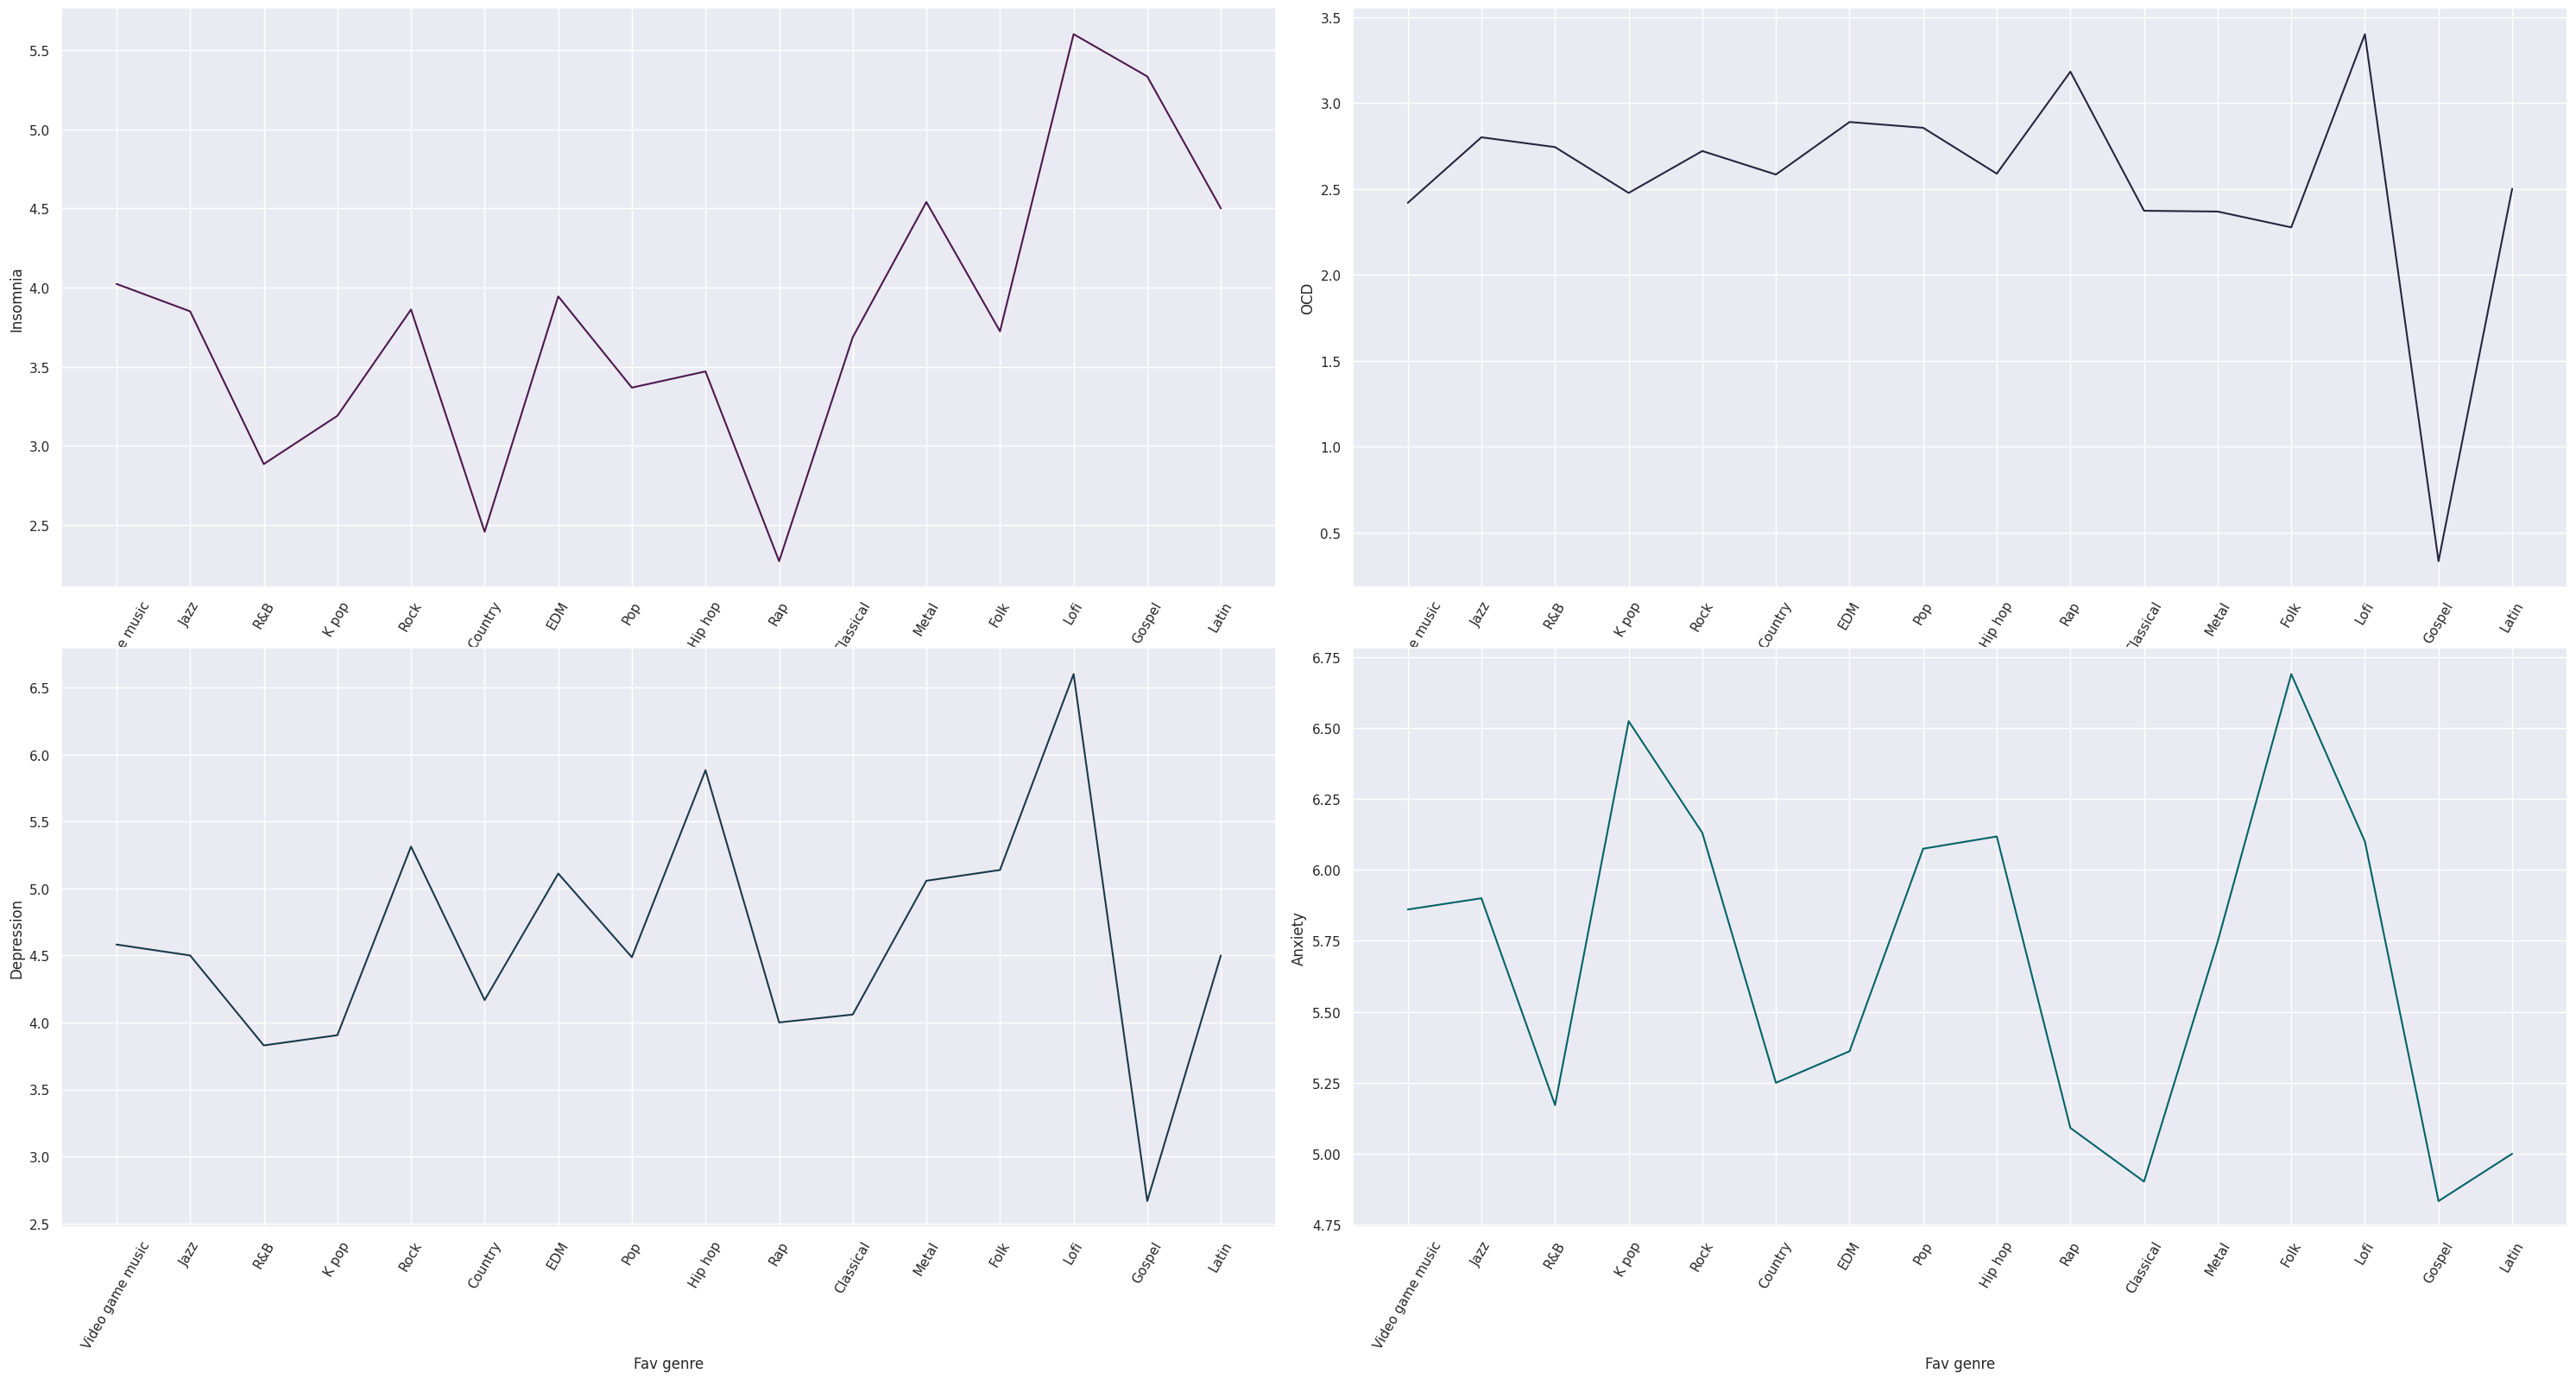

In [ ]:
figure,axes=plt.subplots(2,2,figsize=(30,15))
sns.lineplot(ax=axes[0,0],x=dff['Fav genre'],y=dff['Insomnia'],ci=None,color='#4D194D')
sns.lineplot(ax=axes[0,1],x=dff['Fav genre'],y=dff['OCD'],ci=None,color='#272640')
sns.lineplot(ax=axes[1,0],x=dff['Fav genre'],y=dff['Depression'],ci=None,color='#1B3A4B')
sns.lineplot(ax=axes[1,1],x=dff['Fav genre'],y=dff['Anxiety'],ci=None,color='#006466')
plt.tight_layout()
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [ ]:
colors = ['#006466', '#065A60', '#0B525B', '#144552','#1B3A4B', '#212F45', '#272640', '#312244','#3E1F47', '#4D194D']
fig = px.pie(dff, names='Fav genre', title='Genre Preferences',color_discrete_sequence=colors)
fig.show()

In [ ]:
colors = ['#312244', '#212F45', '#144552', '#006466']
fig = px.sunburst(dff, path=["Fav genre"], values="Hours per day", color="Music effects",color_discrete_sequence=colors)
total = dff["Hours per day"].sum()
fig.update_traces(textinfo="label+percent entry")
fig.update_layout(
    title="Top Fav Genre VS Hours per day",
    title_font={"size": 20},
    margin=dict(t=50, b=50, l=0, r=0))
fig.update_layout(width=1000, height=800)
fig.show()

In [ ]:
percentages = dff['Fav genre'].value_counts(normalize=True) * 100
print(percentages)

Fav genre
Rock                25.626741
Pop                 15.877437
Metal               12.116992
Classical            7.103064
Video game music     5.988858
EDM                  5.013928
R&B                  4.874652
Hip hop              4.735376
Folk                 4.038997
Country              3.342618
Rap                  3.064067
K pop                2.924791
Jazz                 2.785515
Lofi                 1.392758
Gospel               0.835655
Latin                0.278552
Name: proportion, dtype: float64


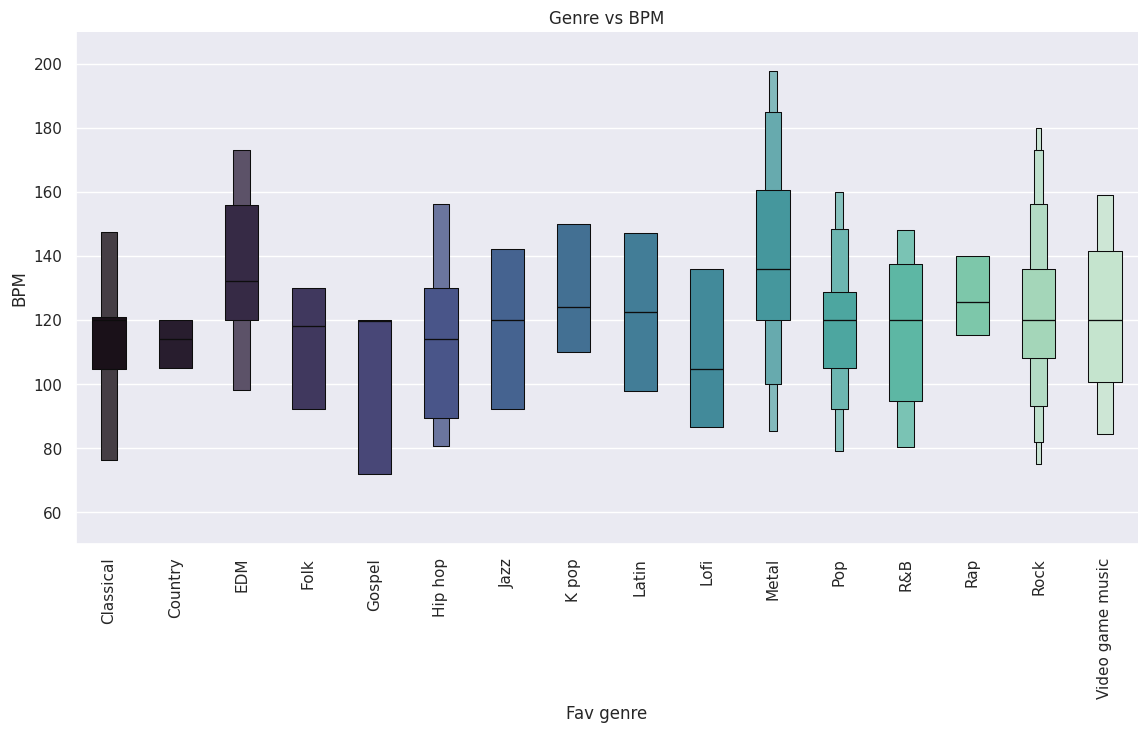

In [ ]:
sns.catplot(
    data=dff.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",height=6, aspect=2,width = 0.5,showfliers=False, palette='mako')
plt.xticks(rotation = 90)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

<Axes: xlabel='Fav genre', ylabel='Hours per day'>

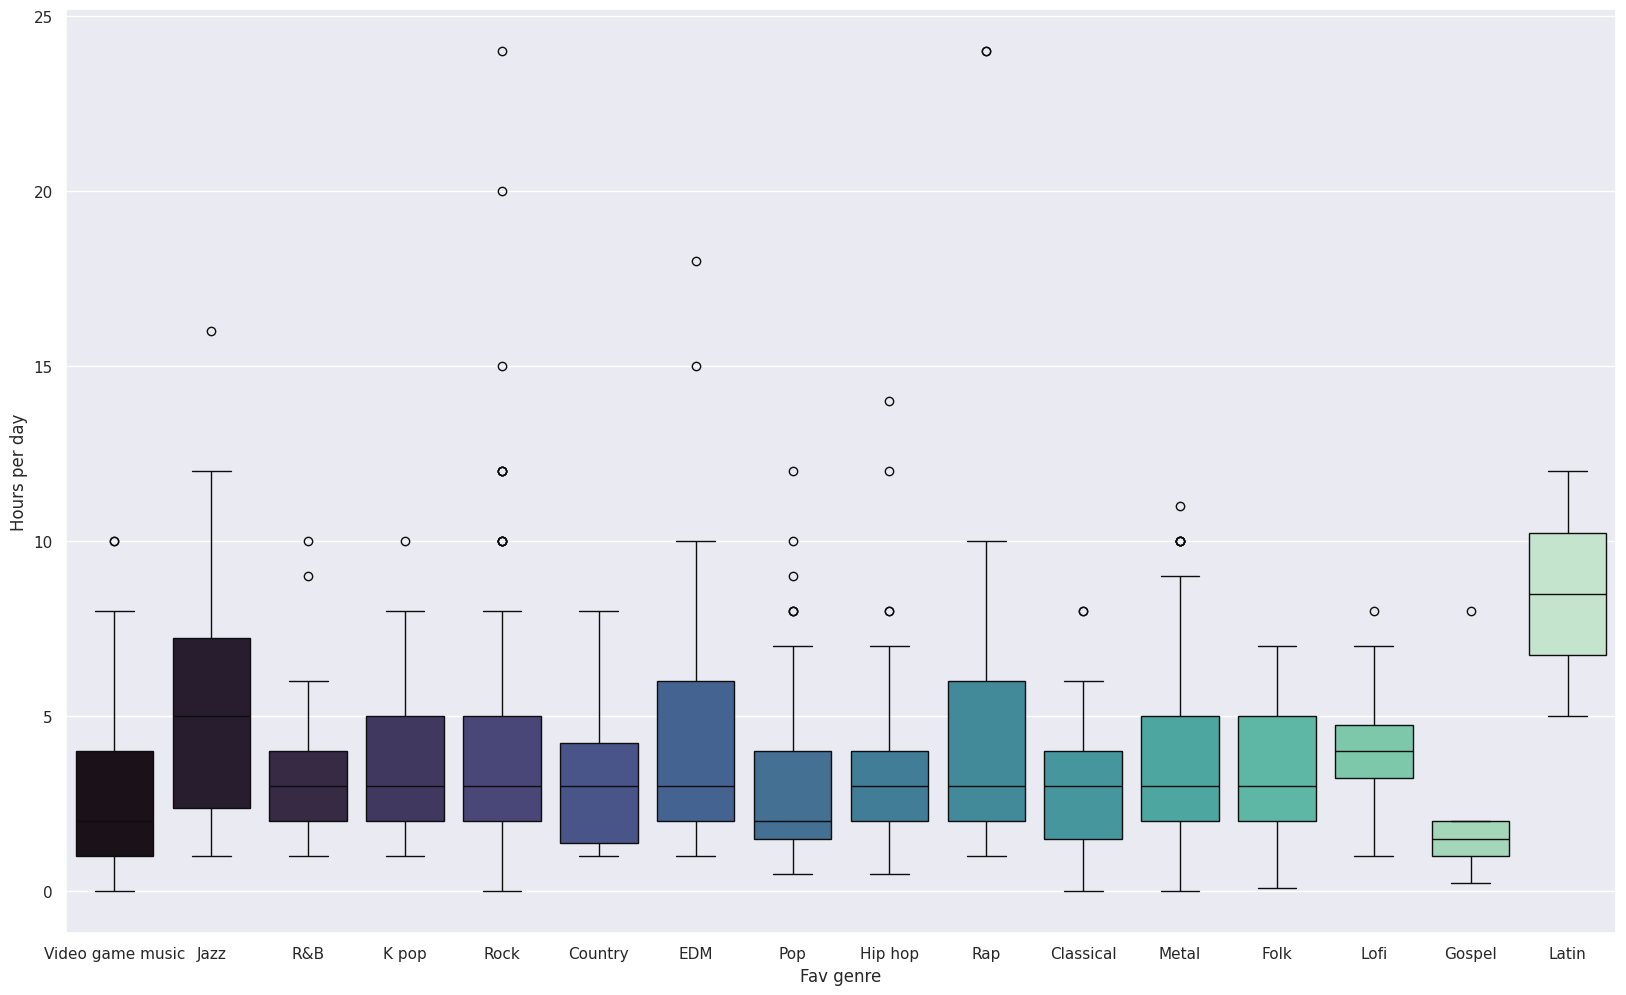

In [ ]:
sns.boxplot(x=dff['Fav genre'], y=dff['Hours per day'], palette='mako')

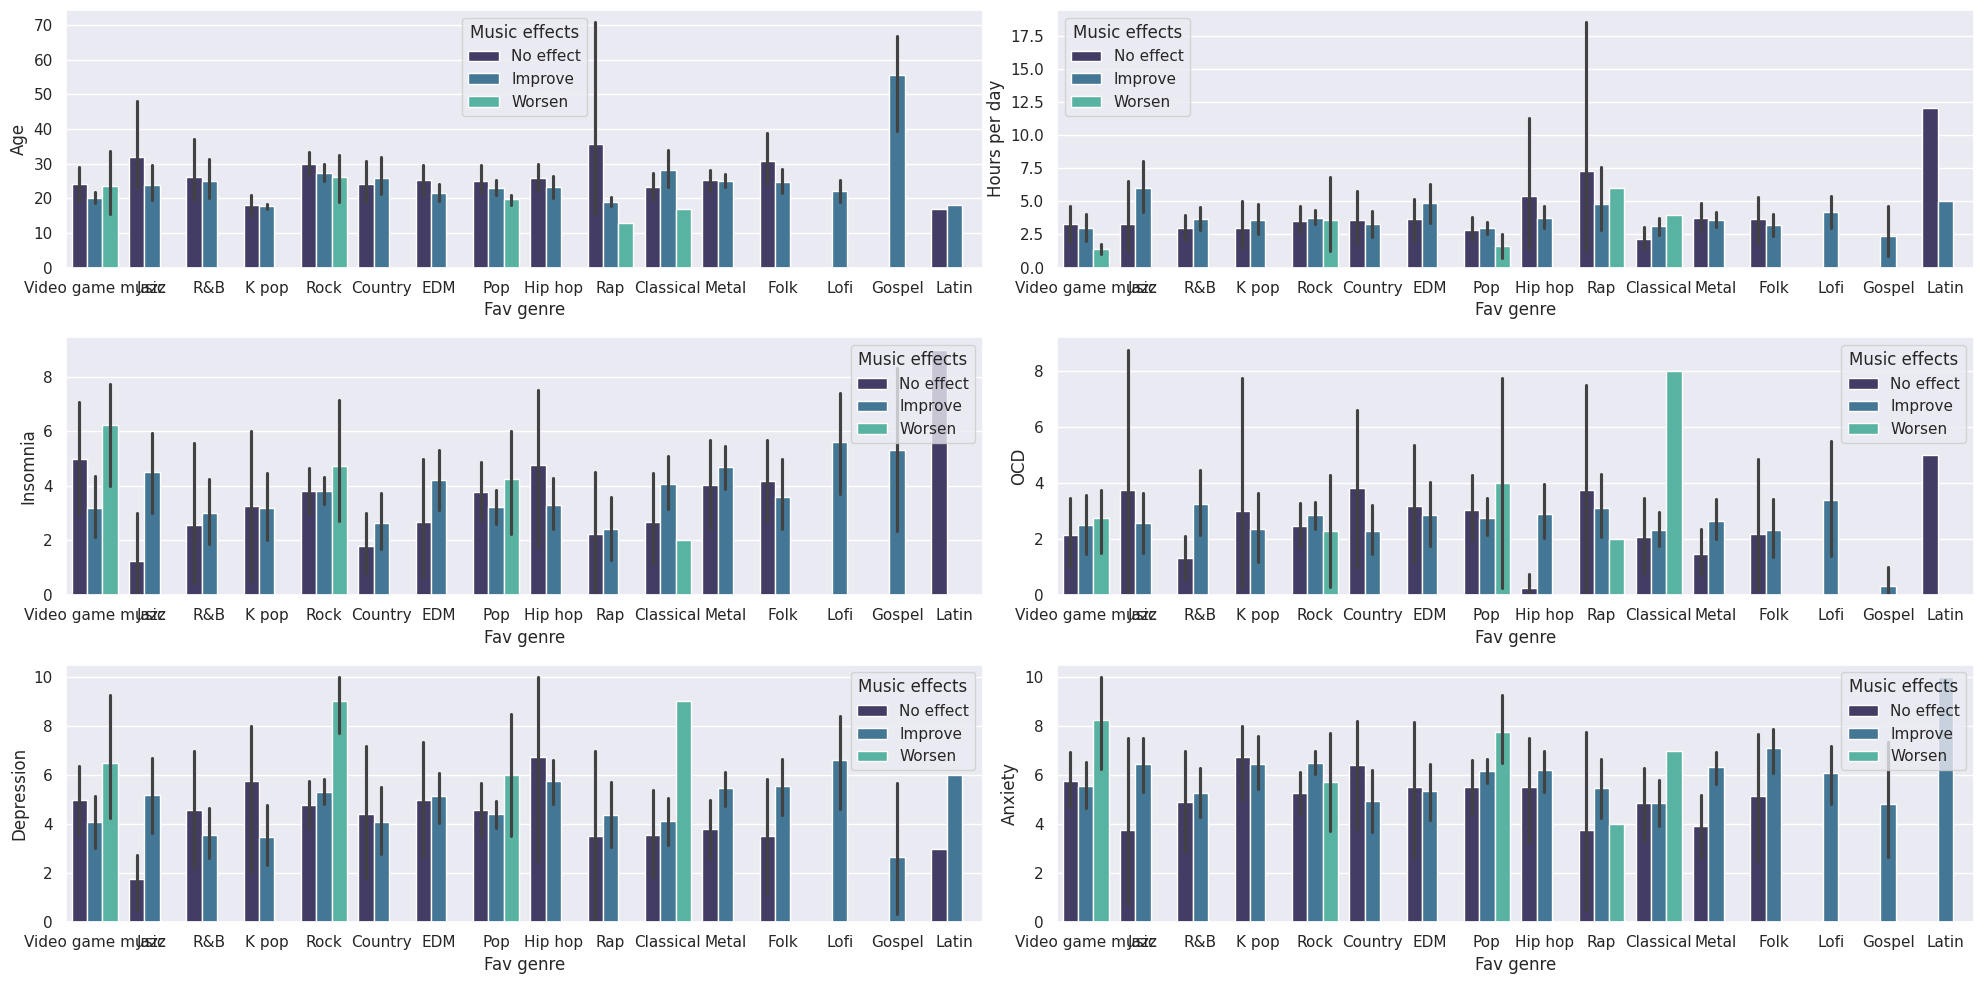

In [ ]:
figure,axes=plt.subplots(3,2,figsize=(20,10))
sns.barplot(ax=axes[0,0],x=dff['Fav genre'],y=dff['Age'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[0,1],x=dff['Fav genre'],y=dff['Hours per day'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[1,0],x=dff['Fav genre'],y=dff['Insomnia'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[1,1],x=dff['Fav genre'],y=dff['OCD'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[2,0],x=dff['Fav genre'],y=dff['Depression'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[2,1],x=dff['Fav genre'],y=dff['Anxiety'],hue=dff['Music effects'],palette="mako")
plt.tight_layout()
plt.show()